In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
col_descriptions = pd.read_csv('data/HomeCredit_columns_description.csv', index_col=0, encoding='iso-8859-1')

In [3]:
col_descriptions['Table'].unique()

array(['application_{train|test}.csv', 'bureau.csv', 'bureau_balance.csv',
       'POS_CASH_balance.csv', 'credit_card_balance.csv',
       'previous_application.csv', 'installments_payments.csv'], dtype=object)

## application_train.csv

In [4]:
applications = pd.read_csv('data/application_train.csv', index_col="SK_ID_CURR")

In [5]:
apps_clean = applications.copy()

In [6]:
applications.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
SK_ID_CURR                                                       
100002           1         Cash loans           M            N   
100003           0         Cash loans           F            N   
100004           0    Revolving loans           M            Y   
100006           0         Cash loans           F            N   
100007           0         Cash loans           M            N   

           FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR                                                               
100002                   Y             0          202500.0    406597.5   
100003                   N             0          270000.0   1293502.5   
100004                   Y             0           67500.0    135000.0   
100006                   Y             0          135000.0    312682.5   
100007                   Y             0          121500.0    513000.0   

            AMT_ANNUITY  AMT_GOODS_PRICE             ...              \
SK_ID_CURR                                           ...               
100002          24700.5         351000.0             ...               
100003          35698.5        1129500.0             ...               
100004           6750.0         135000.0             ...               
100006          29686.5         297000.0             ...               
100007          21865.5         513000.0             ...               

           FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
SK_ID_CURR                                                      
100002                    0                0                0   
100003                    0                0                0   
100004                    0                0                0   
100006                    0                0                0   
100007                    0                0                0   

           FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
SK_ID_CURR                                               
100002                    0                        0.0   
100003                    0                        0.0   
100004                    0                        0.0   
100006                    0                        NaN   
100007                    0                        0.0   

            AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
SK_ID_CURR                                                          
100002                            0.0                         0.0   
100003                            0.0                         0.0   
100004                            0.0                         0.0   
100006                            NaN                         NaN   
100007                            0.0                         0.0   

            AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
SK_ID_CURR                                                         
100002                            0.0                        0.0   
100003                            0.0                        0.0   
100004                            0.0                        0.0   
100006                            NaN                        NaN   
100007                            0.0                        0.0   

            AMT_REQ_CREDIT_BUREAU_YEAR  
SK_ID_CURR                              
100002                             1.0  
100003                             0.0  
100004                             0.0  
100006                             NaN  
100007                             0.0  

[5 rows x 121 columns]

In [7]:
applications.describe().T

count           mean            std  \
TARGET                       307511.0       0.080729       0.272419   
CNT_CHILDREN                 307511.0       0.417052       0.722121   
AMT_INCOME_TOTAL             307511.0  168797.919297  237123.146279   
AMT_CREDIT                   307511.0  599025.999706  402490.776996   
AMT_ANNUITY                  307499.0   27108.573909   14493.737315   
AMT_GOODS_PRICE              307233.0  538396.207429  369446.460540   
REGION_POPULATION_RELATIVE   307511.0       0.020868       0.013831   
DAYS_BIRTH                   307511.0  -16036.995067    4363.988632   
DAYS_EMPLOYED                307511.0   63815.045904  141275.766519   
DAYS_REGISTRATION            307511.0   -4986.120328    3522.886321   
DAYS_ID_PUBLISH              307511.0   -2994.202373    1509.450419   
OWN_CAR_AGE                  104582.0      12.061091      11.944812   
FLAG_MOBIL                   307511.0       0.999997       0.001803   
FLAG_EMP_PHONE               307511.0       0.819889       0.384280   
FLAG_WORK_PHONE              307511.0       0.199368       0.399526   
FLAG_CONT_MOBILE             307511.0       0.998133       0.043164   
FLAG_PHONE                   307511.0       0.281066       0.449521   
FLAG_EMAIL                   307511.0       0.056720       0.231307   
CNT_FAM_MEMBERS              307509.0       2.152665       0.910682   
REGION_RATING_CLIENT         307511.0       2.052463       0.509034   
REGION_RATING_CLIENT_W_CITY  307511.0       2.031521       0.502737   
HOUR_APPR_PROCESS_START      307511.0      12.063419       3.265832   
REG_REGION_NOT_LIVE_REGION   307511.0       0.015144       0.122126   
REG_REGION_NOT_WORK_REGION   307511.0       0.050769       0.219526   
LIVE_REGION_NOT_WORK_REGION  307511.0       0.040659       0.197499   
REG_CITY_NOT_LIVE_CITY       307511.0       0.078173       0.268444   
REG_CITY_NOT_WORK_CITY       307511.0       0.230454       0.421124   
LIVE_CITY_NOT_WORK_CITY      307511.0       0.179555       0.383817   
EXT_SOURCE_1                 134133.0       0.502130       0.211062   
EXT_SOURCE_2                 306851.0       0.514393       0.191060   
...                               ...            ...            ...   
DEF_30_CNT_SOCIAL_CIRCLE     306490.0       0.143421       0.446698   
OBS_60_CNT_SOCIAL_CIRCLE     306490.0       1.405292       2.379803   
DEF_60_CNT_SOCIAL_CIRCLE     306490.0       0.100049       0.362291   
DAYS_LAST_PHONE_CHANGE       307510.0    -962.858788     826.808487   
FLAG_DOCUMENT_2              307511.0       0.000042       0.006502   
FLAG_DOCUMENT_3              307511.0       0.710023       0.453752   
FLAG_DOCUMENT_4              307511.0       0.000081       0.009016   
FLAG_DOCUMENT_5              307511.0       0.015115       0.122010   
FLAG_DOCUMENT_6              307511.0       0.088055       0.283376   
FLAG_DOCUMENT_7              307511.0       0.000192       0.013850   
FLAG_DOCUMENT_8              307511.0       0.081376       0.273412   
FLAG_DOCUMENT_9              307511.0       0.003896       0.062295   
FLAG_DOCUMENT_10             307511.0       0.000023       0.004771   
FLAG_DOCUMENT_11             307511.0       0.003912       0.062424   
FLAG_DOCUMENT_12             307511.0       0.000007       0.002550   
FLAG_DOCUMENT_13             307511.0       0.003525       0.059268   
FLAG_DOCUMENT_14             307511.0       0.002936       0.054110   
FLAG_DOCUMENT_15             307511.0       0.001210       0.034760   
FLAG_DOCUMENT_16             307511.0       0.009928       0.099144   
FLAG_DOCUMENT_17             307511.0       0.000267       0.016327   
FLAG_DOCUMENT_18             307511.0       0.008130       0.089798   
FLAG_DOCUMENT_19             307511.0       0.000595       0.024387   
FLAG_DOCUMENT_20             307511.0       0.000507       0.022518   
FLAG_DOCUMENT_21             307511.0       0.000335       0.018299   
AMT_REQ_CREDIT_BUREAU_HOUR   265992.0       0.006402    

In [8]:
col_descriptions[col_descriptions['Table'] == 'application_{train|test}.csv'][['Row', 'Description', 'Special']]

Row  \
1                    SK_ID_CURR   
2                        TARGET   
5            NAME_CONTRACT_TYPE   
6                   CODE_GENDER   
7                  FLAG_OWN_CAR   
8               FLAG_OWN_REALTY   
9                  CNT_CHILDREN   
10             AMT_INCOME_TOTAL   
11                   AMT_CREDIT   
12                  AMT_ANNUITY   
13              AMT_GOODS_PRICE   
14              NAME_TYPE_SUITE   
15             NAME_INCOME_TYPE   
16          NAME_EDUCATION_TYPE   
17           NAME_FAMILY_STATUS   
18            NAME_HOUSING_TYPE   
19   REGION_POPULATION_RELATIVE   
20                   DAYS_BIRTH   
21                DAYS_EMPLOYED   
22            DAYS_REGISTRATION   
23              DAYS_ID_PUBLISH   
24                  OWN_CAR_AGE   
25                   FLAG_MOBIL   
26               FLAG_EMP_PHONE   
27              FLAG_WORK_PHONE   
28             FLAG_CONT_MOBILE   
29                   FLAG_PHONE   
30                   FLAG_EMAIL   
31              OCCUPATION_TYPE   
32              CNT_FAM_MEMBERS   
..                          ...   
95     DEF_30_CNT_SOCIAL_CIRCLE   
96     OBS_60_CNT_SOCIAL_CIRCLE   
97     DEF_60_CNT_SOCIAL_CIRCLE   
98       DAYS_LAST_PHONE_CHANGE   
99              FLAG_DOCUMENT_2   
100             FLAG_DOCUMENT_3   
101             FLAG_DOCUMENT_4   
102             FLAG_DOCUMENT_5   
103             FLAG_DOCUMENT_6   
104             FLAG_DOCUMENT_7   
105             FLAG_DOCUMENT_8   
106             FLAG_DOCUMENT_9   
107            FLAG_DOCUMENT_10   
108            FLAG_DOCUMENT_11   
109            FLAG_DOCUMENT_12   
110            FLAG_DOCUMENT_13   
111            FLAG_DOCUMENT_14   
112            FLAG_DOCUMENT_15   
113            FLAG_DOCUMENT_16   
114            FLAG_DOCUMENT_17   
115            FLAG_DOCUMENT_18   
116            FLAG_DOCUMENT_19   
117            FLAG_DOCUMENT_20   
118            FLAG_DOCUMENT_21   
119  AMT_REQ_CREDIT_BUREAU_HOUR   
120   AMT_REQ_CREDIT_BUREAU_DAY   
121  AMT_REQ_CREDIT_BUREAU_WEEK   
122   AMT_REQ_CREDIT_BUREAU_MON   
123   AMT_REQ_CREDIT_BUREAU_QRT   
124  AMT_REQ_CREDIT_BUREAU_YEAR   

                                           Description  \
1                             ID of loan in our sample   
2    Target variable (1 - client with payment diffi...   
5          Identification if loan is cash or revolving   
6                                 Gender of the client   
7                        Flag if the client owns a car   
8                  Flag if client owns a house or flat   
9                    Number of children the client has   
10                                Income of the client   
11                           Credit amount of the loan   
12                                        Loan annuity   
13   For consumer loans it is the price of the good...   
14   Who was accompanying client when he was applyi...   
15   Clients income type (businessman, working, mat...   
16      Level of highest education the client achieved   
17                         Family status of the client   
18   What is the housing situation of the client (r...   
19   Normalized population of region where client l...   
20     Client's age in days at the time of application   
21   How many days before the application the perso...   
22   How many days before the application did clien...   
23   How many days before the application did clien...   
24                                 Age of client's car   
25       Did client provide mobile phone (1=YES, 0=NO)   
26         Did client provide work phone (1=YES, 0=NO)   
27         Did client provide home phone (1=YES, 0=NO)   
28            Was mobile phone reachable (1=YES, 0=NO)   
29         Did client provide home phone (1=YES, 0=NO)   
30              Did client provide email (1=YES, 0=NO)   
31        What kind of occupation does the client have   
32            How many family members does client have   
..                                                 ...   
9

In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 5):
    display(applications.head().T)

SK_ID_CURR                                           100002  \
TARGET                                                    1   
NAME_CONTRACT_TYPE                               Cash loans   
CODE_GENDER                                               M   
FLAG_OWN_CAR                                              N   
FLAG_OWN_REALTY                                           Y   
CNT_CHILDREN                                              0   
AMT_INCOME_TOTAL                                     202500   
AMT_CREDIT                                           406598   
AMT_ANNUITY                                         24700.5   
AMT_GOODS_PRICE                                      351000   
NAME_TYPE_SUITE                               Unaccompanied   
NAME_INCOME_TYPE                                    Working   
NAME_EDUCATION_TYPE           Secondary / secondary special   
NAME_FAMILY_STATUS                     Single / not married   
NAME_HOUSING_TYPE                         House / apartment   
REGION_POPULATION_RELATIVE                         0.018801   
DAYS_BIRTH                                            -9461   
DAYS_EMPLOYED                                          -637   
DAYS_REGISTRATION                                     -3648   
DAYS_ID_PUBLISH                                       -2120   
OWN_CAR_AGE                                             NaN   
FLAG_MOBIL                                                1   
FLAG_EMP_PHONE                                            1   
FLAG_WORK_PHONE                                           0   
FLAG_CONT_MOBILE                                          1   
FLAG_PHONE                                                1   
FLAG_EMAIL                                                0   
OCCUPATION_TYPE                                    Laborers   
CNT_FAM_MEMBERS                                           1   
REGION_RATING_CLIENT                                      2   
REGION_RATING_CLIENT_W_CITY                               2   
WEEKDAY_APPR_PROCESS_START                        WEDNESDAY   
HOUR_APPR_PROCESS_START                                  10   
REG_REGION_NOT_LIVE_REGION                                0   
REG_REGION_NOT_WORK_REGION                                0   
LIVE_REGION_NOT_WORK_REGION                               0   
REG_CITY_NOT_LIVE_CITY                                    0   
REG_CITY_NOT_WORK_CITY                                    0   
LIVE_CITY_NOT_WORK_CITY                                   0   
ORGANIZATION_TYPE                    Business Entity Type 3   
EXT_SOURCE_1                                       0.083037   
EXT_SOURCE_2                                       0.262949   
EXT_SOURCE_3                                       0.139376   
APARTMENTS_AVG                                       0.0247   
BASEMENTAREA_AVG                                     0.0369   
YEARS_BEGINEXPLUATATION_AVG                          0.9722   
YEARS_BUILD_AVG                                      0.6192   
COMMONAREA_AVG                                       0.0143   
ELEVATORS_AVG                                             0   
ENTRANCES_AVG                                         0.069   
FLOORSMAX_AVG                                        0.0833   
FLOORSMIN_AVG                                         0.125   
LANDAREA_AVG                                         0.0369   
LIVINGAPARTMENTS_AVG                                 0.0202   
LIVINGAREA_AVG                                        0.019   
NONLIVINGAPARTMENTS_AVG                                   0   
NONLIVINGAREA_AVG                                         0   
APARTMENTS_MODE                                      0.0252   
BASEMENTAREA_MODE                                    0.0383   
YEARS_BEGINEXPLUATATION_MODE                         0.9722   
YEARS_BUILD_MODE                                     0.6341   
COMMONAREA_MODE                                      0.0144   
ELEVATORS_MODE                 

Modify data as follows:

* Identify columns which are encoded, change to categorical type
* Determine method of handling na for each column which has them
* May want to mean-center numerical columns (and also scale to unit variance?)


### Datatype mutation

Change y/n columns to boolean

In [10]:
yn_map = {'Y': 1,
          'N': 0}

yn_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

apps_clean[yn_cols] = apps_clean[yn_cols].replace(yn_map)

Encode categorical columns

- Need to fill na first

In [11]:
cat_cols = ['NAME_CONTRACT_TYPE',
            'CODE_GENDER',
            'NAME_TYPE_SUITE',
            'NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE',
            'NAME_FAMILY_STATUS',
            'NAME_HOUSING_TYPE',
            'OCCUPATION_TYPE',
            'WEEKDAY_APPR_PROCESS_START',
            'ORGANIZATION_TYPE',
            'FONDKAPREMONT_MODE',
            'HOUSETYPE_MODE',
            'WALLSMATERIAL_MODE',
            'EMERGENCYSTATE_MODE']

In [12]:
cat_na_count = applications[cat_cols].isna().sum(axis=0)

with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    display(cat_na_count[cat_na_count > 0].sort_values(ascending=False))

FONDKAPREMONT_MODE     210295
WALLSMATERIAL_MODE     156341
HOUSETYPE_MODE         154297
EMERGENCYSTATE_MODE    145755
OCCUPATION_TYPE         96391
NAME_TYPE_SUITE          1292
dtype: int64

In [13]:
cat_na_map = {cat: 'Unspecified' for cat in cat_na_count[cat_na_count > 0].index}
apps_clean = apps_clean.fillna(value=cat_na_map)

In [14]:
cat_labels = {}

for cat_col in cat_cols:
    cat_labels[cat_col] = apps_clean[cat_col].unique()
    apps_clean[cat_col] = pd.Categorical(apps_clean[cat_col], categories=cat_labels[cat_col])

### Handling nans

In [15]:
app_na_count = applications.isna().sum(axis=0)

with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    display(app_na_count[app_na_count > 0].sort_values(ascending=False))

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
BASEMENTAREA_MODE               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MEDI               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_AVG               169682
NONLIVINGAREA_MODE       

In [6]:
applications.isna().sum(axis=1)

SK_ID_CURR
100002     1
100003     2
100004    48
100006    56
100007    50
100008    49
100009    47
100010    48
100011    49
100012    56
100014    48
100015    49
100016    20
100017     1
100018     8
100019    47
100020    49
100021    56
100022     2
100023    49
100024    10
100025    47
100026     2
100027     3
100029     1
100030     1
100031    18
100032    49
100033    48
100034     8
          ..
456225    49
456226     0
456227     3
456228    55
456229    48
456230    21
456231    50
456232    40
456233     2
456234    48
456235    47
456236    48
456237    49
456238    47
456239    13
456240    48
456241    47
456242    11
456243    48
456244    24
456245    25
456246    49
456247    48
456248    56
456249     3
456251     8
456252    10
456253     4
456254    30
456255    17
Length: 307511, dtype: int64

Lots of nas for the columns providing info on current home. Let's explore further.

**CURRENT HOME INFORMATION**

Normalized information about building where the client lives, What is average (\_AVG suffix), modus (\_MODE suffix), median (\_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

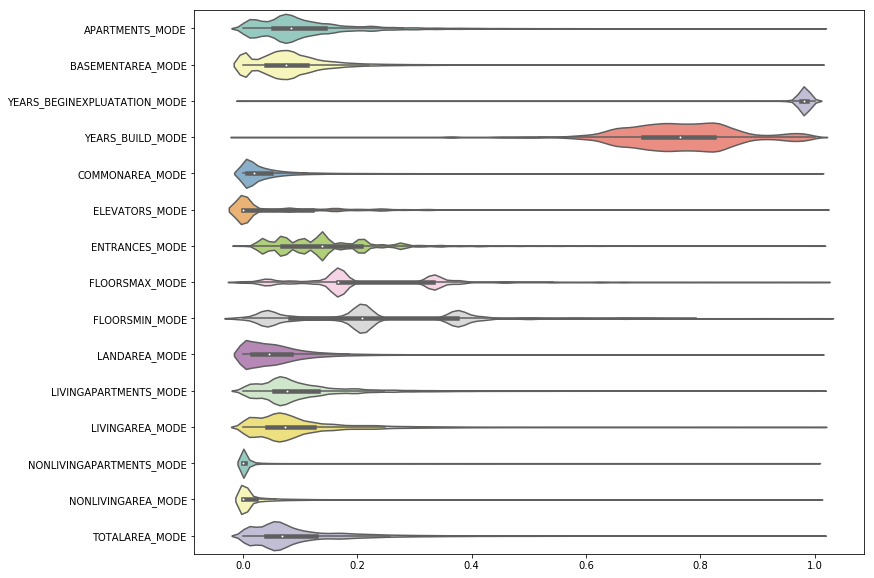

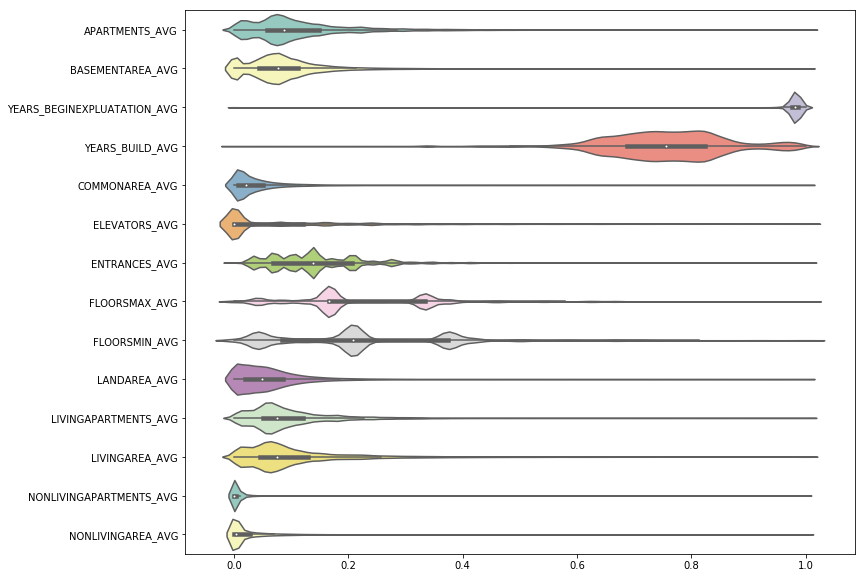

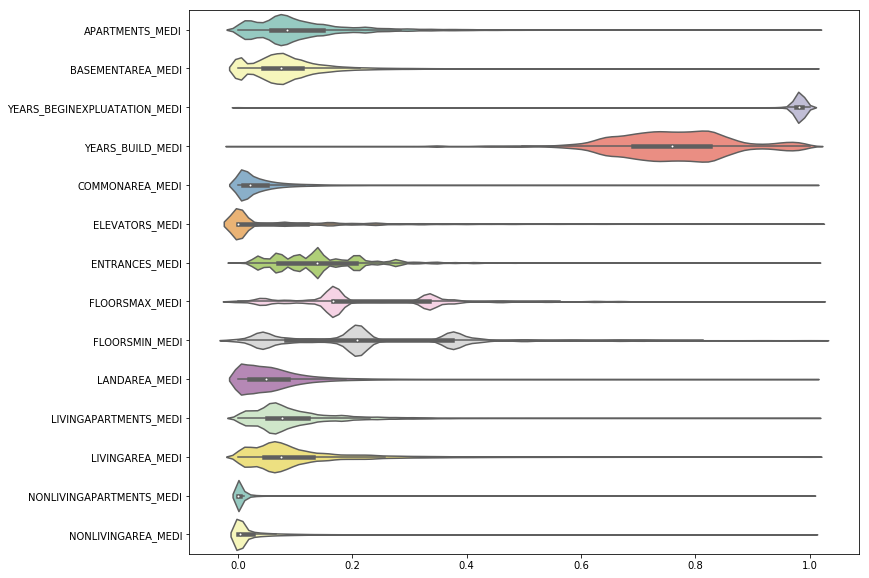

In [16]:
for statistic in ['_MODE', '_AVG', '_MEDI']:
    ax = plt.figure(figsize=(12, 10))
    sns.violinplot(data=applications[applications.columns[applications.columns.str.contains(statistic)]], 
                   scale='width', palette='Set3', orient='h')
    plt.show()

It appears the three are very similar.

In [17]:
applications['FLOORSMAX_MODE'].unique(), applications['FLOORSMIN_MODE'].unique()

(array([0.0833, 0.2917,    nan, 0.1667, 0.3333, 0.6667, 0.375 , 0.0417,
        0.25  , 0.4583, 0.2083, 0.125 , 0.    , 0.5833, 0.625 , 0.9167,
        0.9583, 0.5417, 1.    , 0.4167, 0.875 , 0.7083, 0.75  , 0.5   ,
        0.7917, 0.8333]),
 array([0.125 , 0.3333,    nan, 0.375 , 0.7083, 0.0417, 0.2083, 0.4167,
        0.2917, 0.    , 0.5   , 0.625 , 0.0833, 0.1667, 0.6667, 0.25  ,
        0.5833, 1.    , 0.9583, 0.5417, 0.9167, 0.75  , 0.8333, 0.4583,
        0.7917, 0.875 ]))

Extract the base names of each and plot 3 side by side plots comparing the statistics.

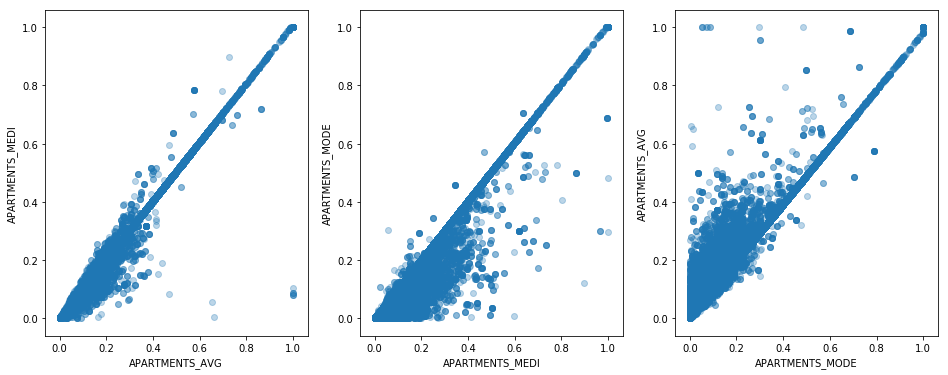

                 APARTMENTS_AVG  APARTMENTS_MEDI  APARTMENTS_MODE
APARTMENTS_AVG         1.000000         0.995081         0.973259
APARTMENTS_MEDI        0.995081         1.000000         0.977193
APARTMENTS_MODE        0.973259         0.977193         1.000000


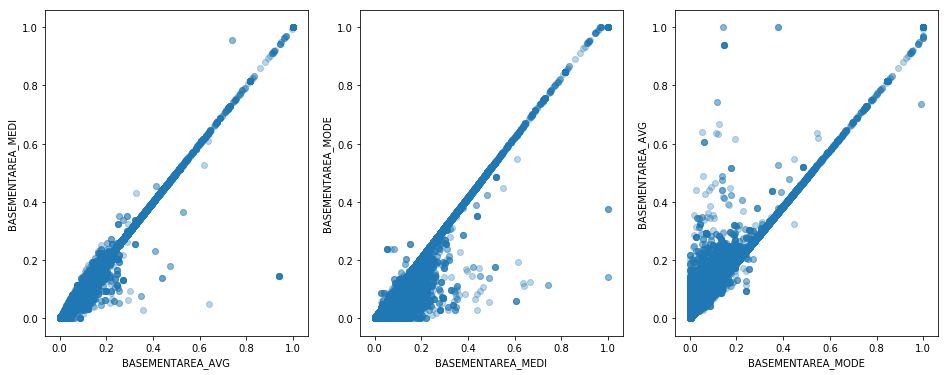

                   BASEMENTAREA_AVG  BASEMENTAREA_MEDI  BASEMENTAREA_MODE
BASEMENTAREA_AVG           1.000000           0.994317           0.973496
BASEMENTAREA_MEDI          0.994317           1.000000           0.977938
BASEMENTAREA_MODE          0.973496           0.977938           1.000000


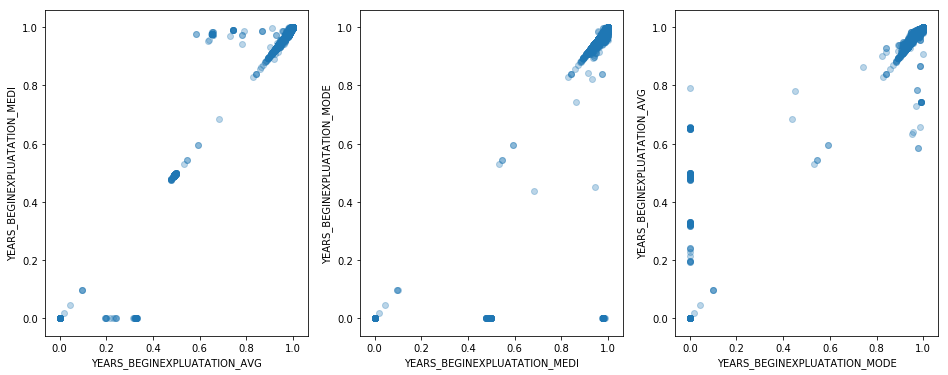

                              YEARS_BEGINEXPLUATATION_AVG  \
YEARS_BEGINEXPLUATATION_AVG                      1.000000   
YEARS_BEGINEXPLUATATION_MEDI                     0.993825   
YEARS_BEGINEXPLUATATION_MODE                     0.971893   

                              YEARS_BEGINEXPLUATATION_MEDI  \
YEARS_BEGINEXPLUATATION_AVG                       0.993825   
YEARS_BEGINEXPLUATATION_MEDI                      1.000000   
YEARS_BEGINEXPLUATATION_MODE                      0.963539   

                              YEARS_BEGINEXPLUATATION_MODE  
YEARS_BEGINEXPLUATATION_AVG                       0.971893  
YEARS_BEGINEXPLUATATION_MEDI                      0.963539  
YEARS_BEGINEXPLUATATION_MODE                      1.000000  


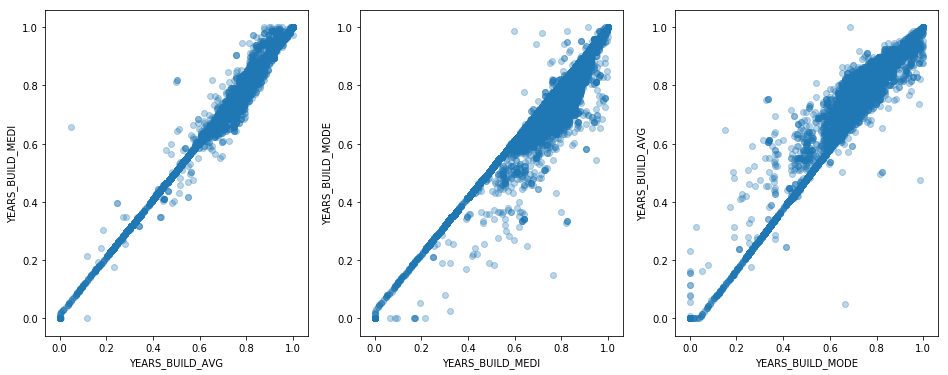

                  YEARS_BUILD_AVG  YEARS_BUILD_MEDI  YEARS_BUILD_MODE
YEARS_BUILD_AVG          1.000000          0.998495          0.989444
YEARS_BUILD_MEDI         0.998495          1.000000          0.989463
YEARS_BUILD_MODE         0.989444          0.989463          1.000000


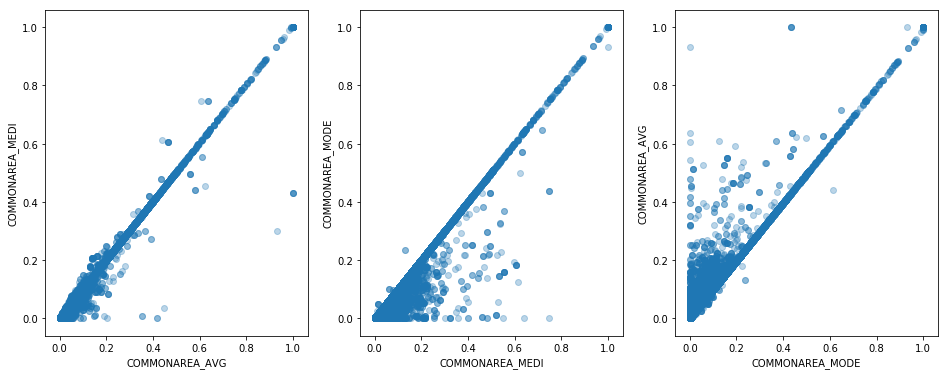

                 COMMONAREA_AVG  COMMONAREA_MEDI  COMMONAREA_MODE
COMMONAREA_AVG         1.000000         0.995978         0.977147
COMMONAREA_MEDI        0.995978         1.000000         0.979887
COMMONAREA_MODE        0.977147         0.979887         1.000000


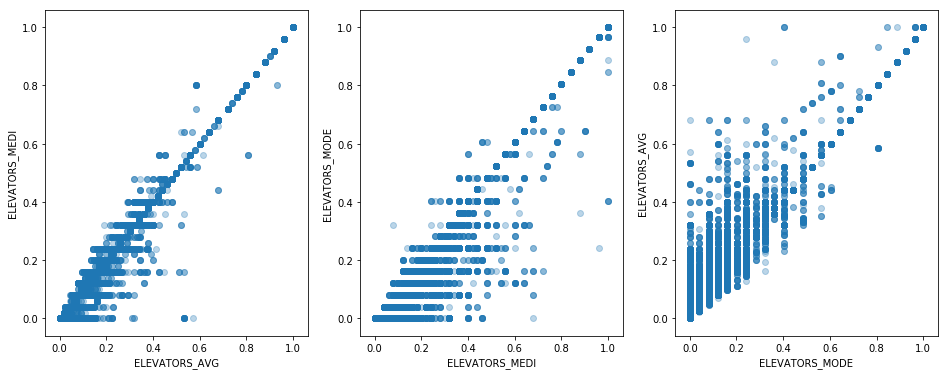

                ELEVATORS_AVG  ELEVATORS_MEDI  ELEVATORS_MODE
ELEVATORS_AVG        1.000000        0.996099        0.978837
ELEVATORS_MEDI       0.996099        1.000000        0.982828
ELEVATORS_MODE       0.978837        0.982828        1.000000


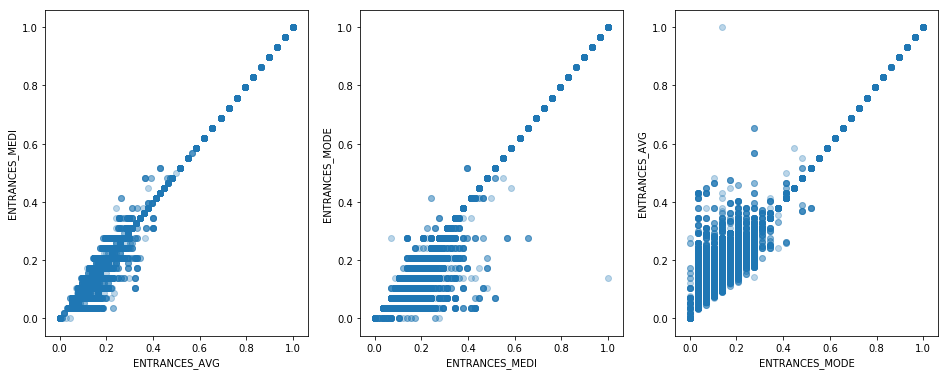

                ENTRANCES_AVG  ENTRANCES_MEDI  ENTRANCES_MODE
ENTRANCES_AVG        1.000000        0.996886        0.977743
ENTRANCES_MEDI       0.996886        1.000000        0.980677
ENTRANCES_MODE       0.977743        0.980677        1.000000


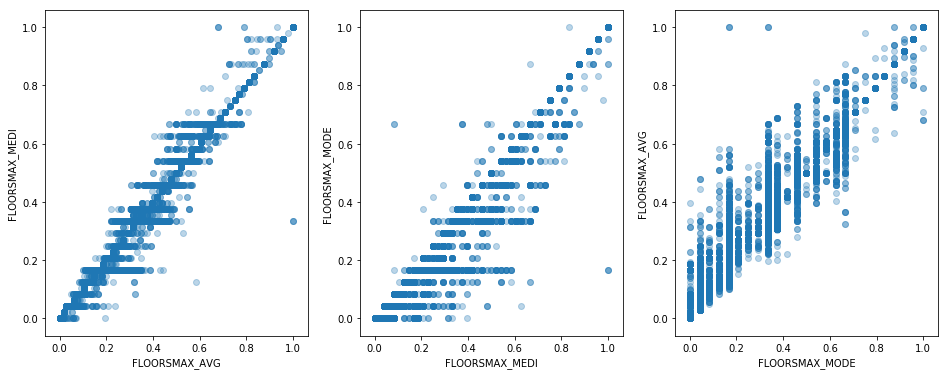

                FLOORSMAX_AVG  FLOORSMAX_MEDI  FLOORSMAX_MODE
FLOORSMAX_AVG        1.000000        0.997034        0.985689
FLOORSMAX_MEDI       0.997034        1.000000        0.988237
FLOORSMAX_MODE       0.985689        0.988237        1.000000


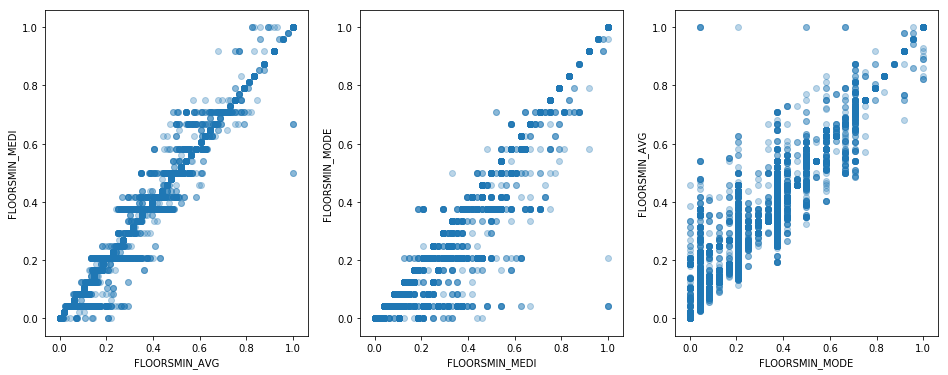

                FLOORSMIN_AVG  FLOORSMIN_MEDI  FLOORSMIN_MODE
FLOORSMIN_AVG        1.000000        0.997241        0.985875
FLOORSMIN_MEDI       0.997241        1.000000        0.988406
FLOORSMIN_MODE       0.985875        0.988406        1.000000


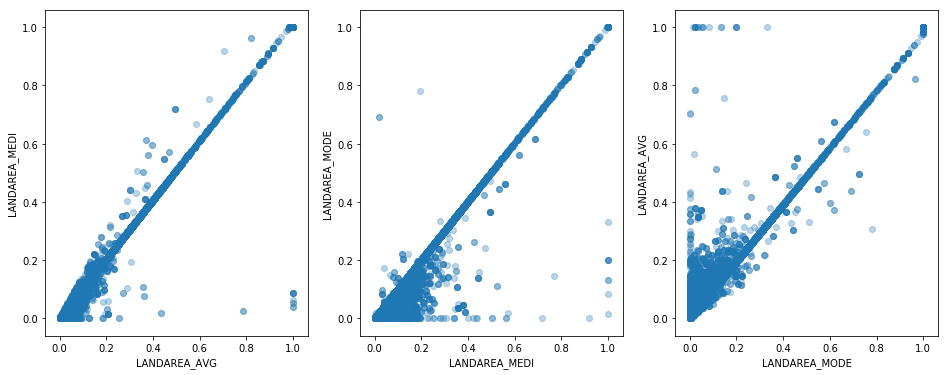

               LANDAREA_AVG  LANDAREA_MEDI  LANDAREA_MODE
LANDAREA_AVG       1.000000       0.991610       0.973696
LANDAREA_MEDI      0.991610       1.000000       0.980835
LANDAREA_MODE      0.973696       0.980835       1.000000


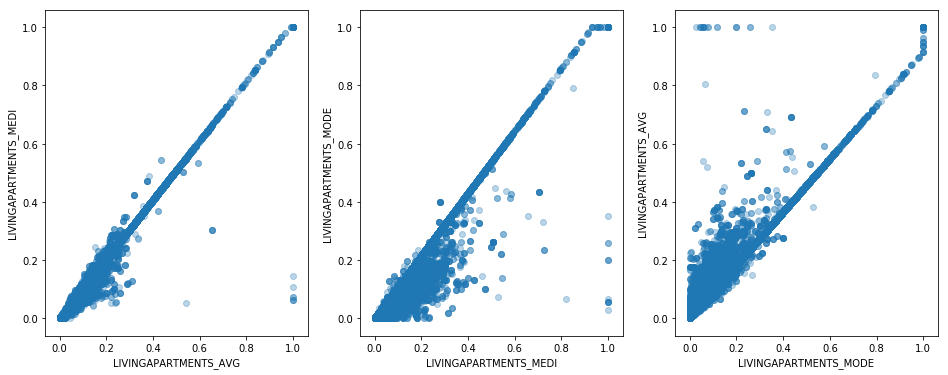

                       LIVINGAPARTMENTS_AVG  LIVINGAPARTMENTS_MEDI  \
LIVINGAPARTMENTS_AVG               1.000000               0.993825   
LIVINGAPARTMENTS_MEDI              0.993825               1.000000   
LIVINGAPARTMENTS_MODE              0.970117               0.975605   

                       LIVINGAPARTMENTS_MODE  
LIVINGAPARTMENTS_AVG                0.970117  
LIVINGAPARTMENTS_MEDI               0.975605  
LIVINGAPARTMENTS_MODE               1.000000  


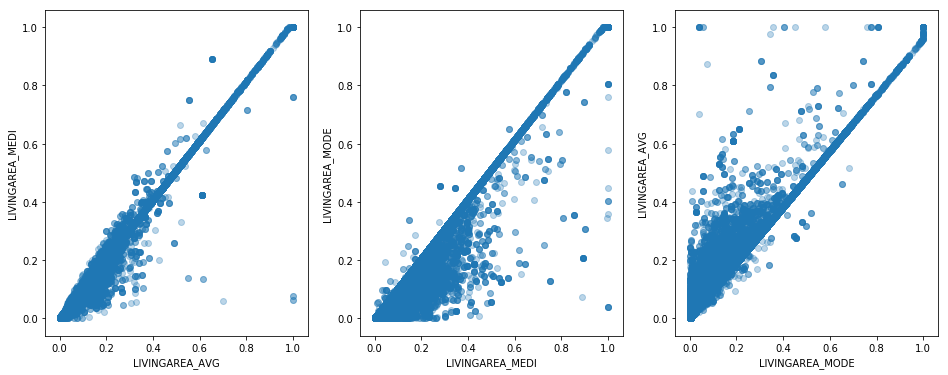

                 LIVINGAREA_AVG  LIVINGAREA_MEDI  LIVINGAREA_MODE
LIVINGAREA_AVG         1.000000         0.995596         0.972050
LIVINGAREA_MEDI        0.995596         1.000000         0.974743
LIVINGAREA_MODE        0.972050         0.974743         1.000000


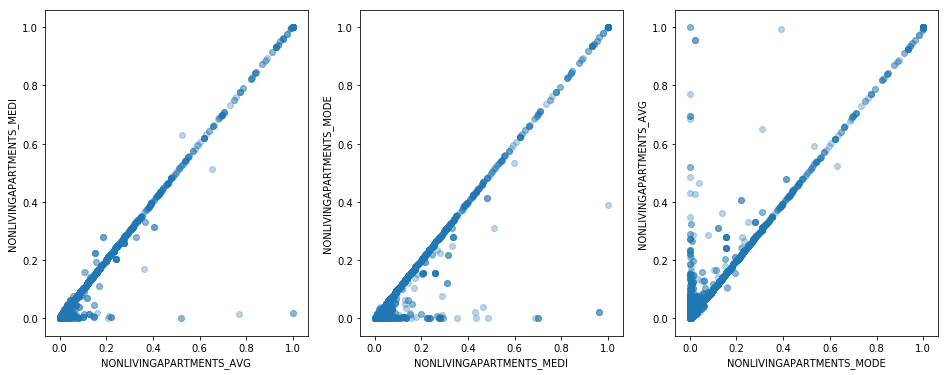

                          NONLIVINGAPARTMENTS_AVG  NONLIVINGAPARTMENTS_MEDI  \
NONLIVINGAPARTMENTS_AVG                  1.000000                  0.990768   
NONLIVINGAPARTMENTS_MEDI                 0.990768                  1.000000   
NONLIVINGAPARTMENTS_MODE                 0.969370                  0.978575   

                          NONLIVINGAPARTMENTS_MODE  
NONLIVINGAPARTMENTS_AVG                   0.969370  
NONLIVINGAPARTMENTS_MEDI                  0.978575  
NONLIVINGAPARTMENTS_MODE                  1.000000  


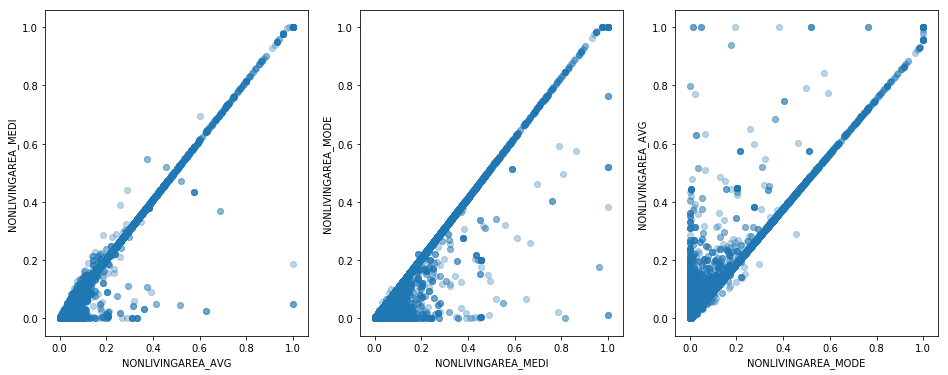

                    NONLIVINGAREA_AVG  NONLIVINGAREA_MEDI  NONLIVINGAREA_MODE
NONLIVINGAREA_AVG            1.000000            0.990444            0.966087
NONLIVINGAREA_MEDI           0.990444            1.000000            0.975839
NONLIVINGAREA_MODE           0.966087            0.975839            1.000000


In [18]:
stat_suffixes = ['_AVG', '_MEDI', '_MODE']
stat_cols = [col[:-4] for col in applications.columns[applications.columns.str.contains(stat_suffixes[0])]]

for col in stat_cols:
    fig, axes = plt.subplots(1, 3, figsize=(16,6))
    for i in range(3):
        j = (i + 1) % 3
        xstat = col + stat_suffixes[i]
        ystat = col + stat_suffixes[j]
        axes[i].scatter(applications[xstat], applications[ystat], alpha=0.3)
        axes[i].set_xlabel(xstat)
        axes[i].set_ylabel(ystat)
    plt.show()
    
    a = [col + suffix for suffix in stat_suffixes]
    print(applications[a].corr())


In [19]:
import itertools
#stat_cols, stat_suffixes

all_stat_cols = [st + sf for st, sf in itertools.product(stat_cols, stat_suffixes)]

In [20]:
from soft_impute import SoftImpute

X = applications[all_stat_cols].values

clf = SoftImpute()
clf.fit(X)
imputed = clf.predict(X)

In [21]:
apps_clean[all_stat_cols] = imputed

In [22]:
apps_clean[all_stat_cols].describe().T

count      mean       std       min  \
APARTMENTS_AVG                307511.0  0.054767  0.082065 -0.074636   
APARTMENTS_MEDI               307511.0  0.054427  0.083203 -0.079970   
APARTMENTS_MODE               307511.0  0.053158  0.080151 -0.074200   
BASEMENTAREA_AVG              307511.0  0.039878  0.053173 -0.030110   
BASEMENTAREA_MEDI             307511.0  0.038144  0.054429 -0.042222   
BASEMENTAREA_MODE             307511.0  0.038047  0.054745 -0.043761   
YEARS_BEGINEXPLUATATION_AVG   307511.0  0.497204  0.488436 -0.414847   
YEARS_BEGINEXPLUATATION_MEDI  307511.0  0.497223  0.488456 -0.415441   
YEARS_BEGINEXPLUATATION_MODE  307511.0  0.497003  0.488241 -0.416103   
YEARS_BUILD_AVG               307511.0  0.330387  0.343838 -0.012006   
YEARS_BUILD_MEDI              307511.0  0.332979  0.345447 -0.012068   
YEARS_BUILD_MODE              307511.0  0.334091  0.346922 -0.012118   
COMMONAREA_AVG                307511.0  0.027228  0.028963 -0.091842   
COMMONAREA_MEDI               307511.0  0.025795  0.026323 -0.064230   
COMMONAREA_MODE               307511.0  0.025607  0.026751 -0.076367   
ELEVATORS_AVG                 307511.0  0.034757  0.068429 -0.100814   
ELEVATORS_MEDI                307511.0  0.034302  0.068186 -0.101504   
ELEVATORS_MODE                307511.0  0.033370  0.064501 -0.093081   
ENTRANCES_AVG                 307511.0  0.069155  0.088601 -0.038154   
ENTRANCES_MEDI                307511.0  0.068766  0.088514 -0.039582   
ENTRANCES_MODE                307511.0  0.066998  0.085952 -0.037423   
FLOORSMAX_AVG                 307511.0  0.114755  0.122849 -0.004259   
FLOORSMAX_MEDI                307511.0  0.115069  0.122551 -0.004256   
FLOORSMAX_MODE                307511.0  0.113206  0.120599 -0.004187   
FLOORSMIN_AVG                 307511.0  0.111769  0.110785 -0.010636   
FLOORSMIN_MEDI                307511.0  0.114675  0.112883 -0.042615   
FLOORSMIN_MODE                307511.0  0.116032  0.113986 -0.097072   
LANDAREA_AVG                  307511.0  0.028569  0.043166 -0.040194   
LANDAREA_MEDI                 307511.0  0.029294  0.043410 -0.038195   
LANDAREA_MODE                 307511.0  0.027756  0.042812 -0.042108   
LIVINGAPARTMENTS_AVG          307511.0  0.039764  0.057077 -0.045234   
LIVINGAPARTMENTS_MEDI         307511.0  0.037694  0.060932 -0.066724   
LIVINGAPARTMENTS_MODE         307511.0  0.038211  0.063936 -0.074875   
LIVINGAREA_AVG                307511.0  0.051391  0.077684 -0.072431   
LIVINGAREA_MEDI               307511.0  0.051802  0.078885 -0.075044   
LIVINGAREA_MODE               307511.0  0.050699  0.076791 -0.071991   
NONLIVINGAPARTMENTS_AVG       307511.0 -0.001964  0.022282 -0.062667   
NONLIVINGAPARTMENTS_MEDI      307511.0 -0.001078  0.020239 -0.055875   
NONLIVINGAPARTMENTS_MODE      307511.0 -0.001692  0.020852 -0.058435   
NONLIVINGAREA_AVG             307511.0  0.010609  0.022175 -0.034711   
NONLIVINGAREA_MEDI            307511.0  0.011080  0.021294 -0.030528   
NONLIVINGAREA_MODE            307511.0  0.009827  0.021905 -0.036255   

                                       25%       50%       75%       max  
APARTMENTS_AVG               -1.217424e-04  0.000804  0.101941  0.815172  
APARTMENTS_MEDI              -1.320685e-04  0.000781  0.101046  0.835759  
APARTMENTS_MODE              -1.220356e-04  0.000774  0.098870  0.798997  
BASEMENTAREA_AVG             -1.830609e-05  0.000923  0.075270  0.485040  
BASEMENTAREA_MEDI            -6.307206e-05  0.000607  0.071411  0.524163  
BASEMENTAREA_MODE            -6.725921e-05  0.000593  0.071167  0.530211  
YEARS_BEGINEXPLUATATION_AVG   1.069077e-04  0.856028  0.972985  1.239848  
YEARS_BEGINEXPLUATATION_MEDI  1.069541e-04  0.855945  0.973027  1.239736  
YEARS_BEGINEXPLUATATION_MODE  1.068619e-04  0.855216  0.972605  1.238951  
YEARS_BUILD_AVG               1.126226e-04  0.374158  0.643438  1.836268  
YEARS_BUILD_MEDI              1.124666e-04  0.384354  0.648834  1.811150  
YEARS_BUILD_MODE              1.1304

In [23]:
stat_cat_cols = ['FONDKAPREMONT_MODE',
                 'HOUSETYPE_MODE',
                 'WALLSMATERIAL_MODE',
                 'EMERGENCYSTATE_MODE']

full_home_stats = apps_clean[all_stat_cols].join(pd.get_dummies(apps_clean[stat_cat_cols]))
full_home_stats.head().T

SK_ID_CURR                                  100002    100003    100004  \
APARTMENTS_AVG                            0.050242  0.117933  0.000029   
APARTMENTS_MEDI                           0.047960  0.117276  0.000031   
APARTMENTS_MODE                           0.048169  0.114491  0.000029   
BASEMENTAREA_AVG                          0.044917  0.085550  0.000012   
BASEMENTAREA_MEDI                         0.038339  0.082008  0.000016   
BASEMENTAREA_MODE                         0.037676  0.081822  0.000017   
YEARS_BEGINEXPLUATATION_AVG               0.972450  1.050759 -0.000332   
YEARS_BEGINEXPLUATATION_MEDI              0.972573  1.050797 -0.000332   
YEARS_BEGINEXPLUATATION_MODE              0.972265  1.050326 -0.000332   
YEARS_BUILD_AVG                           0.539740  0.702320 -0.000098   
YEARS_BUILD_MEDI                          0.547011  0.707714 -0.000102   
YEARS_BUILD_MODE                          0.547930  0.710110 -0.000101   
COMMONAREA_AVG                            0.063095  0.057162 -0.000030   
COMMONAREA_MEDI                           0.056686  0.054273 -0.000024   
COMMONAREA_MODE                           0.058113  0.053807 -0.000026   
ELEVATORS_AVG                             0.013724  0.075543  0.000040   
ELEVATORS_MEDI                            0.012862  0.074581  0.000040   
ELEVATORS_MODE                            0.014438  0.072481  0.000036   
ENTRANCES_AVG                             0.082872  0.148166  0.000014   
ENTRANCES_MEDI                            0.081824  0.147355  0.000015   
ENTRANCES_MODE                            0.080125  0.143551  0.000014   
FLOORSMAX_AVG                             0.178932  0.244269 -0.000024   
FLOORSMAX_MEDI                            0.180890  0.244880 -0.000026   
FLOORSMAX_MODE                            0.177887  0.240919 -0.000025   
FLOORSMIN_AVG                             0.204066  0.236766 -0.000058   
FLOORSMIN_MEDI                            0.216539  0.242645 -0.000068   
FLOORSMIN_MODE                            0.226978  0.245213 -0.000078   
LANDAREA_AVG                              0.025781  0.061536  0.000016   
LANDAREA_MEDI                             0.027461  0.063058  0.000015   
LANDAREA_MODE                             0.024008  0.059825  0.000016   
...                                            ...       ...       ...   
LIVINGAPARTMENTS_MODE                     0.027307  0.082581  0.000029   
LIVINGAREA_AVG                            0.046331  0.110694  0.000028   
LIVINGAREA_MEDI                           0.046011  0.111607  0.000029   
LIVINGAREA_MODE                           0.045526  0.109212  0.000028   
NONLIVINGAPARTMENTS_AVG                  -0.024005 -0.003373  0.000025   
NONLIVINGAPARTMENTS_MEDI                 -0.020473 -0.001570  0.000022   
NONLIVINGAPARTMENTS_MODE                 -0.022191 -0.002848  0.000023   
NONLIVINGAREA_AVG                         0.002851  0.023110  0.000014   
NONLIVINGAREA_MEDI                        0.004922  0.024060  0.000012   
NONLIVINGAREA_MODE                        0.001246  0.021459  0.000014   
FONDKAPREMONT_MODE_reg oper account       1.000000  1.000000  0.000000   
FONDKAPREMONT_MODE_Unspecified            0.000000  0.000000  1.000000   
FONDKAPREMONT_MODE_org spec account       0.000000  0.000000  0.000000   
FONDKAPREMONT_MODE_reg oper spec account  0.000000  0.000000  0.000000   
FONDKAPREMONT_MODE_not specified          0.000000  0.000000  0.000000   
HOUSETYPE_MODE_block of flats             1.000000  1.000000  0.000000   
HOUSETYPE_MODE_Unspecified                0.000000  0.000000  1.000000   
HOUSETYPE_MODE_terraced house             0.000000  0.000000  0.000000   
HOUSETYPE_MODE_specific housing           0.000000  0.000000  0.000000   
WALLSMATERIAL_MODE_Stone, brick           1.000000  0.000000  0.000000   
WALLSMATERIAL_MODE_Block                  0.000000  1.000000  0.000000   
WALLSMATERIAL_MODE_Unspecified            0.000000  0.000000  1.000000   
WALL

In [24]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(full_home_stats)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
pca.explained_variance_ratio_.cumsum()

array([0.77164358, 0.84022253, 0.89497014, 0.91699227, 0.93280947,
       0.94665773, 0.95703832, 0.96482704, 0.97178769, 0.97800949,
       0.98341609, 0.98816883, 0.99085355, 0.99329371, 0.99537838,
       0.99718246, 0.9987595 , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [26]:
pca_components = 15
cols = ['CURR_HOME_' + str(pca_col) for pca_col in range(pca_components)]
st_pca = PCA(n_components=pca_components)

home_stats_pca = pd.DataFrame(st_pca.fit_transform(full_home_stats), index=full_home_stats.index, columns=cols)

In [27]:
apps_clean = apps_clean.join(home_stats_pca)
apps_clean = apps_clean.drop(all_stat_cols, axis=1)
apps_clean = apps_clean.drop(stat_cat_cols, axis=1)

**EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3**

Normalized score from external data source

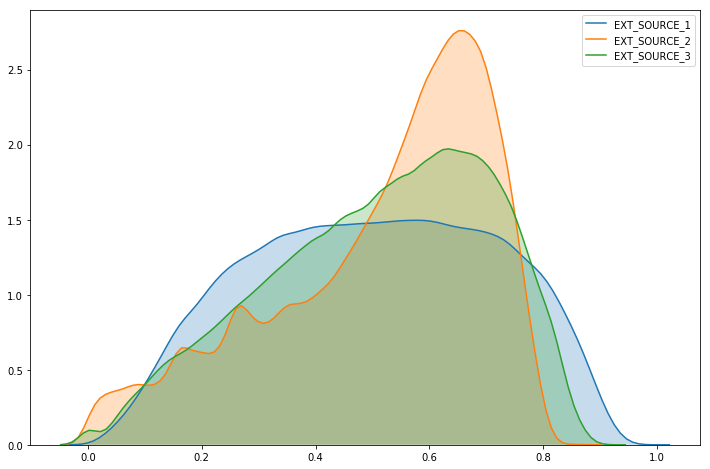

In [28]:
fig = plt.figure(figsize=(12,8))
ext_src_cols = ['EXT_SOURCE_' + str(i) for i in range(1, 4)]

for ext_src_col in ext_src_cols:
    ext_source = applications[applications[ext_src_col].notna()][ext_src_col]
    sns.kdeplot(ext_source, shade=True)

Compare correlation of the three scores. May want to impute with average of the two other scores (or be fancy and match quantile of other scores to equiv quantile of missing score)

In [29]:
applications[ext_src_cols].rank(pct=True).corr()

EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
EXT_SOURCE_1      1.000000      0.220791      0.180952
EXT_SOURCE_2      0.220791      1.000000      0.106247
EXT_SOURCE_3      0.180952      0.106247      1.000000

Correlation is pretty weak. May just impute with means instead of using the other scores as reference.

In [30]:
apps_clean[ext_src_cols].mean(axis=0)

EXT_SOURCE_1    0.502130
EXT_SOURCE_2    0.514393
EXT_SOURCE_3    0.510853
dtype: float64

In [31]:
apps_clean[ext_src_cols].mean()

EXT_SOURCE_1    0.502130
EXT_SOURCE_2    0.514393
EXT_SOURCE_3    0.510853
dtype: float64

**OWN_CAR_AGE**

Age of client's car

Does the car age show up for every row with **FLAG_OWN_CAR** set?

In [32]:
applications[applications['FLAG_OWN_CAR'] == 'Y']['OWN_CAR_AGE'].isna().sum()

5

**OCCUPATION_TYPE**

In [4]:
applications['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan, 'Drivers',
       'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [32]:
occ_sal = applications.groupby(['OCCUPATION_TYPE']).describe()['AMT_INCOME_TOTAL'].sort_values('mean')
occ_sal

count           mean            std      min  \
OCCUPATION_TYPE                                                         
Cleaning staff          4653.0  130790.895551   64075.793833  25650.0   
Low-skill Laborers      2093.0  133228.001911   54003.583810  27000.0   
Cooking staff           5946.0  138396.508176   62742.083077  27000.0   
Waiters/barmen staff    1348.0  144272.583828   67068.772193  29250.0   
Security staff          6721.0  149662.695953   69621.523467  27000.0   
Medicine staff          8537.0  149709.643434   74078.798526  26550.0   
Sales staff            32102.0  152302.874710   77616.226957  27000.0   
Secretaries             1305.0  160541.662069  115258.230585  45000.0   
Laborers               55186.0  166357.482525  504164.664318  27000.0   
Core staff             27570.0  172656.695254   98147.105697  27000.0   
Private service staff   2652.0  182334.812783  104751.224342  36000.0   
High skill tech staff  11380.0  182842.045683   95711.001374  27000.0   
Drivers                18603.0  187011.606413   82593.382899  27000.0   
HR staff                 563.0  188916.282416   93155.321259  30600.0   
Accountants             9813.0  194578.357842  108876.812807  27000.0   
Realty agents            751.0  195003.994674   82992.755612  67500.0   
IT staff                 526.0  213465.601711  142009.791936  45000.0   
Managers               21371.0  260336.681717  184940.984890  27000.0   

                            25%       50%       75%          max  
OCCUPATION_TYPE                                                   
Cleaning staff          90000.0  112500.0  157500.0    1080000.0  
Low-skill Laborers      90000.0  121500.0  157500.0     450000.0  
Cooking staff           90000.0  126000.0  171000.0     540000.0  
Waiters/barmen staff    90000.0  135000.0  180000.0     585000.0  
Security staff         103500.0  135000.0  180000.0     832500.0  
Medicine staff          99000.0  135000.0  180000.0    1350000.0  
Sales staff            103500.0  135000.0  180000.0    2025000.0  
Secretaries            107284.5  135000.0  180000.0    2025000.0  
Laborers               112500.0  157500.0  202500.0  117000000.0  
Core staff             112500.0  157500.0  202500.0    3600000.0  
Private service staff  121500.0  157500.0  225000.0    3150000.0  
High skill tech staff  112500.0  157500.0  225000.0    1890000.0  
Drivers                135000.0  180000.0  225000.0    2475000.0  
HR staff               135000.0  158400.0  225000.0     699750.0  
Accountants            130500.0  178650.0  225000.0    2214117.0  
Realty agents          135000.0  180000.0  225000.0     675000.0  
IT staff               135000.0  180000.0  247500.0    2025000.0  
Managers               157500.0  225000.0  315000.0    9000000.0

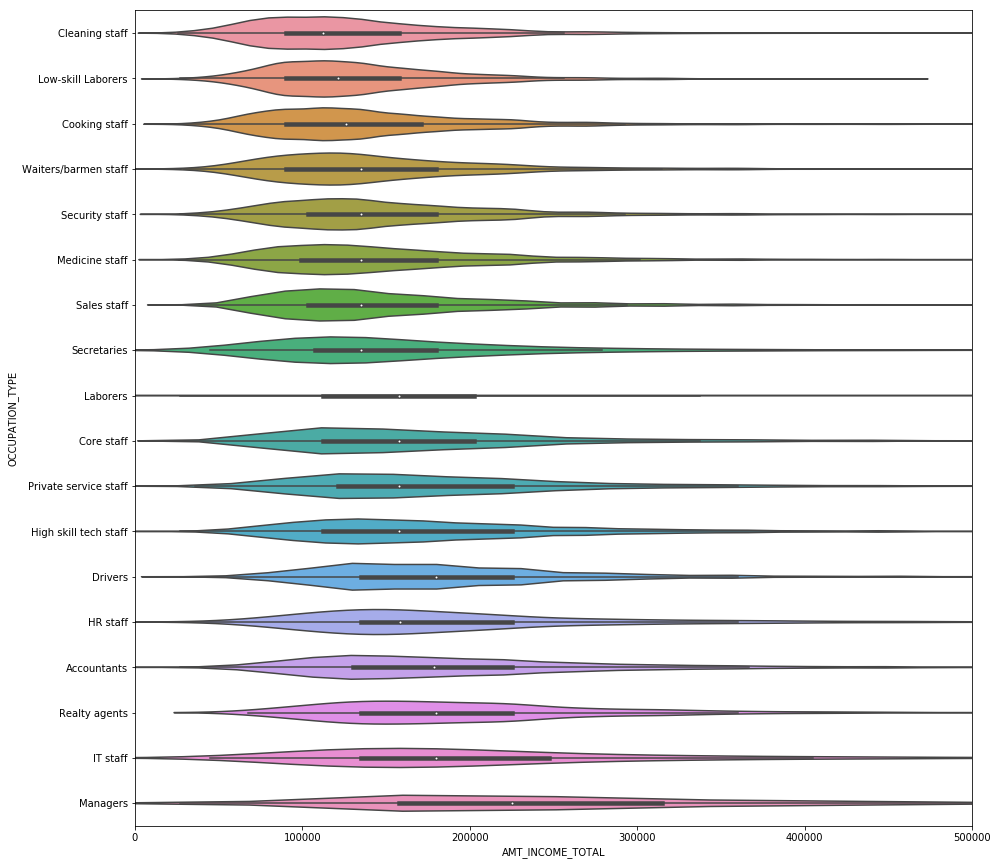

In [34]:
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
#applications.pivot(index=['OCCUPATION_TYPE'], values=['AMT_INCOME_TOTAL'], aggfunc=[])
sns.violinplot(data=applications, y='OCCUPATION_TYPE', x='AMT_INCOME_TOTAL', order=occ_sal.index)
ax.set_xlim([0, 500e3])
plt.show()

What values are correlated with occupation (besides income?)

**AMT_REQ_CREDIT_BUREAU**

In [4]:
app_credit_chk = applications[applications.columns[applications.columns.str.contains("AMT_REQ_CREDIT_BUREAU")]]
app_credit_chk.corr().stack()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_HOUR    1.000000
                            AMT_REQ_CREDIT_BUREAU_DAY     0.230374
                            AMT_REQ_CREDIT_BUREAU_WEEK    0.004706
                            AMT_REQ_CREDIT_BUREAU_MON    -0.000018
                            AMT_REQ_CREDIT_BUREAU_QRT    -0.002716
                            AMT_REQ_CREDIT_BUREAU_YEAR   -0.004597
AMT_REQ_CREDIT_BUREAU_DAY   AMT_REQ_CREDIT_BUREAU_HOUR    0.230374
                            AMT_REQ_CREDIT_BUREAU_DAY     1.000000
                            AMT_REQ_CREDIT_BUREAU_WEEK    0.217412
                            AMT_REQ_CREDIT_BUREAU_MON    -0.005258
                            AMT_REQ_CREDIT_BUREAU_QRT    -0.004416
                            AMT_REQ_CREDIT_BUREAU_YEAR   -0.003355
AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_HOUR    0.004706
                            AMT_REQ_CREDIT_BUREAU_DAY     0.217412
                            AMT_REQ_CREDIT_BUREAU_WEEK    1.00

The only fairly strong correlations are between past hour and past day, and past day and past week.

In [6]:
app_credit_chk.describe().T

count      mean       std  min  25%  50%  75%  \
AMT_REQ_CREDIT_BUREAU_HOUR  265992.0  0.006402  0.083849  0.0  0.0  0.0  0.0   
AMT_REQ_CREDIT_BUREAU_DAY   265992.0  0.007000  0.110757  0.0  0.0  0.0  0.0   
AMT_REQ_CREDIT_BUREAU_WEEK  265992.0  0.034362  0.204685  0.0  0.0  0.0  0.0   
AMT_REQ_CREDIT_BUREAU_MON   265992.0  0.267395  0.916002  0.0  0.0  0.0  0.0   
AMT_REQ_CREDIT_BUREAU_QRT   265992.0  0.265474  0.794056  0.0  0.0  0.0  0.0   
AMT_REQ_CREDIT_BUREAU_YEAR  265992.0  1.899974  1.869295  0.0  0.0  1.0  3.0   

                              max  
AMT_REQ_CREDIT_BUREAU_HOUR    4.0  
AMT_REQ_CREDIT_BUREAU_DAY     9.0  
AMT_REQ_CREDIT_BUREAU_WEEK    8.0  
AMT_REQ_CREDIT_BUREAU_MON    27.0  
AMT_REQ_CREDIT_BUREAU_QRT   261.0  
AMT_REQ_CREDIT_BUREAU_YEAR   25.0

In [38]:
app_credit_cols = apps_clean.columns[apps_clean.columns.str.contains("AMT_REQ_CREDIT_BUREAU")]
apps_clean['AMT_REQ_CREDIT_BUREAU_YEAR'] = apps_clean['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(1)
apps_clean[app_credit_cols] = apps_clean[app_credit_cols].fillna(0)

Impute all with zeros except year, impute with 1.

**AMT_ANNUITY**

In [42]:
applications['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [46]:
applications.corr()[['AMT_ANNUITY', 'AMT_GOODS_PRICE']].sort_values(by='AMT_ANNUITY')

AMT_ANNUITY  AMT_GOODS_PRICE
REGION_RATING_CLIENT_W_CITY    -0.141682        -0.112208
REGION_RATING_CLIENT           -0.128525        -0.103786
DAYS_EMPLOYED                  -0.104332        -0.064842
OWN_CAR_AGE                    -0.097057        -0.103733
FLAG_DOCUMENT_6                -0.073897        -0.050232
DAYS_LAST_PHONE_CHANGE         -0.063747        -0.076313
FLAG_WORK_PHONE                -0.024803         0.001086
DEF_60_CNT_SOCIAL_CIRCLE       -0.024001        -0.024506
DEF_30_CNT_SOCIAL_CIRCLE       -0.022833        -0.022244
FLAG_DOCUMENT_21               -0.017598        -0.014486
TARGET                         -0.012817        -0.039645
OBS_30_CNT_SOCIAL_CIRCLE       -0.011987         0.000328
OBS_60_CNT_SOCIAL_CIRCLE       -0.011731         0.000347
AMT_REQ_CREDIT_BUREAU_YEAR     -0.011320        -0.050998
FLAG_DOCUMENT_18               -0.009745         0.032748
FLAG_DOCUMENT_5                -0.006655        -0.005201
REG_CITY_NOT_LIVE_CITY         -0.006214        -0.027212
FLAG_DOCUMENT_11               -0.003668         0.035124
FLAG_DOCUMENT_10               -0.003369        -0.002134
FLAG_DOCUMENT_7                -0.002273         0.000202
FLAG_MOBIL                      0.000149         0.001399
FLAG_DOCUMENT_12                0.000847         0.004067
REG_CITY_NOT_WORK_CITY          0.000896        -0.020333
FLAG_DOCUMENT_4                 0.001109         0.001113
AMT_REQ_CREDIT_BUREAU_DAY       0.002185         0.004677
FLAG_DOCUMENT_17                0.003191         0.012139
FLAG_DOCUMENT_2                 0.003397         0.010774
LANDAREA_MODE                   0.003621         0.009379
AMT_REQ_CREDIT_BUREAU_HOUR      0.003861        -0.003237
FLAG_DOCUMENT_19                0.004573         0.020279
...                                  ...              ...
LIVINGAPARTMENTS_MEDI           0.073049         0.060104
APARTMENTS_MEDI                 0.073987         0.063187
LIVE_REGION_NOT_WORK_REGION     0.074550         0.052864
LIVINGAPARTMENTS_AVG            0.075293         0.061850
CNT_FAM_MEMBERS                 0.075539         0.061185
APARTMENTS_AVG                  0.076213         0.064918
REG_REGION_NOT_WORK_REGION      0.079420         0.053171
LIVINGAREA_MODE                 0.079426         0.069324
LIVINGAREA_MEDI                 0.088134         0.076028
LIVINGAREA_AVG                  0.089659         0.077307
TOTALAREA_MODE                  0.090415         0.077527
ELEVATORS_MODE                  0.093131         0.077978
FLOORSMIN_MODE                  0.094457         0.077770
FLOORSMIN_MEDI                  0.098642         0.080863
ELEVATORS_MEDI                  0.099559         0.082266
FLOORSMIN_AVG                   0.099812         0.081411
ELEVATORS_AVG                   0.101439         0.083736
FLAG_DOCUMENT_3                 0.102843         0.074900
FLAG_EMP_PHONE                  0.103533         0.063487
REGION_POPULATION_RELATIVE      0.118429         0.103520
EXT_SOURCE_1                    0.119398         0.175502
EXT_SOURCE_2                    0.125804         0.139367
FLOORSMAX_MODE                  0.126302         0.105532
FLOORSMAX_MEDI                  0.129179         0.107936
FLOORSMAX_AVG                   0.130174         0.108512
FLAG_DOCUMENT_8                 0.130584         0.080482
AMT_INCOME_TOTAL                0.191657         0.159610
AMT_CREDIT                      0.770138         0.986968
AMT_GOODS_PRICE                 0.775109         1.000000
AMT_ANNUITY                     1.000000         0.775109

[105 rows x 2 columns]

In [57]:
from sklearn.linear_model import LinearRegression

amt_lr_rows = apps_clean['AMT_GOODS_PRICE'].notna()
x = apps_clean.loc[amt_lr_rows]['AMT_CREDIT']
y = apps_clean.loc[amt_lr_rows]['AMT_GOODS_PRICE']

lr = LinearRegression()
lr.fit(x.values.reshape(-1, 1), y)

amt_fill_rows = apps_clean['AMT_GOODS_PRICE'].isna()
x = apps_clean.loc[amt_fill_rows]['AMT_CREDIT']
y = lr.predict(x.values.reshape(-1, 1))

apps_clean.loc[amt_fill_rows, 'AMT_GOODS_PRICE'] = y

In [60]:
amt_lr_rows = apps_clean['AMT_ANNUITY'].notna()
x = apps_clean.loc[amt_lr_rows][['AMT_CREDIT', 'AMT_GOODS_PRICE']]
y = apps_clean.loc[amt_lr_rows]['AMT_ANNUITY']

lr = LinearRegression()
lr.fit(x.values, y)

amt_fill_rows = apps_clean['AMT_ANNUITY'].isna()
x = apps_clean.loc[amt_fill_rows][['AMT_CREDIT', 'AMT_GOODS_PRICE']]
y = lr.predict(x.values)

apps_clean.loc[amt_fill_rows, 'AMT_ANNUITY'] = y

### Final cleanup

In [62]:
mean_imp_cols = apps_clean.columns[apps_clean.isna().sum(axis=0) > 0]

mean_imp_means = apps_clean[mean_imp_cols].mean()
apps_clean[mean_imp_cols] = apps_clean[mean_imp_cols].fillna(mean_imp_means)

### Final na check

In [63]:
apps_clean_na_count = apps_clean.isna().sum(axis=0)

with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    display(apps_clean_na_count[apps_clean_na_count > 0].sort_values(ascending=False))

Series([], dtype: int64)

## bureau.csv

In [4]:
bureau = pd.read_csv('data/bureau.csv')
bureau_clean = bureau.copy()

In [5]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [6]:
bureau.describe().T

count          mean           std          min  \
SK_ID_CURR              1716428.0  2.782149e+05  1.029386e+05   100001.000   
SK_ID_BUREAU            1716428.0  5.924434e+06  5.322657e+05  5000000.000   
DAYS_CREDIT             1716428.0 -1.142108e+03  7.951649e+02    -2922.000   
CREDIT_DAY_OVERDUE      1716428.0  8.181666e-01  3.654443e+01        0.000   
DAYS_CREDIT_ENDDATE     1610875.0  5.105174e+02  4.994220e+03   -42060.000   
DAYS_ENDDATE_FACT       1082775.0 -1.017437e+03  7.140106e+02   -42023.000   
AMT_CREDIT_MAX_OVERDUE   591940.0  3.825418e+03  2.060316e+05        0.000   
CNT_CREDIT_PROLONG      1716428.0  6.410406e-03  9.622391e-02        0.000   
AMT_CREDIT_SUM          1716415.0  3.549946e+05  1.149811e+06        0.000   
AMT_CREDIT_SUM_DEBT     1458759.0  1.370851e+05  6.774011e+05 -4705600.320   
AMT_CREDIT_SUM_LIMIT    1124648.0  6.229515e+03  4.503203e+04  -586406.115   
AMT_CREDIT_SUM_OVERDUE  1716428.0  3.791276e+01  5.937650e+03        0.000   
DAYS_CREDIT_UPDATE      1716428.0 -5.937483e+02  7.207473e+02   -41947.000   
AMT_ANNUITY              489637.0  1.571276e+04  3.258269e+05        0.000   

                               25%        50%         75%           max  
SK_ID_CURR               188866.75   278055.0   367426.00  4.562550e+05  
SK_ID_BUREAU            5463953.75  5926303.5  6385681.25  6.843457e+06  
DAYS_CREDIT               -1666.00     -987.0     -474.00  0.000000e+00  
CREDIT_DAY_OVERDUE            0.00        0.0        0.00  2.792000e+03  
DAYS_CREDIT_ENDDATE       -1138.00     -330.0      474.00  3.119900e+04  
DAYS_ENDDATE_FACT         -1489.00     -897.0     -425.00  0.000000e+00  
AMT_CREDIT_MAX_OVERDUE        0.00        0.0        0.00  1.159872e+08  
CNT_CREDIT_PROLONG            0.00        0.0        0.00  9.000000e+00  
AMT_CREDIT_SUM            51300.00   125518.5   315000.00  5.850000e+08  
AMT_CREDIT_SUM_DEBT           0.00        0.0    40153.50  1.701000e+08  
AMT_CREDIT_SUM_LIMIT          0.00        0.0        0.00  4.705600e+06  
AMT_CREDIT_SUM_OVERDUE        0.00        0.0        0.00  3.756681e+06  
DAYS_CREDIT_UPDATE         -908.00     -395.0      -33.00  3.720000e+02  
AMT_ANNUITY                   0.00        0.0    13500.00  1.184534e+08

In [7]:
col_descriptions[col_descriptions['Table'] == 'bureau.csv'][['Row', 'Description', 'Special']]

Row  \
125              SK_ID_CURR   
126            SK_BUREAU_ID   
127           CREDIT_ACTIVE   
128         CREDIT_CURRENCY   
129             DAYS_CREDIT   
130      CREDIT_DAY_OVERDUE   
131     DAYS_CREDIT_ENDDATE   
132       DAYS_ENDDATE_FACT   
133  AMT_CREDIT_MAX_OVERDUE   
134      CNT_CREDIT_PROLONG   
135          AMT_CREDIT_SUM   
136     AMT_CREDIT_SUM_DEBT   
137    AMT_CREDIT_SUM_LIMIT   
138  AMT_CREDIT_SUM_OVERDUE   
139             CREDIT_TYPE   
140      DAYS_CREDIT_UPDATE   
141             AMT_ANNUITY   

                                           Description  \
125  ID of loan in our sample - one loan in our sam...   
126  Recoded ID of previous Credit Bureau credit re...   
127  Status of the Credit Bureau (CB) reported credits   
128       Recoded currency of the Credit Bureau credit   
129  How many days before current application did c...   
130  Number of days past due on CB credit at the ti...   
131  Remaining duration of CB credit (in days) at t...   
132  Days since CB credit ended at the time of appl...   
133  Maximal amount overdue on the Credit Bureau cr...   
134  How many times was the Credit Bureau credit pr...   
135  Current credit amount for the Credit Bureau cr...   
136               Current debt on Credit Bureau credit   
137  Current credit limit of credit card reported i...   
138     Current amount overdue on Credit Bureau credit   
139       Type of Credit Bureau credit (Car, cash,...)   
140  How many days before loan application did last...   
141                Annuity of the Credit Bureau credit   

                                   Special  
125                                 hashed  
126                                 hashed  
127                                    NaN  
128                                recoded  
129  time only relative to the application  
130                                    NaN  
131  time only relative to the application  
132  time only relative to the application  
133                                    NaN  
134                                    NaN  
135                                    NaN  
136                                    NaN  
137                                    NaN  
138                                    NaN  
139                                    NaN  
140  time only relative to the application  
141                                    NaN

* How many lines are there on average for each application?
* How many applications do not have any credit references?
* How to report credit references on aggregate? (eg. sum outstanding credit, average overdue, etc.)
* How to report applications with no references?

In [8]:
bureau.corr()

SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT  \
SK_ID_CURR                1.000000      0.000135     0.000266   
SK_ID_BUREAU              0.000135      1.000000     0.013015   
DAYS_CREDIT               0.000266      0.013015     1.000000   
CREDIT_DAY_OVERDUE        0.000283     -0.002628    -0.027266   
DAYS_CREDIT_ENDDATE       0.000456      0.009107     0.225682   
DAYS_ENDDATE_FACT        -0.000648      0.017890     0.875359   
AMT_CREDIT_MAX_OVERDUE    0.001329      0.002290    -0.014724   
CNT_CREDIT_PROLONG       -0.000388     -0.000740    -0.030460   
AMT_CREDIT_SUM            0.001179      0.007962     0.050883   
AMT_CREDIT_SUM_DEBT      -0.000790      0.005732     0.135397   
AMT_CREDIT_SUM_LIMIT     -0.000304     -0.003986     0.025140   
AMT_CREDIT_SUM_OVERDUE   -0.000014     -0.000499    -0.000383   
DAYS_CREDIT_UPDATE        0.000510      0.019398     0.688771   
AMT_ANNUITY              -0.002727      0.001799     0.005676   

                        CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
SK_ID_CURR                        0.000283             0.000456   
SK_ID_BUREAU                     -0.002628             0.009107   
DAYS_CREDIT                      -0.027266             0.225682   
CREDIT_DAY_OVERDUE                1.000000            -0.007352   
DAYS_CREDIT_ENDDATE              -0.007352             1.000000   
DAYS_ENDDATE_FACT                -0.008637             0.248825   
AMT_CREDIT_MAX_OVERDUE            0.001249             0.000577   
CNT_CREDIT_PROLONG                0.002756             0.113683   
AMT_CREDIT_SUM                   -0.003292             0.055424   
AMT_CREDIT_SUM_DEBT              -0.002355             0.081298   
AMT_CREDIT_SUM_LIMIT             -0.000345             0.095421   
AMT_CREDIT_SUM_OVERDUE            0.090951             0.001077   
DAYS_CREDIT_UPDATE               -0.018461             0.248525   
AMT_ANNUITY                      -0.000339             0.000475   

                        DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
SK_ID_CURR                      -0.000648                0.001329   
SK_ID_BUREAU                     0.017890                0.002290   
DAYS_CREDIT                      0.875359               -0.014724   
CREDIT_DAY_OVERDUE              -0.008637                0.001249   
DAYS_CREDIT_ENDDATE              0.248825                0.000577   
DAYS_ENDDATE_FACT                1.000000                0.000999   
AMT_CREDIT_MAX_OVERDUE           0.000999                1.000000   
CNT_CREDIT_PROLONG               0.012017                0.001523   
AMT_CREDIT_SUM                   0.059096                0.081663   
AMT_CREDIT_SUM_DEBT              0.019609                0.014007   
AMT_CREDIT_SUM_LIMIT             0.019476               -0.000112   
AMT_CREDIT_SUM_OVERDUE          -0.000332                0.015036   
DAYS_CREDIT_UPDATE               0.751294               -0.000749   
AMT_ANNUITY                      0.006274                0.001578   

                        CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
SK_ID_CURR                       -0.000388        0.001179   
SK_ID_BUREAU                     -0.000740        0.007962   
DAYS_CREDIT                      -0.030460        0.050883   
CREDIT_DAY_OVERDUE                0.002756       -0.003292   
DAYS_CREDIT_ENDDATE               0.113683        0.055424   
DAYS_ENDDATE_FACT                 0.012017        0.059096   
AMT_CREDIT_MAX_OVERDUE            0.001523        0.081663   
CNT_CREDIT_PROLONG                1.000000       -0.008345   
AMT_CREDIT_SUM                   -0.008345        1.000000   
AMT_CREDIT_SUM_DEBT              -0.001366        0.683419   
AMT_CREDIT_SUM_LIMIT              0.073805        0.003756   
AMT_CREDIT_SUM_OVERDUE            0.000002        0.006342   
DAYS_CREDIT_UPDATE                0.017864        0.104629   
AMT_ANNUITY                      -0.000465        0.049146   

                        AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
SK_ID_

In [9]:
bureau['SK_ID_CURR'].unique().shape[0]

305811

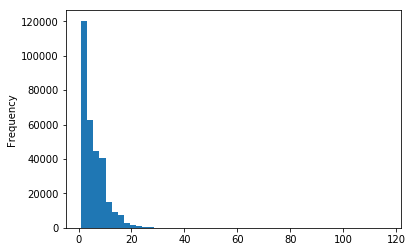

In [10]:
bureau['SK_ID_CURR'].value_counts().plot.hist(bins=50);

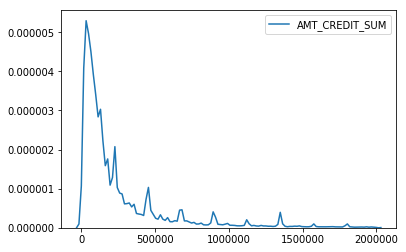

In [11]:
g = sns.kdeplot(bureau['AMT_CREDIT_SUM'].fillna(0), clip=(0, 2e6))
#g.set_xscale('log')
#g.set_xlim(0, 1e7)
#plt.xscale('log')

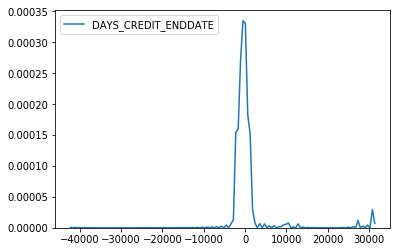

In [12]:
#sns.kdeplot(bureau[['DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT']])
sns.kdeplot(bureau[(bureau['DAYS_CREDIT_ENDDATE'].notna())]['DAYS_CREDIT_ENDDATE'])

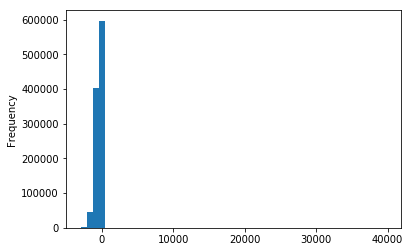

In [13]:
bu_endd = bureau[bureau['DAYS_CREDIT_ENDDATE'].notna() & bureau['DAYS_ENDDATE_FACT'].notna()]
(bu_endd['DAYS_CREDIT'] - bu_endd['DAYS_ENDDATE_FACT']).plot.hist(bins=50)

In [14]:
bu_endd[bu_endd['DAYS_CREDIT'] > bu_endd['DAYS_ENDDATE_FACT']]

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
152799       231661       6590817        Closed      currency 1        -1867   
159692       164981       5813026        Closed      currency 1        -1458   
197282       167355       6263598        Closed      currency 1        -1191   
198346       104463       6550986        Closed      currency 1        -2340   
210097       168249       6577480        Closed      currency 1        -1391   
397369       239225       6325655        Closed      currency 1        -1624   
517329       241703       6460615        Closed      currency 1         -872   
666446       324899       5019170        Closed      currency 1        -1279   
839920       289566       5457839        Closed      currency 1         -543   
1088971      412849       6194634        Closed      currency 1        -1309   
1179226      316507       5520045        Closed      currency 1         -887   
1314635      424657       5203545        Closed      currency 1        -2767   
1321611      213467       5408077        Active      currency 1         -646   
1550542      394875       6638194        Closed      currency 1        -1021   
1701298      149049       6838630        Closed      currency 1        -1315   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
152799                    0               -314.0            -1911.0   
159692                    0              -1092.0            -1574.0   
197282                    0                636.0            -2901.0   
198346                    0              -1836.0           -42023.0   
210097                    0               2277.0            -2632.0   
397369                    0               -893.0            -2489.0   
517329                    0                954.0            -2148.0   
666446                    0               6026.0            -2776.0   
839920                    0               1283.0             -564.0   
1088971                   0               -578.0            -1491.0   
1179226                   0                940.0            -1062.0   
1314635                   0               -940.0            -2850.0   
1321611                   0               3006.0            -1860.0   
1550542                   0                 74.0            -3042.0   
1701298                   0                512.0            -1358.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
152799                      NaN                   0        157500.0   
159692                      NaN                   0        135000.0   
197282                      NaN                   0       4500000.0   
198346                      0.0                   0        225000.0   
210097                      NaN                   0       2250000.0   
397369                      NaN                   0        180000.0   
517329                      NaN                   0       2700000.0   
666446                      NaN                   0       2250000.0   
839920                      NaN                   0        153000.0   
1088971                     NaN                   0         93564.0   
1179226                     NaN                   0       1350000.0   
1314635                     NaN                   0        360000.0   
1321611                     0.0                   0        675000.0   
1550542                     NaN                   0        711450.0   
1701298                     NaN                   0        450000.0   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
152799                   0.0                   NaN                     0.0   
159692                   0.0                   0.0                     0.0   
197282                   0.0                   0.0                     0.0   
198346                   0.0              225000.0                     0.0   
210097                   0.0                   0.0              

In [15]:
(bu_endd['DAYS_ENDDATE_FACT'] > 0).sum()

0

In [16]:
enddate_mask = bureau_clean['DAYS_CREDIT'] > bureau_clean['DAYS_ENDDATE_FACT']
bureau_clean.loc[enddate_mask, 'DAYS_ENDDATE_FACT'] = bureau_clean.loc[enddate_mask, 'DAYS_CREDIT']

In [17]:
summary_cols = ['CREDIT_DAY_OVERDUE',
                'AMT_CREDIT_MAX_OVERDUE',
                'CNT_CREDIT_PROLONG',
                'AMT_CREDIT_SUM',
                'AMT_CREDIT_SUM_DEBT',
                'AMT_CREDIT_SUM_LIMIT',
                'AMT_CREDIT_SUM_OVERDUE',
                'AMT_ANNUITY']

bureau.groupby('SK_ID_CURR').sum()[summary_cols].describe().T

count          mean           std          min  \
CREDIT_DAY_OVERDUE      305811.0  4.592130e+00  8.881293e+01        0.000   
AMT_CREDIT_MAX_OVERDUE  212971.0  1.063252e+04  3.445883e+05        0.000   
CNT_CREDIT_PROLONG      305811.0  3.597974e-02  2.329508e-01        0.000   
AMT_CREDIT_SUM          305809.0  1.992479e+06  4.165831e+06        0.000   
AMT_CREDIT_SUM_DEBT     297439.0  6.723199e+05  1.659898e+06 -6981558.210   
AMT_CREDIT_SUM_LIMIT    280503.0  2.497660e+04  1.022994e+05  -579854.115   
AMT_CREDIT_SUM_OVERDUE  305811.0  2.127933e+02  1.569161e+04        0.000   
AMT_ANNUITY             118224.0  6.507602e+04  7.181037e+05        0.000   

                                 25%         50%           75%           max  
CREDIT_DAY_OVERDUE           0.00000       0.000  0.000000e+00  5.250000e+03  
AMT_CREDIT_MAX_OVERDUE       0.00000       0.000  6.246000e+03  1.159872e+08  
CNT_CREDIT_PROLONG           0.00000       0.000  0.000000e+00  9.000000e+00  
AMT_CREDIT_SUM          346981.50000  978831.000  2.345121e+06  1.017958e+09  
AMT_CREDIT_SUM_DEBT          0.00000  189747.000  7.008052e+05  3.344983e+08  
AMT_CREDIT_SUM_LIMIT         0.00000       0.000  0.000000e+00  8.129328e+06  
AMT_CREDIT_SUM_OVERDUE       0.00000       0.000  0.000000e+00  3.756681e+06  
AMT_ANNUITY               2601.03375   20882.655  5.463719e+04  1.187355e+08

In [20]:
credit_types = bureau_clean.groupby(['SK_ID_CURR', 'CREDIT_TYPE']).size().unstack().fillna(0)
credit_types.head()

CREDIT_TYPE  Another type of loan  Car loan  Cash loan (non-earmarked)  \
SK_ID_CURR                                                               
100001                        0.0       0.0                        0.0   
100002                        0.0       0.0                        0.0   
100003                        0.0       0.0                        0.0   
100004                        0.0       0.0                        0.0   
100005                        0.0       0.0                        0.0   

CREDIT_TYPE  Consumer credit  Credit card  Interbank credit  \
SK_ID_CURR                                                    
100001                   7.0          0.0               0.0   
100002                   4.0          4.0               0.0   
100003                   2.0          2.0               0.0   
100004                   2.0          0.0               0.0   
100005                   2.0          1.0               0.0   

CREDIT_TYPE  Loan for business development  \
SK_ID_CURR                                   
100001                                 0.0   
100002                                 0.0   
100003                                 0.0   
100004                                 0.0   
100005                                 0.0   

CREDIT_TYPE  Loan for purchase of shares (margin lending)  \
SK_ID_CURR                                                  
100001                                                0.0   
100002                                                0.0   
100003                                                0.0   
100004                                                0.0   
100005                                                0.0   

CREDIT_TYPE  Loan for the purchase of equipment  \
SK_ID_CURR                                        
100001                                      0.0   
100002                                      0.0   
100003                                      0.0   
100004                                      0.0   
100005                                      0.0   

CREDIT_TYPE  Loan for working capital replenishment  Microloan  \
SK_ID_CURR                                                       
100001                                          0.0        0.0   
100002                                          0.0        0.0   
100003                                          0.0        0.0   
100004                                          0.0        0.0   
100005                                          0.0        0.0   

CREDIT_TYPE  Mobile operator loan  Mortgage  Real estate loan  \
SK_ID_CURR                                                      
100001                        0.0       0.0               0.0   
100002                        0.0       0.0               0.0   
100003                        0.0       0.0               0.0   
100004                        0.0       0.0               0.0   
100005                        0.0       0.0               0.0   

CREDIT_TYPE  Unknown type of loan  
SK_ID_CURR                         
100001                        0.0  
100002                        0.0  
100003                        0.0  
100004                        0.0  
100005                        0.0

In [21]:
credit_active = bureau_clean.groupby(['SK_ID_CURR', 'CREDIT_ACTIVE']).size().unstack().fillna(0)
credit_active.head()

CREDIT_ACTIVE  Active  Bad debt  Closed  Sold
SK_ID_CURR                                   
100001            3.0       0.0     4.0   0.0
100002            2.0       0.0     6.0   0.0
100003            1.0       0.0     3.0   0.0
100004            0.0       0.0     2.0   0.0
100005            2.0       0.0     1.0   0.0

In [93]:
bureau.groupby(['SK_ID_CURR', 'CREDIT_TYPE']).sum().unstack()[summary_cols].describe().T

count  \
                       CREDIT_TYPE                                              
CREDIT_DAY_OVERDUE     Another type of loan                             962.0   
                       Car loan                                       22796.0   
                       Cash loan (non-earmarked)                         51.0   
                       Consumer credit                               286669.0   
                       Credit card                                   199965.0   
                       Interbank credit                                   1.0   
                       Loan for business development                   1599.0   
                       Loan for purchase of shares (margin lending)       4.0   
                       Loan for the purchase of equipment                18.0   
                       Loan for working capital replenishment           414.0   
                       Microloan                                       4565.0   
                       Mobile operator loan                               1.0   
                       Mortgage                                       16854.0   
                       Real estate loan                                  27.0   
                       Unknown type of loan                             497.0   
AMT_CREDIT_MAX_OVERDUE Another type of loan                             962.0   
                       Car loan                                       22796.0   
                       Cash loan (non-earmarked)                         51.0   
                       Consumer credit                               286669.0   
                       Credit card                                   199965.0   
                       Interbank credit                                   1.0   
                       Loan for business development                   1599.0   
                       Loan for purchase of shares (margin lending)       4.0   
                       Loan for the purchase of equipment                18.0   
                       Loan for working capital replenishment           414.0   
                       Microloan                                       4565.0   
                       Mobile operator loan                               1.0   
                       Mortgage                                       16854.0   
                       Real estate loan                                  27.0   
                       Unknown type of loan                             497.0   
...                                                                       ...   
AMT_CREDIT_SUM_OVERDUE Another type of loan                             962.0   
                       Car loan                                       22796.0   
                       Cash loan (non-earmarked)                         51.0   
                       Consumer credit                               286669.0   
                       Credit card                                   199965.0   
                       Interbank credit                                   1.0   
                       Loan for business development                   1599.0   
                       Loan for purchase of shares (margin lending)       4.0   
                       Loan for the purchase of equipment                18.0   
                       Loan for working capital replenishment           414.0   
                       Microloan                                       4565.0   
                       Mobile operator loan                               1.0   
                       Mortgage                                       16854.0   
                       Real estate loan                                  27.0   
                       Unknown type of loan                             497.0   
AMT_ANNUITY            Another type of loan                             962.0   
                       Car loan                                       22796.0   
                      

In [29]:
bureau_num_summary = bureau.groupby('SK_ID_CURR').sum()

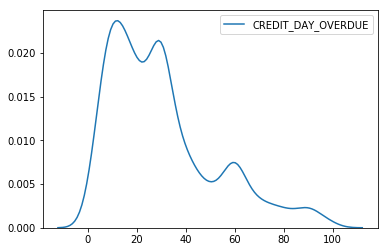

In [36]:
sns.kdeplot(bureau_summary['CREDIT_DAY_OVERDUE'], clip=(0, 100));

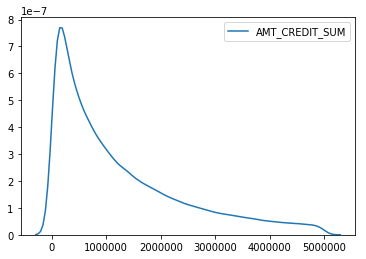

In [35]:
g = sns.kdeplot(bureau_summary['AMT_CREDIT_SUM'].fillna(0), clip=(0, 5e6))

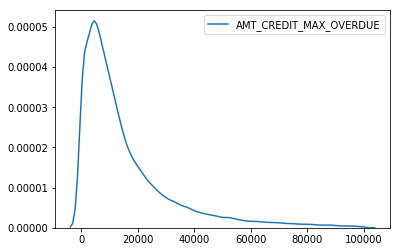

In [34]:
sns.kdeplot(bureau_summary['AMT_CREDIT_MAX_OVERDUE'], clip=(10, 1e5));

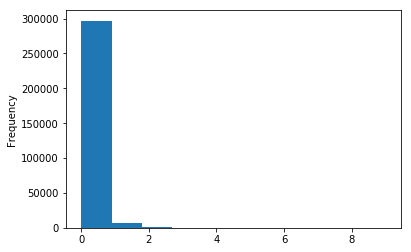

In [37]:
bureau_summary['CNT_CREDIT_PROLONG'].plot.hist();

### Categorical 

In [20]:
cat_cols = ['CREDIT_ACTIVE',
            'CREDIT_CURRENCY',
            'CREDIT_TYPE']

In [22]:
cat_na_count = bureau_clean[cat_cols].isna().sum(axis=0)

with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    display(cat_na_count.sort_values(ascending=False))

CREDIT_TYPE        0
CREDIT_CURRENCY    0
CREDIT_ACTIVE      0
dtype: int64

In [ ]:
#cat_na_map = {cat: 'Unspecified' for cat in cat_na_count[cat_na_count > 0].index}
#bureau_clean = bureau_clean.fillna(value=cat_na_map)

In [23]:
cat_labels = {}

for cat_col in cat_cols:
    cat_labels[cat_col] = bureau_clean[cat_col].unique()
    bureau_clean[cat_col] = pd.Categorical(bureau_clean[cat_col], categories=cat_labels[cat_col])

### Handling na

In [12]:
bureau.isna().sum().sort_values(ascending=False)

AMT_ANNUITY               1226791
AMT_CREDIT_MAX_OVERDUE    1124488
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_DEBT        257669
DAYS_CREDIT_ENDDATE        105553
AMT_CREDIT_SUM                 13
CREDIT_TYPE                     0
AMT_CREDIT_SUM_OVERDUE          0
CNT_CREDIT_PROLONG              0
DAYS_CREDIT_UPDATE              0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT                     0
CREDIT_CURRENCY                 0
CREDIT_ACTIVE                   0
SK_ID_BUREAU                    0
SK_ID_CURR                      0
dtype: int64

### Merging Data

```
bureau_summary
credit_types
credit_active
```

In [30]:
bureau_summary = bureau_num_summary.join([credit_active, credit_types]).fillna(0)
bureau_summary.describe().T

count          mean  \
SK_ID_BUREAU                                  305811.0  3.325212e+07   
DAYS_CREDIT                                   305811.0 -6.410318e+03   
CREDIT_DAY_OVERDUE                            305811.0  4.592130e+00   
DAYS_CREDIT_ENDDATE                           305811.0  2.689176e+03   
DAYS_ENDDATE_FACT                             305811.0 -3.602406e+03   
AMT_CREDIT_MAX_OVERDUE                        305811.0  7.404631e+03   
CNT_CREDIT_PROLONG                            305811.0  3.597974e-02   
AMT_CREDIT_SUM                                305811.0  1.992466e+06   
AMT_CREDIT_SUM_DEBT                           305811.0  6.539142e+05   
AMT_CREDIT_SUM_LIMIT                          305811.0  2.290961e+04   
AMT_CREDIT_SUM_OVERDUE                        305811.0  2.127933e+02   
DAYS_CREDIT_UPDATE                            305811.0 -3.332536e+03   
AMT_ANNUITY                                   305811.0  2.515785e+04   
Active                                        305811.0  2.062081e+00   
Bad debt                                      305811.0  6.866986e-05   
Closed                                        305811.0  3.529216e+00   
Sold                                          305811.0  2.134325e-02   
Another type of loan                          305811.0  3.325583e-03   
Car loan                                      305811.0  9.054612e-02   
Cash loan (non-earmarked)                     305811.0  1.831196e-04   
Consumer credit                               305811.0  4.092773e+00   
Credit card                                   305811.0  1.315175e+00   
Interbank credit                              305811.0  3.269994e-06   
Loan for business development                 305811.0  6.458237e-03   
Loan for purchase of shares (margin lending)  305811.0  1.307997e-05   
Loan for the purchase of equipment            305811.0  6.212988e-05   
Loan for working capital replenishment        305811.0  1.533627e-03   
Microloan                                     305811.0  4.059043e-02   
Mobile operator loan                          305811.0  3.269994e-06   
Mortgage                                      305811.0  6.013845e-02   
Real estate loan                              305811.0  8.828983e-05   
Unknown type of loan                          305811.0  1.814846e-03   

                                                       std          min  \
SK_ID_BUREAU                                  2.657545e+07  5000005.000   
DAYS_CREDIT                                   6.097186e+03   -83611.000   
CREDIT_DAY_OVERDUE                            8.881293e+01        0.000   
DAYS_CREDIT_ENDDATE                           1.269940e+04  -155271.000   
DAYS_ENDDATE_FACT                             4.091260e+03   -74646.000   
AMT_CREDIT_MAX_OVERDUE                        2.876051e+05        0.000   
CNT_CREDIT_PROLONG                            2.329508e-01        0.000   
AMT_CREDIT_SUM                                4.165820e+06        0.000   
AMT_CREDIT_SUM_DEBT                           1.640691e+06 -6981558.210   
AMT_CREDIT_SUM_LIMIT                          9.821637e+04  -579854.115   
AMT_CREDIT_SUM_OVERDUE                        1.569161e+04        0.000   
DAYS_CREDIT_UPDATE                            3.801442e+03   -90065.000   
AMT_ANNUITY                                   4.476138e+05        0.000   
Active                                        1.791724e+00        0.000   
Bad debt                                      8.286457e-03        0.000   
Closed                                        3.430504e+00        0.000   
Sold                                          1.583251e-01        0.000   
Another type of loan                          6.141934e-02        0.000   
Car loan                                      3.512267e-01        0.000   
Cash loan (non-earmarked)                     1.491063e-02        0.000   
Consumer credit                               3.534528e+00        0.000   
Credit card           

### Final checks

In [54]:
bureau_clean.groupby('SK_ID_CURR').sum()[summary_cols].describe().T

count          mean           std          min  \
CREDIT_DAY_OVERDUE      305811.0  4.592130e+00  8.881293e+01        0.000   
AMT_CREDIT_MAX_OVERDUE  305811.0  7.404631e+03  2.876051e+05        0.000   
CNT_CREDIT_PROLONG      305811.0  3.597974e-02  2.329508e-01        0.000   
AMT_CREDIT_SUM          305811.0  1.992466e+06  4.165820e+06        0.000   
AMT_CREDIT_SUM_DEBT     305811.0  6.539142e+05  1.640691e+06 -6981558.210   
AMT_CREDIT_SUM_LIMIT    305811.0  2.290961e+04  9.821637e+04  -579854.115   
AMT_CREDIT_SUM_OVERDUE  305811.0  2.127933e+02  1.569161e+04        0.000   
AMT_ANNUITY             305811.0  2.515785e+04  4.476138e+05        0.000   

                              25%        50%           75%           max  
CREDIT_DAY_OVERDUE           0.00       0.00  0.000000e+00  5.250000e+03  
AMT_CREDIT_MAX_OVERDUE       0.00       0.00  1.938375e+02  1.159872e+08  
CNT_CREDIT_PROLONG           0.00       0.00  0.000000e+00  9.000000e+00  
AMT_CREDIT_SUM          346967.64  978820.74  2.345121e+06  1.017958e+09  
AMT_CREDIT_SUM_DEBT          0.00  173367.00  6.765412e+05  3.344983e+08  
AMT_CREDIT_SUM_LIMIT         0.00       0.00  0.000000e+00  8.129328e+06  
AMT_CREDIT_SUM_OVERDUE       0.00       0.00  0.000000e+00  3.756681e+06  
AMT_ANNUITY                  0.00       0.00  9.805275e+03  1.187355e+08

In [38]:
bureau_summary.describe().T

count          mean  \
SK_ID_BUREAU                                  305811.0  3.325212e+07   
DAYS_CREDIT                                   305811.0 -6.410318e+03   
CREDIT_DAY_OVERDUE                            305811.0  4.592130e+00   
DAYS_CREDIT_ENDDATE                           305811.0  2.689176e+03   
DAYS_ENDDATE_FACT                             305811.0 -3.602406e+03   
AMT_CREDIT_MAX_OVERDUE                        305811.0  7.404631e+03   
CNT_CREDIT_PROLONG                            305811.0  3.597974e-02   
AMT_CREDIT_SUM                                305811.0  1.992466e+06   
AMT_CREDIT_SUM_DEBT                           305811.0  6.539142e+05   
AMT_CREDIT_SUM_LIMIT                          305811.0  2.290961e+04   
AMT_CREDIT_SUM_OVERDUE                        305811.0  2.127933e+02   
DAYS_CREDIT_UPDATE                            305811.0 -3.332536e+03   
AMT_ANNUITY                                   305811.0  2.515785e+04   
Active                                        305811.0  2.062081e+00   
Bad debt                                      305811.0  6.866986e-05   
Closed                                        305811.0  3.529216e+00   
Sold                                          305811.0  2.134325e-02   
Another type of loan                          305811.0  3.325583e-03   
Car loan                                      305811.0  9.054612e-02   
Cash loan (non-earmarked)                     305811.0  1.831196e-04   
Consumer credit                               305811.0  4.092773e+00   
Credit card                                   305811.0  1.315175e+00   
Interbank credit                              305811.0  3.269994e-06   
Loan for business development                 305811.0  6.458237e-03   
Loan for purchase of shares (margin lending)  305811.0  1.307997e-05   
Loan for the purchase of equipment            305811.0  6.212988e-05   
Loan for working capital replenishment        305811.0  1.533627e-03   
Microloan                                     305811.0  4.059043e-02   
Mobile operator loan                          305811.0  3.269994e-06   
Mortgage                                      305811.0  6.013845e-02   
Real estate loan                              305811.0  8.828983e-05   
Unknown type of loan                          305811.0  1.814846e-03   

                                                       std          min  \
SK_ID_BUREAU                                  2.657545e+07  5000005.000   
DAYS_CREDIT                                   6.097186e+03   -83611.000   
CREDIT_DAY_OVERDUE                            8.881293e+01        0.000   
DAYS_CREDIT_ENDDATE                           1.269940e+04  -155271.000   
DAYS_ENDDATE_FACT                             4.091260e+03   -74646.000   
AMT_CREDIT_MAX_OVERDUE                        2.876051e+05        0.000   
CNT_CREDIT_PROLONG                            2.329508e-01        0.000   
AMT_CREDIT_SUM                                4.165820e+06        0.000   
AMT_CREDIT_SUM_DEBT                           1.640691e+06 -6981558.210   
AMT_CREDIT_SUM_LIMIT                          9.821637e+04  -579854.115   
AMT_CREDIT_SUM_OVERDUE                        1.569161e+04        0.000   
DAYS_CREDIT_UPDATE                            3.801442e+03   -90065.000   
AMT_ANNUITY                                   4.476138e+05        0.000   
Active                                        1.791724e+00        0.000   
Bad debt                                      8.286457e-03        0.000   
Closed                                        3.430504e+00        0.000   
Sold                                          1.583251e-01        0.000   
Another type of loan                          6.141934e-02        0.000   
Car loan                                      3.512267e-01        0.000   
Cash loan (non-earmarked)                     1.491063e-02        0.000   
Consumer credit                               3.534528e+00        0.000   
Credit card           

## bureau_balance.csv

## previous_application.csv

In [43]:
previous_application = pd.read_csv('data/previous_application.csv')
previous_clean = previous_application.copy()

In [42]:
previous_application.head().T

0                 1  \
SK_ID_PREV                                    2030495           2802425   
SK_ID_CURR                                     271877            108129   
NAME_CONTRACT_TYPE                     Consumer loans        Cash loans   
AMT_ANNUITY                                   1730.43           25188.6   
AMT_APPLICATION                                 17145            607500   
AMT_CREDIT                                      17145            679671   
AMT_DOWN_PAYMENT                                    0               NaN   
AMT_GOODS_PRICE                                 17145            607500   
WEEKDAY_APPR_PROCESS_START                   SATURDAY          THURSDAY   
HOUR_APPR_PROCESS_START                            15                11   
FLAG_LAST_APPL_PER_CONTRACT                         Y                 Y   
NFLAG_LAST_APPL_IN_DAY                              1                 1   
RATE_DOWN_PAYMENT                                   0               NaN   
RATE_INTEREST_PRIMARY                        0.182832               NaN   
RATE_INTEREST_PRIVILEGED                     0.867336               NaN   
NAME_CASH_LOAN_PURPOSE                            XAP               XNA   
NAME_CONTRACT_STATUS                         Approved          Approved   
DAYS_DECISION                                     -73              -164   
NAME_PAYMENT_TYPE               Cash through the bank               XNA   
CODE_REJECT_REASON                                XAP               XAP   
NAME_TYPE_SUITE                                   NaN     Unaccompanied   
NAME_CLIENT_TYPE                             Repeater          Repeater   
NAME_GOODS_CATEGORY                            Mobile               XNA   
NAME_PORTFOLIO                                    POS              Cash   
NAME_PRODUCT_TYPE                                 XNA            x-sell   
CHANNEL_TYPE                             Country-wide    Contact center   
SELLERPLACE_AREA                                   35                -1   
NAME_SELLER_INDUSTRY                     Connectivity               XNA   
CNT_PAYMENT                                        12                36   
NAME_YIELD_GROUP                               middle        low_action   
PRODUCT_COMBINATION          POS mobile with interest  Cash X-Sell: low   
DAYS_FIRST_DRAWING                             365243            365243   
DAYS_FIRST_DUE                                    -42              -134   
DAYS_LAST_DUE_1ST_VERSION                         300               916   
DAYS_LAST_DUE                                     -42            365243   
DAYS_TERMINATION                                  -37            365243   
NFLAG_INSURED_ON_APPROVAL                           0                 1   

                                                   2                        3  \
SK_ID_PREV                                   2523466                  2819243   
SK_ID_CURR                                    122040                   176158   
NAME_CONTRACT_TYPE                        Cash loans               Cash loans   
AMT_ANNUITY                                  15060.7                  47041.3   
AMT_APPLICATION                               112500                   450000   
AMT_CREDIT                                    136444                   470790   
AMT_DOWN_PAYMENT                                 NaN                      NaN   
AMT_GOODS_PRICE                               112500                   450000   
WEEKDAY_APPR_PROCESS_START                   TUESDAY                   MONDAY   
HOUR_APPR_PROCESS_START                           11                        7   
FLAG_LAST_APPL_PER_CONTRACT                        Y                        Y   
NFLAG_LAST_APPL_IN_DAY                             1                        1   
RATE_DOWN_PAYMENT                                NaN                      NaN   
RATE_INTEREST_PRIMARY                            NaN               

In [40]:
previous_application.describe().T

count          mean            std  \
SK_ID_PREV                 1670214.0  1.923089e+06  532597.958696   
SK_ID_CURR                 1670214.0  2.783572e+05  102814.823849   
AMT_ANNUITY                1297979.0  1.595512e+04   14782.137335   
AMT_APPLICATION            1670214.0  1.752339e+05  292779.762386   
AMT_CREDIT                 1670213.0  1.961140e+05  318574.616547   
AMT_DOWN_PAYMENT            774370.0  6.697402e+03   20921.495410   
AMT_GOODS_PRICE            1284699.0  2.278473e+05  315396.557937   
HOUR_APPR_PROCESS_START    1670214.0  1.248418e+01       3.334028   
NFLAG_LAST_APPL_IN_DAY     1670214.0  9.964675e-01       0.059330   
RATE_DOWN_PAYMENT           774370.0  7.963682e-02       0.107823   
RATE_INTEREST_PRIMARY         5951.0  1.883569e-01       0.087671   
RATE_INTEREST_PRIVILEGED      5951.0  7.735025e-01       0.100879   
DAYS_DECISION              1670214.0 -8.806797e+02     779.099667   
SELLERPLACE_AREA           1670214.0  3.139511e+02    7127.443459   
CNT_PAYMENT                1297984.0  1.605408e+01      14.567288   
DAYS_FIRST_DRAWING          997149.0  3.422099e+05   88916.115833   
DAYS_FIRST_DUE              997149.0  1.382627e+04   72444.869708   
DAYS_LAST_DUE_1ST_VERSION   997149.0  3.376777e+04  106857.034789   
DAYS_LAST_DUE               997149.0  7.658240e+04  149647.415123   
DAYS_TERMINATION            997149.0  8.199234e+04  153303.516729   
NFLAG_INSURED_ON_APPROVAL   997149.0  3.325702e-01       0.471134   

                                    min           25%           50%  \
SK_ID_PREV                 1.000001e+06  1.461857e+06  1.923110e+06   
SK_ID_CURR                 1.000010e+05  1.893290e+05  2.787145e+05   
AMT_ANNUITY                0.000000e+00  6.321780e+03  1.125000e+04   
AMT_APPLICATION            0.000000e+00  1.872000e+04  7.104600e+04   
AMT_CREDIT                 0.000000e+00  2.416050e+04  8.054100e+04   
AMT_DOWN_PAYMENT          -9.000000e-01  0.000000e+00  1.638000e+03   
AMT_GOODS_PRICE            0.000000e+00  5.084100e+04  1.123200e+05   
HOUR_APPR_PROCESS_START    0.000000e+00  1.000000e+01  1.200000e+01   
NFLAG_LAST_APPL_IN_DAY     0.000000e+00  1.000000e+00  1.000000e+00   
RATE_DOWN_PAYMENT         -1.497876e-05  0.000000e+00  5.160508e-02   
RATE_INTEREST_PRIMARY      3.478125e-02  1.607163e-01  1.891222e-01   
RATE_INTEREST_PRIVILEGED   3.731501e-01  7.156448e-01  8.350951e-01   
DAYS_DECISION             -2.922000e+03 -1.300000e+03 -5.810000e+02   
SELLERPLACE_AREA          -1.000000e+00 -1.000000e+00  3.000000e+00   
CNT_PAYMENT                0.000000e+00  6.000000e+00  1.200000e+01   
DAYS_FIRST_DRAWING        -2.922000e+03  3.652430e+05  3.652430e+05   
DAYS_FIRST_DUE            -2.892000e+03 -1.628000e+03 -8.310000e+02   
DAYS_LAST_DUE_1ST_VERSION -2.801000e+03 -1.242000e+03 -3.610000e+02   
DAYS_LAST_DUE             -2.889000e+03 -1.314000e+03 -5.370000e+02   
DAYS_TERMINATION          -2.874000e+03 -1.270000e+03 -4.990000e+02   
NFLAG_INSURED_ON_APPROVAL  0.000000e+00  0.000000e+00  0.000000e+00   

                                    75%          max  
SK_ID_PREV                 2.384280e+06  2845382.000  
SK_ID_CURR                 3.675140e+05   456255.000  
AMT_ANNUITY                2.065842e+04   418058.145  
AMT_APPLICATION            1.803600e+05  6905160.000  
AMT_CREDIT                 2.164185e+05  6905160.000  
AMT_DOWN_PAYMENT           7.740000e+03  3060045.000  
AMT_GOODS_PRICE            2.340000e+05  6905160.000  
HOUR_APPR_PROCESS_START    1.500000e+01       23.000  
NFLAG_LAST_APPL_IN_DAY     1.000000e+00        1.000  
RATE_DOWN_PAYMENT          1.089091e-01        1.000  
RATE_INTEREST_PRIMARY      1.933299e-01        1.000  
RATE_INTEREST_PRIVILEGED   8.525370e-01        1.000  
DAYS_DECISION             -2.800000e+02       -1.000  
SELLERPLACE_AREA           8.200000e+01  4000000.000  
CNT_PAYMENT                2.400000e+01       84.000  
DAYS_FIRST_DRAWING         3.652430e+05   365243.000  
DAYS_FIRST_DUE

In [44]:
cat_cols = ['NAME_CONTRACT_TYPE',
            'WEEKDAY_APPR_PROCESS_START',
            'NAME_CASH_LOAN_PURPOSE',
            'NAME_CONTRACT_STATUS',
            'NAME_PAYMENT_TYPE',
            'CODE_REJECT_REASON',
            'NAME_TYPE_SUITE',
            'NAME_CLIENT_TYPE',
            'NAME_GOODS_CATEGORY',
            'NAME_PORTFOLIO',
            'NAME_PRODUCT_TYPE',
            'CHANNEL_TYPE',
            'NAME_SELLER_INDUSTRY',
            'NAME_YIELD_GROUP',
            'PRODUCT_COMBINATION']

In [45]:
cat_na_count = previous_clean[cat_cols].isna().sum(axis=0)

with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    display(cat_na_count.sort_values(ascending=False))

NAME_TYPE_SUITE               820405
PRODUCT_COMBINATION              346
NAME_YIELD_GROUP                   0
NAME_SELLER_INDUSTRY               0
CHANNEL_TYPE                       0
NAME_PRODUCT_TYPE                  0
NAME_PORTFOLIO                     0
NAME_GOODS_CATEGORY                0
NAME_CLIENT_TYPE                   0
CODE_REJECT_REASON                 0
NAME_PAYMENT_TYPE                  0
NAME_CONTRACT_STATUS               0
NAME_CASH_LOAN_PURPOSE             0
WEEKDAY_APPR_PROCESS_START         0
NAME_CONTRACT_TYPE                 0
dtype: int64

In [46]:
cat_na_map = {cat: 'Unspecified' for cat in cat_na_count[cat_na_count > 0].index}
previous_clean = previous_clean.fillna(value=cat_na_map)

In [47]:
cat_labels = {}

for cat_col in cat_cols:
    cat_labels[cat_col] = previous_clean[cat_col].unique()
    previous_clean[cat_col] = pd.Categorical(previous_clean[cat_col], categories=cat_labels[cat_col])

In [50]:
prev_app_num_summary = previous_clean.groupby('SK_ID_CURR').sum()
prev_app_num_summary.head().T

SK_ID_CURR                       100001       100002        100003  \
SK_ID_PREV                 1.369693e+06  1038818.000  6.843451e+06   
AMT_ANNUITY                3.951000e+03     9251.775  1.696620e+05   
AMT_APPLICATION            2.483550e+04   179055.000  1.306310e+06   
AMT_CREDIT                 2.378700e+04   179055.000  1.452573e+06   
AMT_DOWN_PAYMENT           2.520000e+03        0.000  6.885000e+03   
AMT_GOODS_PRICE            2.483550e+04   179055.000  1.306310e+06   
HOUR_APPR_PROCESS_START    1.300000e+01        9.000  4.400000e+01   
NFLAG_LAST_APPL_IN_DAY     1.000000e+00        1.000  3.000000e+00   
RATE_DOWN_PAYMENT          1.043262e-01        0.000  1.000606e-01   
RATE_INTEREST_PRIMARY               NaN          NaN           NaN   
RATE_INTEREST_PRIVILEGED            NaN          NaN           NaN   
DAYS_DECISION             -1.740000e+03     -606.000 -3.915000e+03   
SELLERPLACE_AREA           2.300000e+01      500.000  1.599000e+03   
CNT_PAYMENT                8.000000e+00       24.000  3.000000e+01   
DAYS_FIRST_DRAWING         3.652430e+05   365243.000  1.095729e+06   
DAYS_FIRST_DUE            -1.709000e+03     -565.000 -3.823000e+03   
DAYS_LAST_DUE_1ST_VERSION -1.499000e+03      125.000 -3.013000e+03   
DAYS_LAST_DUE             -1.619000e+03      -25.000 -3.163000e+03   
DAYS_TERMINATION          -1.612000e+03      -17.000 -3.142000e+03   
NFLAG_INSURED_ON_APPROVAL  0.000000e+00        0.000  2.000000e+00   

SK_ID_CURR                       100004        100005  
SK_ID_PREV                 1.564014e+06  4.353674e+06  
AMT_ANNUITY                5.357250e+03  4.813200e+03  
AMT_APPLICATION            2.428200e+04  4.461750e+04  
AMT_CREDIT                 2.010600e+04  4.015350e+04  
AMT_DOWN_PAYMENT           4.860000e+03  4.464000e+03  
AMT_GOODS_PRICE            2.428200e+04  4.461750e+04  
HOUR_APPR_PROCESS_START    5.000000e+00  2.100000e+01  
NFLAG_LAST_APPL_IN_DAY     1.000000e+00  2.000000e+00  
RATE_DOWN_PAYMENT          2.120076e-01  1.089640e-01  
RATE_INTEREST_PRIMARY               NaN           NaN  
RATE_INTEREST_PRIVILEGED            NaN           NaN  
DAYS_DECISION             -8.150000e+02 -1.072000e+03  
SELLERPLACE_AREA           3.000000e+01  3.600000e+01  
CNT_PAYMENT                4.000000e+00  1.200000e+01  
DAYS_FIRST_DRAWING         3.652430e+05  3.652430e+05  
DAYS_FIRST_DUE            -7.840000e+02 -7.060000e+02  
DAYS_LAST_DUE_1ST_VERSION -6.940000e+02 -3.760000e+02  
DAYS_LAST_DUE             -7.240000e+02 -4.660000e+02  
DAYS_TERMINATION          -7.140000e+02 -4.600000e+02  
NFLAG_INSURED_ON_APPROVAL  0.000000e+00  0.000000e+00

In [51]:
prev_app_num_summary.describe().T

count          mean           std           min  \
SK_ID_PREV                 338857.0  9.478837e+06  8.254497e+06  1.000005e+06   
AMT_ANNUITY                338377.0  6.120218e+04  7.379216e+04  0.000000e+00   
AMT_APPLICATION            338857.0  8.637214e+05  1.353907e+06  0.000000e+00   
AMT_CREDIT                 338857.0  9.666384e+05  1.495396e+06  0.000000e+00   
AMT_DOWN_PAYMENT           318753.0  1.627049e+04  4.228138e+04 -4.500000e-01   
AMT_GOODS_PRICE            337793.0  8.665519e+05  1.355421e+06  0.000000e+00   
HOUR_APPR_PROCESS_START    338857.0  6.153408e+01  5.368256e+01  0.000000e+00   
NFLAG_LAST_APPL_IN_DAY     338857.0  4.911553e+00  4.201477e+00  0.000000e+00   
RATE_DOWN_PAYMENT          318753.0  1.934675e-01  2.389893e-01 -1.497876e-05   
RATE_INTEREST_PRIMARY        5721.0  1.959294e-01  9.659298e-02  3.478125e-02   
RATE_INTEREST_PRIVILEGED     5721.0  8.045995e-01  1.936186e-01  3.731501e-01   
DAYS_DECISION              338857.0 -4.340838e+03  4.306790e+03 -8.914000e+04   
SELLERPLACE_AREA           338857.0  1.547454e+03  1.624734e+04 -4.300000e+01   
CNT_PAYMENT                338379.0  6.158166e+01  7.475645e+01  0.000000e+00   
DAYS_FIRST_DRAWING         337340.0  1.011544e+06  7.189732e+05 -3.505000e+03   
DAYS_FIRST_DUE             337340.0  4.086930e+04  1.225920e+05 -4.242300e+04   
DAYS_LAST_DUE_1ST_VERSION  337340.0  9.981473e+04  1.648668e+05 -3.573300e+04   
DAYS_LAST_DUE              337340.0  2.263712e+05  2.696076e+05 -3.287600e+04   
DAYS_TERMINATION           337340.0  2.423626e+05  2.732711e+05 -2.747700e+04   
NFLAG_INSURED_ON_APPROVAL  337340.0  9.830497e-01  1.322559e+00  0.000000e+00   

                                    25%           50%           75%  \
SK_ID_PREV                 3.722954e+06  7.181140e+06  1.266789e+07   
AMT_ANNUITY                1.617444e+04  3.698415e+04  7.825941e+04   
AMT_APPLICATION            1.503450e+05  3.902040e+05  1.028205e+06   
AMT_CREDIT                 1.595655e+05  4.372785e+05  1.178910e+06   
AMT_DOWN_PAYMENT           0.000000e+00  7.033500e+03  1.889933e+04   
AMT_GOODS_PRICE            1.519425e+05  3.926475e+05  1.032106e+06   
HOUR_APPR_PROCESS_START    2.400000e+01  4.700000e+01  8.200000e+01   
NFLAG_LAST_APPL_IN_DAY     2.000000e+00  4.000000e+00  7.000000e+00   
RATE_DOWN_PAYMENT          0.000000e+00  1.089091e-01  2.712750e-01   
RATE_INTEREST_PRIMARY      1.607163e-01  1.891363e-01  1.933299e-01   
RATE_INTEREST_PRIVILEGED   7.156448e-01  8.350951e-01  8.525370e-01   
DAYS_DECISION             -5.942000e+03 -3.031000e+03 -1.302000e+03   
SELLERPLACE_AREA           6.400000e+01  2.720000e+02  1.567000e+03   
CNT_PAYMENT                1.800000e+01  3.600000e+01  7.800000e+01   
DAYS_FIRST_DRAWING         3.652430e+05  7.304860e+05  1.460657e+06   
DAYS_FIRST_DUE            -3.944250e+03 -1.829000e+03 -5.470000e+02   
DAYS_LAST_DUE_1ST_VERSION -1.918000e+03 -3.140000e+02  3.598212e+05   
DAYS_LAST_DUE             -1.691000e+03 -4.900000e+01  3.645570e+05   
DAYS_TERMINATION          -1.411000e+03  3.578800e+05  3.647760e+05   
NFLAG_INSURED_ON_APPROVAL  0.000000e+00  1.000000e+00  1.000000e+00   

                                    max  
SK_ID_PREV                 1.424577e+08  
AMT_ANNUITY                2.051103e+06  
AMT_APPLICATION            3.827475e+07  
AMT_CREDIT                 4.359984e+07  
AMT_DOWN_PAYMENT           6.441543e+06  
AMT_GOODS_PRICE            3.827475e+07  
HOUR_APPR_PROCESS_START    9.150000e+02  
NFLAG_LAST_APPL_IN_DAY     7.700000e+01  
RATE_DOWN_PAYMENT          5.424696e+00  
RATE_INTEREST_PRIMARY      1.332200e+00  
RATE_INTEREST_PRIVILEGED   3.220930e+00  
DAYS_DECISION             -2.000000e+00  
SELLERPLACE_AREA           4.002296e+06  
CNT_PAYMENT                1.788000e+03  
DAYS_FIRST_DRAWING         9.131075e+06  
DAYS_FIRST_DUE             1.459730e+06  
DAYS_LAST_DUE_1ST_VERSION  1.461470e+06  
DAYS_LAST_DUE              1.826215e+06  
DAYS_TERMINATION           1.826215e+0

In [57]:
prev_app_cat_summary = pd.get_dummies(previous_clean[cat_cols + ['SK_ID_CURR']]).groupby('SK_ID_CURR').sum()
prev_app_cat_summary.head()

NAME_CONTRACT_TYPE_Consumer loans  NAME_CONTRACT_TYPE_Cash loans  \
SK_ID_CURR                                                                     
100001                                      1                              0   
100002                                      1                              0   
100003                                      2                              1   
100004                                      1                              0   
100005                                      1                              1   

            NAME_CONTRACT_TYPE_Revolving loans  NAME_CONTRACT_TYPE_XNA  \
SK_ID_CURR                                                               
100001                                       0                       0   
100002                                       0                       0   
100003                                       0                       0   
100004                                       0                       0   
100005                                       0                       0   

            WEEKDAY_APPR_PROCESS_START_SATURDAY  \
SK_ID_CURR                                        
100001                                        0   
100002                                        1   
100003                                        1   
100004                                        0   
100005                                        0   

            WEEKDAY_APPR_PROCESS_START_THURSDAY  \
SK_ID_CURR                                        
100001                                        0   
100002                                        0   
100003                                        0   
100004                                        0   
100005                                        1   

            WEEKDAY_APPR_PROCESS_START_TUESDAY  \
SK_ID_CURR                                       
100001                                       0   
100002                                       0   
100003                                       0   
100004                                       0   
100005                                       0   

            WEEKDAY_APPR_PROCESS_START_MONDAY  \
SK_ID_CURR                                      
100001                                      0   
100002                                      0   
100003                                      0   
100004                                      0   
100005                                      0   

            WEEKDAY_APPR_PROCESS_START_FRIDAY  \
SK_ID_CURR                                      
100001                                      1   
100002                                      0   
100003                                      1   
100004                                      1   
100005                                      1   

            WEEKDAY_APPR_PROCESS_START_SUNDAY  \
SK_ID_CURR                                      
100001                                      0   
100002                                      0   
100003                                      1   
100004                                      0   
100005                                      0   

                         ...                 \
SK_ID_CURR               ...                  
100001                   ...                  
100002                   ...                  
100003                   ...                  
100004                   ...                  
100005                   ...                  

            PRODUCT_COMBINATION_POS other with interest  \
SK_ID_CURR                                                
100001                                                0   
100002                                                1   
100003                                                0   
100004                                                0   
100005                                                0   

            PRODUCT_COMBINATION_Card X-Sell  \
SK_ID_CURR                                

In [58]:
prev_app_summary = prev_app_num_summary.join(prev_app_cat_summary)

In [59]:
prev_app_summary.head()

SK_ID_PREV  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
SK_ID_CURR                                                         
100001         1369693     3951.000          24835.5     23787.0   
100002         1038818     9251.775         179055.0    179055.0   
100003         6843451   169661.970        1306309.5   1452573.0   
100004         1564014     5357.250          24282.0     20106.0   
100005         4353674     4813.200          44617.5     40153.5   

            AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
SK_ID_CURR                                                               
100001                2520.0          24835.5                       13   
100002                   0.0         179055.0                        9   
100003                6885.0        1306309.5                       44   
100004                4860.0          24282.0                        5   
100005                4464.0          44617.5                       21   

            NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
SK_ID_CURR                                                                     
100001                           1           0.104326                    NaN   
100002                           1           0.000000                    NaN   
100003                           3           0.100061                    NaN   
100004                           1           0.212008                    NaN   
100005                           2           0.108964                    NaN   

                         ...                 \
SK_ID_CURR               ...                  
100001                   ...                  
100002                   ...                  
100003                   ...                  
100004                   ...                  
100005                   ...                  

            PRODUCT_COMBINATION_POS other with interest  \
SK_ID_CURR                                                
100001                                                0   
100002                                                1   
100003                                                0   
100004                                                0   
100005                                                0   

            PRODUCT_COMBINATION_Card X-Sell  \
SK_ID_CURR                                    
100001                                    0   
100002                                    0   
100003                                    0   
100004                                    0   
100005                                    0   

            PRODUCT_COMBINATION_POS mobile without interest  \
SK_ID_CURR                                                    
100001                                                    0   
100002                                                    0   
100003                                                    0   
100004                                                    1   
100005                                                    0   

            PRODUCT_COMBINATION_Card Street  \
SK_ID_CURR                                    
100001                                    0   
100002                                    0   
100003                                    0   
100004                                    0   
100005                                    0   

            PRODUCT_COMBINATION_POS industry with interest  \
SK_ID_CURR                                                   
100001                                                   0   
100002                                                   0   
100003                                                   1   
100004                                                   0   
100005                                                   0   

            PRODUCT_COMBINATION_Cash Street: low  \
SK_ID_CURR                                         
100001                                         0   
100002            

## Using prepare_data.py

In [1]:
from prepare_data import HCDALoader

loader = HCDALoader()

In [2]:
applications_train = loader.read_applications_train()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [3]:
bureau_summary = loader.read_bureau()

In [4]:
previous_summary = loader.read_previous_application()

In [5]:
bureau_summary.head().T

SK_ID_CURR                                        100001        100002  \
SK_ID_BUREAU                                  41276431.0  4.922618e+07   
DAYS_CREDIT                                      -5145.0 -6.992000e+03   
CREDIT_DAY_OVERDUE                                   0.0  0.000000e+00   
DAYS_CREDIT_ENDDATE                                577.0 -2.094000e+03   
DAYS_ENDDATE_FACT                                -3302.0 -4.185000e+03   
AMT_CREDIT_MAX_OVERDUE                               0.0  8.405145e+03   
CNT_CREDIT_PROLONG                                   0.0  0.000000e+00   
AMT_CREDIT_SUM                                 1453365.0  8.650556e+05   
AMT_CREDIT_SUM_DEBT                             596686.5  2.457810e+05   
AMT_CREDIT_SUM_LIMIT                                 0.0  3.198856e+04   
AMT_CREDIT_SUM_OVERDUE                               0.0  0.000000e+00   
DAYS_CREDIT_UPDATE                                -652.0 -3.999000e+03   
AMT_ANNUITY                                      24817.5  0.000000e+00   
Closed                                               4.0  6.000000e+00   
Active                                               3.0  2.000000e+00   
Sold                                                 0.0  0.000000e+00   
Bad debt                                             0.0  0.000000e+00   
Consumer credit                                      7.0  4.000000e+00   
Credit card                                          0.0  4.000000e+00   
Mortgage                                             0.0  0.000000e+00   
Car loan                                             0.0  0.000000e+00   
Microloan                                            0.0  0.000000e+00   
Loan for working capital replenishment               0.0  0.000000e+00   
Loan for business development                        0.0  0.000000e+00   
Real estate loan                                     0.0  0.000000e+00   
Unknown type of loan                                 0.0  0.000000e+00   
Another type of loan                                 0.0  0.000000e+00   
Cash loan (non-earmarked)                            0.0  0.000000e+00   
Loan for the purchase of equipment                   0.0  0.000000e+00   
Mobile operator loan                                 0.0  0.000000e+00   
Interbank credit                                     0.0  0.000000e+00   
Loan for purchase of shares (margin lending)         0.0  0.000000e+00   

SK_ID_CURR                                        100003      100004  \
SK_ID_BUREAU                                  23543514.0  13658267.0   
DAYS_CREDIT                                      -5603.0     -1734.0   
CREDIT_DAY_OVERDUE                                   0.0         0.0   
DAYS_CREDIT_ENDDATE                              -2178.0      -977.0   
DAYS_ENDDATE_FACT                                -3292.0     -1065.0   
AMT_CREDIT_MAX_OVERDUE                               0.0         0.0   
CNT_CREDIT_PROLONG                                   0.0         0.0   
AMT_CREDIT_SUM                                 1017400.5    189037.8   
AMT_CREDIT_SUM_DEBT                                  0.0         0.0   
AMT_CREDIT_SUM_LIMIT                            810000.0         0.0   
AMT_CREDIT_SUM_OVERDUE                               0.0         0.0   
DAYS_CREDIT_UPDATE                               -3264.0     -1064.0   
AMT_ANNUITY                                          0.0         0.0   
Closed                                               3.0         2.0   
Active                                               1.0         0.0   
Sold                                                 0.0         0.0   
Bad debt                                             0.0         0.0   
Consumer credit                                      2.0         2.0   
Credit card                                          2.0         0.0   
Mortgage                                             0.0         0.0   
Car loan                                     

In [20]:
joined = applications_train.join(bureau_summary, rsuffix='_BUREAU').join(previous_summary, rsuffix='_PREVIOUS')

In [21]:
import numpy as np
full_data = joined.combine_first(joined.select_dtypes(include=[np.number]).fillna(0))

In [24]:
full_data.drop('TARGET', axis=1)

AMT_ANNUITY  AMT_ANNUITY_BUREAU  AMT_ANNUITY_PREVIOUS  \
SK_ID_CURR                                                          
100002          24700.5                0.00              9251.775   
100003          35698.5                0.00            169661.970   
100004           6750.0                0.00              5357.250   
100006          29686.5                0.00            141907.050   
100007          21865.5                0.00             73672.830   
100008          27517.5                0.00             63358.785   
100009          41301.0                0.00             70359.885   
100010          42075.0                0.00             27463.410   
100011          33826.5                0.00             54909.585   
100012          20250.0                0.00             23682.465   
100014          21177.0                0.00             25613.100   
100015          10678.5                0.00              7666.920   
100016           5881.5                0.00             34372.620   
100017          28966.5                0.00             28750.815   
100018          32778.0                0.00            154678.815   
100019          20160.0            54000.00             10518.615   
100020          26149.5                0.00             14509.035   
100021          13500.0                0.00             64116.990   
100022           7875.0                0.00              6765.975   
100023          17563.5                0.00             35583.570   
100024          21375.0                0.00                 0.000   
100025          37561.5                0.00            193519.170   
100026          32521.5                0.00             66387.330   
100027          23850.0                0.00             72203.265   
100029          12703.5                0.00             22891.680   
100030          11074.5                0.00             37848.330   
100031          27076.5                0.00                 0.000   
100032          23827.5            69750.00              7910.145   
100033          57676.5                0.00              5542.920   
100034           9000.0                0.00             43711.560   
...                 ...                 ...                   ...   
456225          19975.5                0.00            102196.350   
456226          34969.5                0.00             60461.055   
456227          16479.0                0.00             69359.130   
456228          35617.5                0.00            272374.020   
456229           9000.0                0.00                 0.000   
456230          18283.5           112629.60            106832.745   
456231          31473.0            29664.00            126510.660   
456232          13351.5                0.00             39477.330   
456233          23089.5             7537.50             11365.560   
456234           9148.5           131250.15             20611.710   
456235          31522.5                0.00             37800.405   
456236          43443.0                0.00             83271.735   
456237          37678.5                0.00            109993.185   
456238          46858.5            19800.00              9638.730   
456239          23773.5                0.00             11547.450   
456240          16875.0                0.00            109616.265   
456241          12028.5                0.00             89510.310   
456242          52168.5            11205.00             44218.080   
456243          12694.5                0.00             44834.085   
456244          35982.0            82386.00            379955.475   
456245          11871.0                0.00             12174.840   
456246          10620.0                0.00             13497.660   
456247          17770.5            43591.50             41867.685   
456248          16096.5                0.00            149776.155   
456249          22050.0                0.00             34267.905   
456251    

In [24]:
corr_target = full_data.corr()['TARGET']

In [25]:
corr_target.sort_values()

EXT_SOURCE_2                                         -0.160303
EXT_SOURCE_3                                         -0.157397
EXT_SOURCE_1                                         -0.099152
DAYS_EMPLOYED                                        -0.044932
CURR_HOME_0                                          -0.043004
AMT_GOODS_PRICE                                      -0.039618
Closed                                               -0.037233
REGION_POPULATION_RELATIVE                           -0.037227
RATE_DOWN_PAYMENT                                    -0.036934
DAYS_FIRST_DRAWING                                   -0.033153
AMT_CREDIT                                           -0.030369
FLAG_DOCUMENT_6                                      -0.028602
PRODUCT_COMBINATION_POS industry with interest       -0.028131
NAME_GOODS_CATEGORY_Furniture                        -0.026800
AMT_DOWN_PAYMENT                                     -0.024709
HOUR_APPR_PROCESS_START                              -0

In [7]:
app_ix = loader.applications_train_index()

In [8]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2, shuffle=True)

for train, test in kf.split(app_ix):
    print("{} {}".format(train, test))
    

[     0      1      4 ..., 307506 307509 307510] [     2      3      8 ..., 307505 307507 307508]
[     2      3      8 ..., 307505 307507 307508] [     0      1      4 ..., 307506 307509 307510]


In [12]:
app_ix.shape

(307511,)

In [13]:
applications.iloc[test]

NameError: name 'applications' is not defined

In [14]:
train_data, test_data = loader.load_train_val(train, test)

In [15]:
train_data.shape, test_data.shape

((153756, 285), (153755, 285))

In [16]:
train_data.loc[:, train_data.dtypes == np.number]


AMT_ANNUITY  AMT_ANNUITY_BUREAU  AMT_ANNUITY_PREVIOUS  \
SK_ID_CURR                                                          
100004           6750.0               0.000              5357.250   
100006          29686.5               0.000            141907.050   
100011          33826.5               0.000             54909.585   
100012          20250.0               0.000             23682.465   
100015          10678.5               0.000              7666.920   
100016           5881.5               0.000             34372.620   
100020          26149.5               0.000             14509.035   
100021          13500.0               0.000             64116.990   
100022           7875.0               0.000              6765.975   
100023          17563.5               0.000             35583.570   
100029          12703.5               0.000             22891.680   
100031          27076.5               0.000                 0.000   
100034           9000.0               0.000             43711.560   
100035          24592.5               0.000            189857.520   
100036          25033.5               0.000             43069.770   
100037          20893.5               0.000             85058.820   
100043          23157.0           32580.000            377266.455   
100045          17338.5               0.000             74240.595   
100047          35028.0               0.000            100499.490   
100048          29196.0               0.000            115566.795   
100049          16258.5               0.000             28739.295   
100050          42970.5               0.000             15919.605   
100054          26838.0               0.000             39719.340   
100056          49927.5               0.000             52685.145   
100058           6750.0               0.000                 0.000   
100059          34596.0           49986.000            336793.635   
100060          14661.0               0.000             12177.000   
100063          45558.0           40013.010            143528.715   
100068          12375.0               0.000              7761.465   
100069          27265.5           40486.500            108045.675   
...                 ...                 ...                   ...   
456181          44559.0               0.000             10928.610   
456186          32746.5          137980.575             34808.445   
456188          21924.0               0.000              3375.000   
456197          23364.0               0.000             48864.330   
456201          57222.0          135000.000             68172.435   
456203          17338.5               0.000             35495.865   
456204          27121.5               0.000             86452.605   
456205          33259.5               0.000             36694.035   
456206          26550.0               0.000             73307.295   
456207          33750.0               0.000             36096.750   
456210          10309.5               0.000            104082.615   
456212          23773.5               0.000              6237.900   
456213          20439.0           26775.000             88520.355   
456214          23004.0               0.000             75780.900   
456215          46809.0           39456.000            289502.640   
456217          38443.5          168421.500            136498.950   
456218          40540.5          267750.000             88113.510   
456220          39474.0               0.000             52956.765   
456226          34969.5               0.000             60461.055   
456230          18283.5          112629.600            106832.745   
456233          23089.5            7537.500             11365.560   
456237          37678.5               0.000            109993.185   
456238          46858.5           19800.000              9638.730   
456241          12028.5               0.000             89510.310   
456243          12694.5               0.000             44834.085   
456245    

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#train_data.loc[:, train_data.dtypes == np.number] = 
scaled = scaler.fit_transform(train_data.loc[:, train_data.dtypes == np.number])
scaled.mean(axis=0), scaled.var(axis=0)


(array([ -4.05189957e-16,  -9.75080759e-18,   2.63641504e-17,
         -1.97557832e-17,   1.36234032e-16,   2.35683027e-18,
          7.90231326e-17,  -1.95940399e-17,  -3.09622800e-17,
         -4.80608526e-18,  -3.69698866e-18,  -3.22100137e-17,
         -4.37815882e-16,   1.09985413e-17,   3.73164793e-17,
         -7.94852562e-18,   2.38455769e-17,   3.36888092e-17,
          5.46230075e-17,  -3.07774306e-17,  -1.33669246e-17,
          4.75525167e-17,   2.04720747e-17,   1.01667188e-18,
         -4.25153696e-18,   1.57122018e-18,   4.62123583e-18,
         -2.42152757e-17,  -2.68955925e-17,  -2.60175577e-17,
          2.56016465e-17,  -4.43638639e-17,  -4.71366054e-18,
          4.06206629e-17,   3.08698553e-17,  -4.87078256e-17,
         -3.87259562e-17,  -2.62486195e-17,  -2.44463375e-17,
         -7.48640204e-18,   2.95759093e-18,  -9.88944467e-18,
          9.24247165e-19,   1.67288737e-17,  -1.17379390e-17,
          5.90593939e-17,  -3.12395542e-17,  -7.94852562e-18,
        

In [18]:
train_data.dtypes


AMT_ANNUITY                                         float64
AMT_ANNUITY_BUREAU                                  float64
AMT_ANNUITY_PREVIOUS                                float64
AMT_APPLICATION                                     float64
AMT_CREDIT                                          float64
AMT_CREDIT_MAX_OVERDUE                              float64
AMT_CREDIT_PREVIOUS                                 float64
AMT_CREDIT_SUM                                      float64
AMT_CREDIT_SUM_DEBT                                 float64
AMT_CREDIT_SUM_LIMIT                                float64
AMT_CREDIT_SUM_OVERDUE                              float64
AMT_DOWN_PAYMENT                                    float64
AMT_GOODS_PRICE                                     float64
AMT_GOODS_PRICE_PREVIOUS                            float64
AMT_INCOME_TOTAL                                    float64
AMT_REQ_CREDIT_BUREAU_DAY                           float64
AMT_REQ_CREDIT_BUREAU_HOUR              

### Loading data to fit a model

In [1]:
from prepare_data import HCDALoader
from sklearn.model_selection import KFold

loader = HCDALoader()

# load index values from main table
app_ix = loader.applications_train_index()

In [2]:
# fit model using k-fold verification
kf = KFold(n_splits=4, shuffle=True)
for fold_indexes in kf.split(app_ix):
    print(fold_indexes[0].shape, fold_indexes[1].shape)
data_train, target_train, data_val, target_val = loader.load_train_val(fold_indexes[0], fold_indexes[1])

(230633,) (76878,)
(230633,) (76878,)
(230633,) (76878,)
(230634,) (76877,)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [3]:
data_train.shape, target_train.shape, data_val.shape, target_val.shape

((230634, 225), (230634,), (76877, 225), (76877,))

In [4]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
data_train_os, target_train_os = ros.fit_sample(data_train, target_train)

In [5]:
import numpy as np

np.unique(target_train_os, return_counts=True)

(array([0, 1]), array([212086, 212086]))

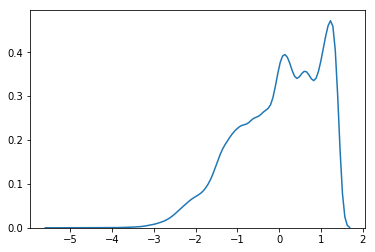

In [8]:
sns.kdeplot(data_train[:, 5])

0


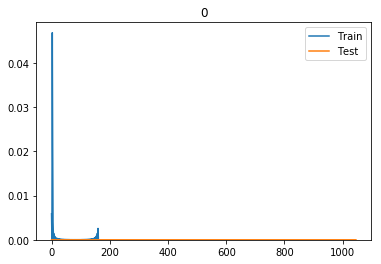

1


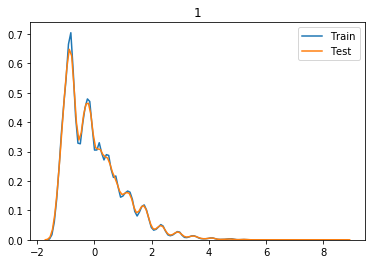

2


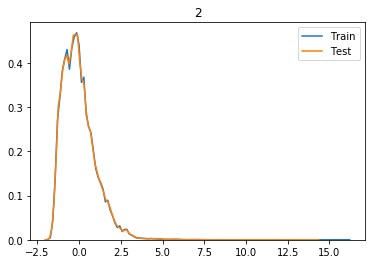

3


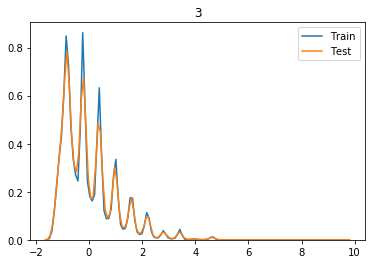

4


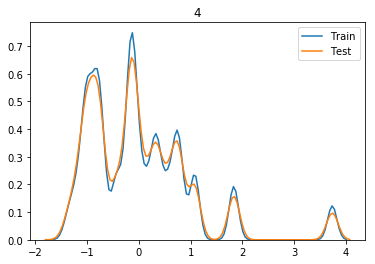

5


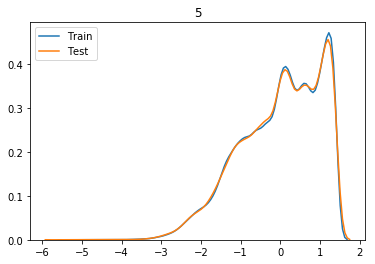

6


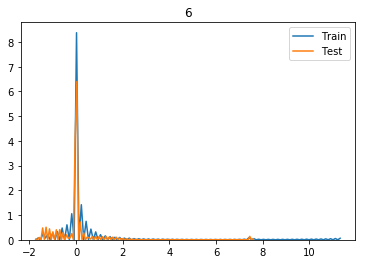

7


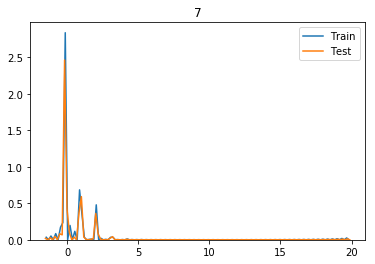

8


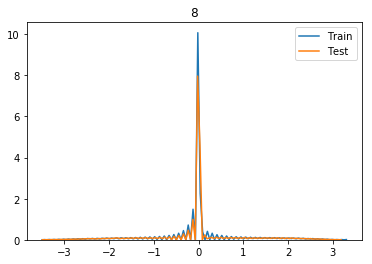

9


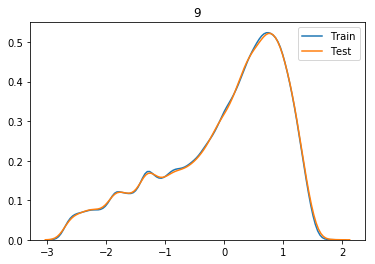

10


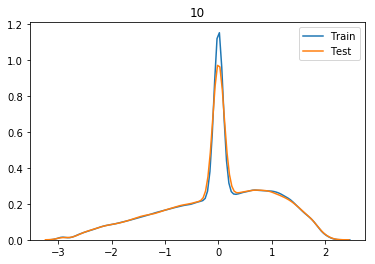

11


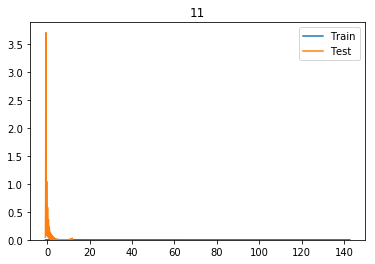

12


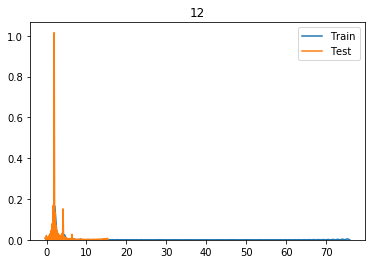

13


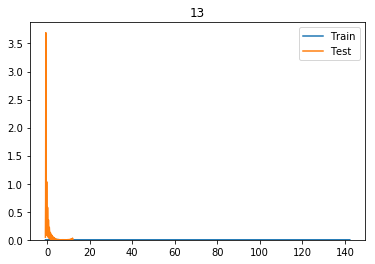

14


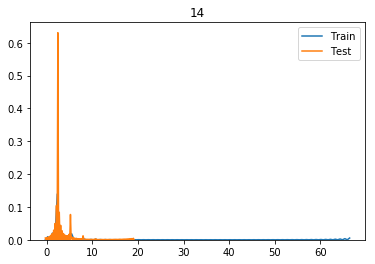

15


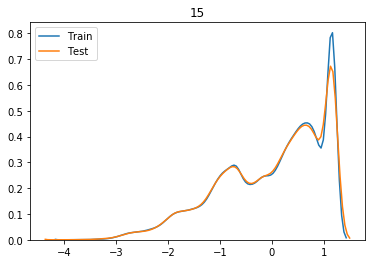

16


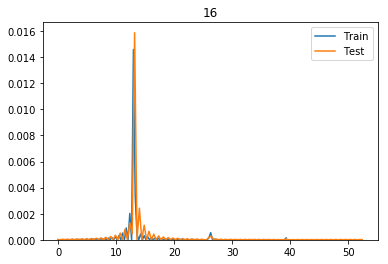

17


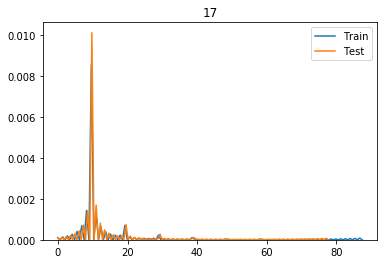

18


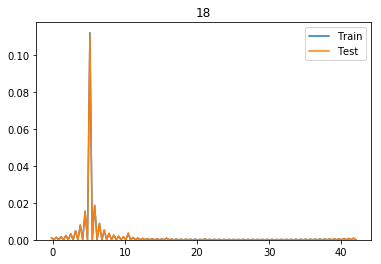

19


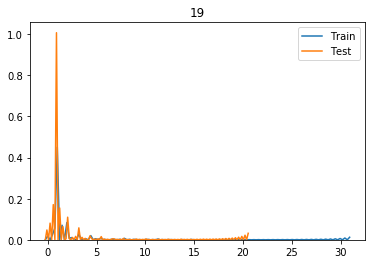

20


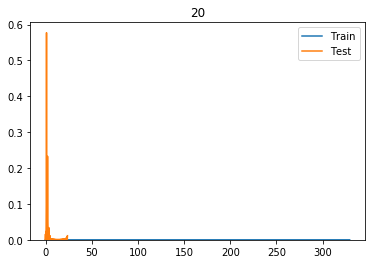

21


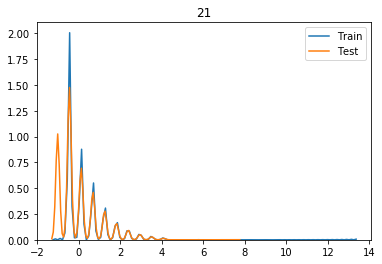

22


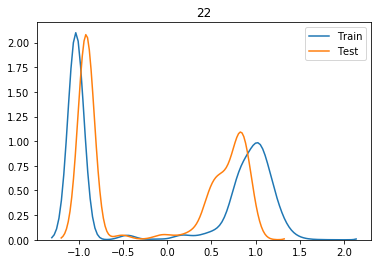

23


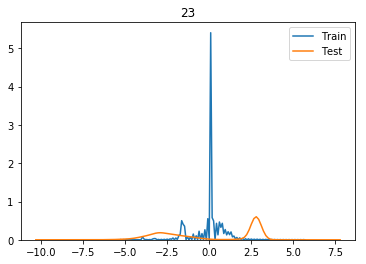

24


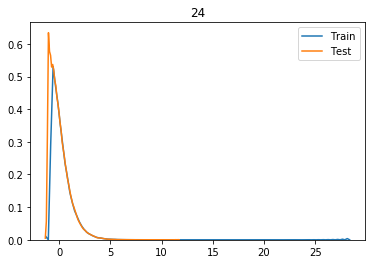

25


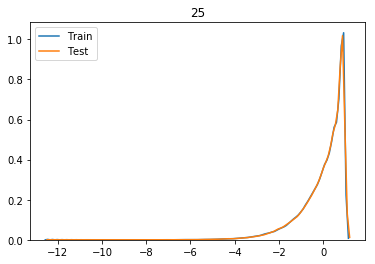

26


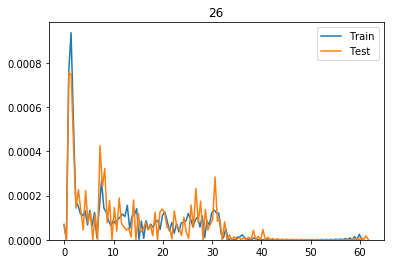

27


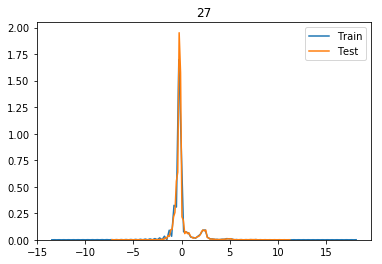

28


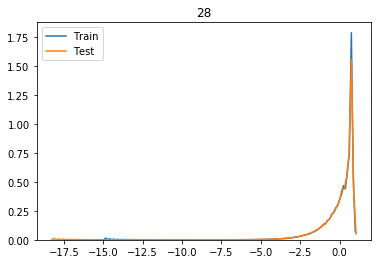

29


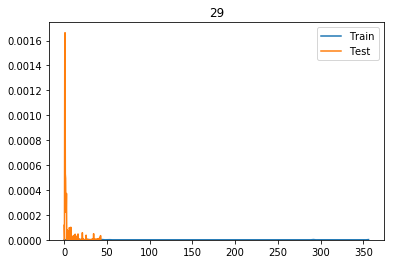

30


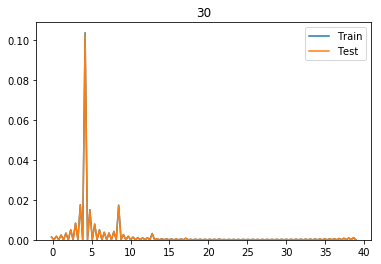

31


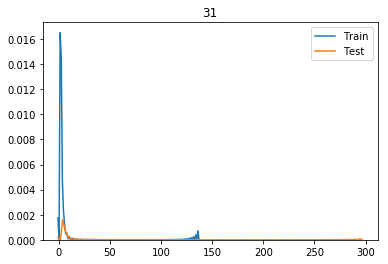

32


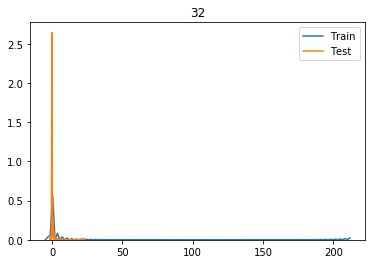

33


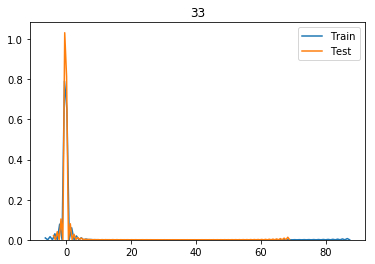

34


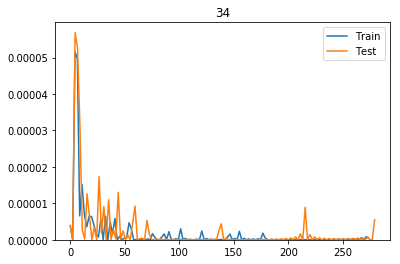

35


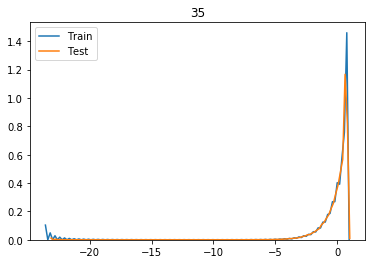

36


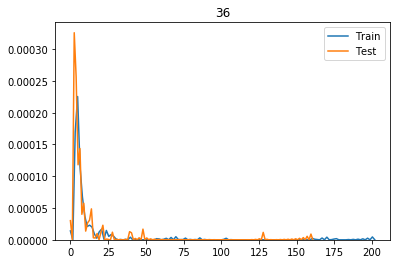

37


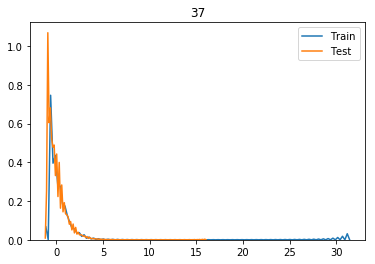

38


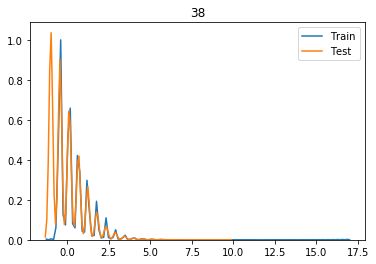

39


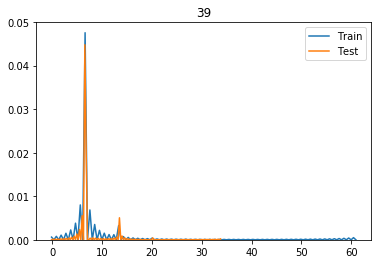

40


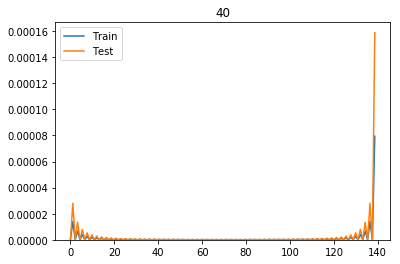

41


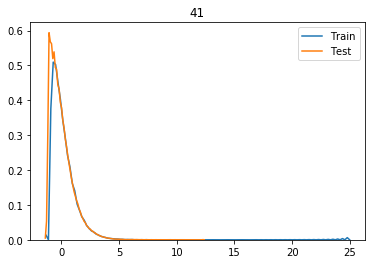

42


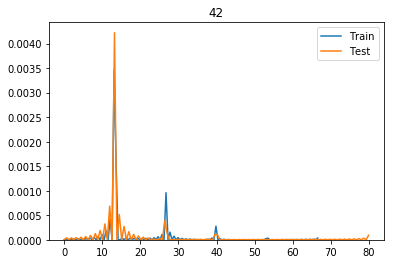

43


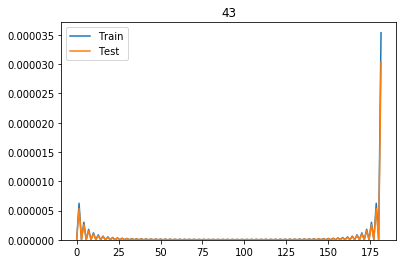

44


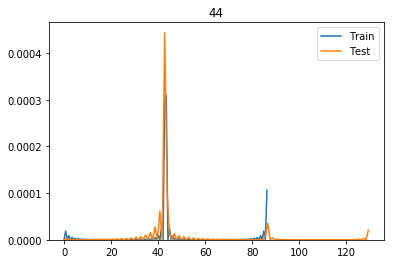

45


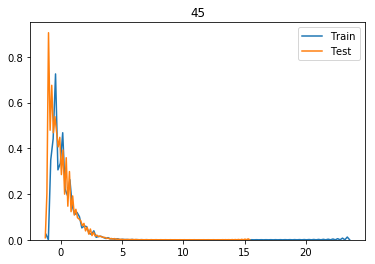

46


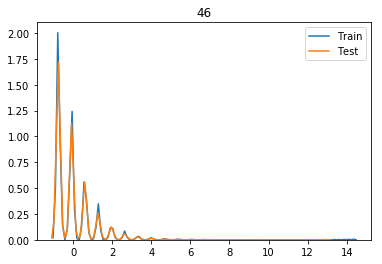

47


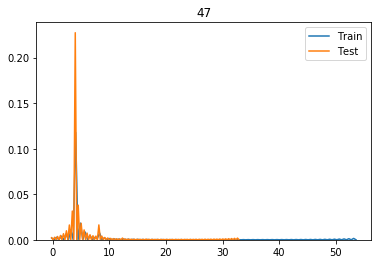

48


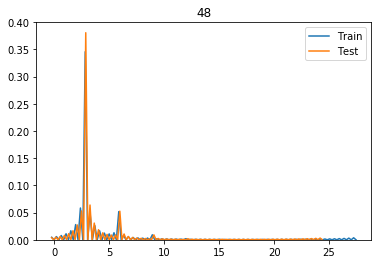

49


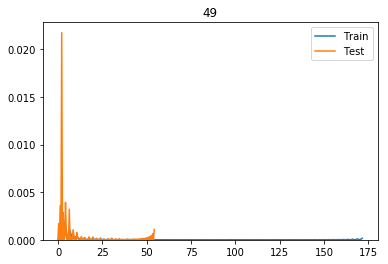

50


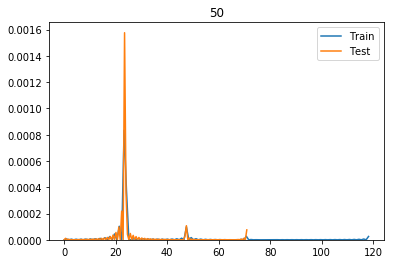

51


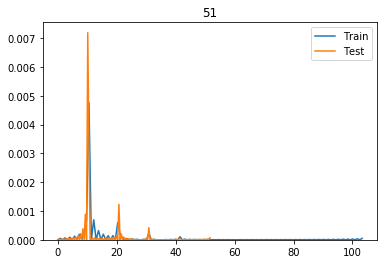

52


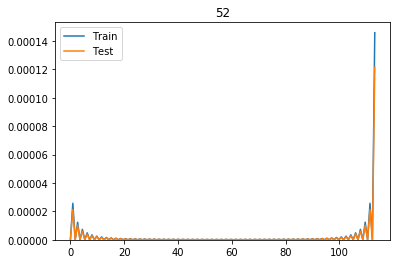

53


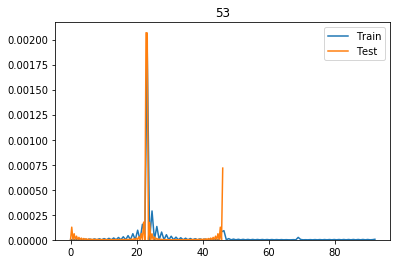

54


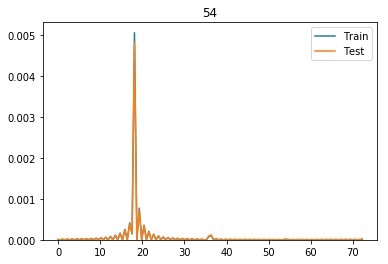

55


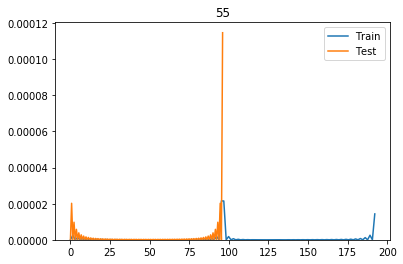

56


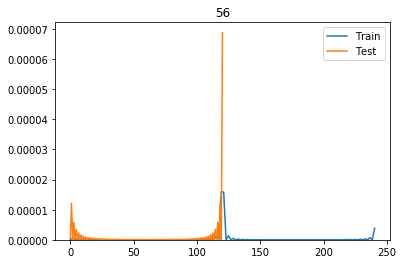

57


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


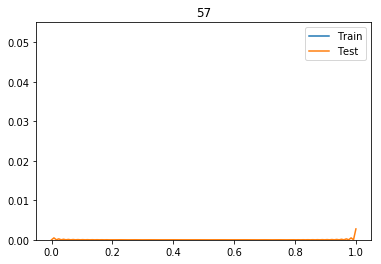

58


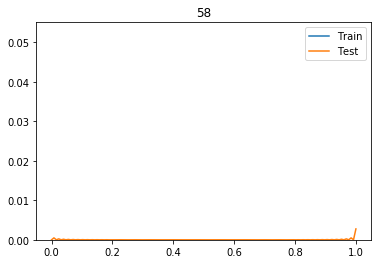

59


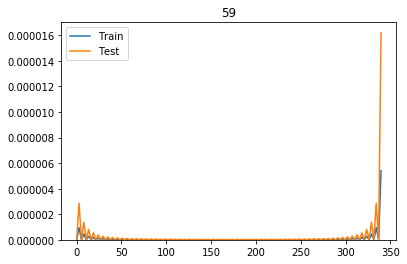

60


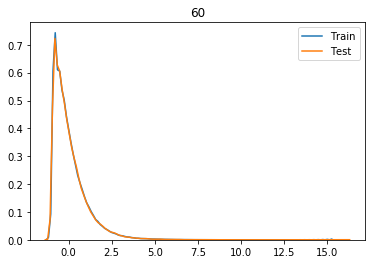

61


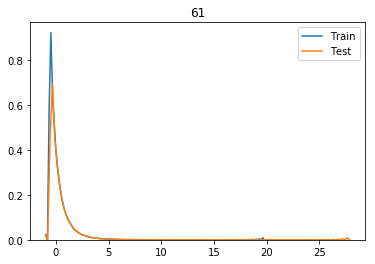

62


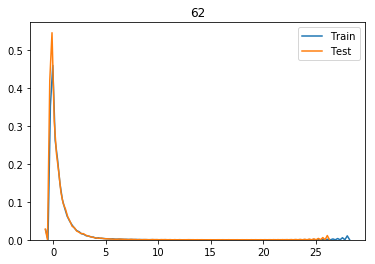

63


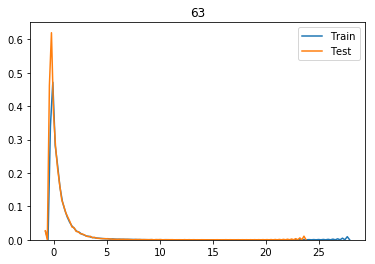

64


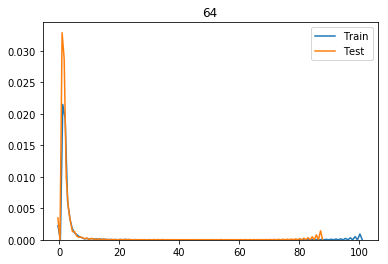

65


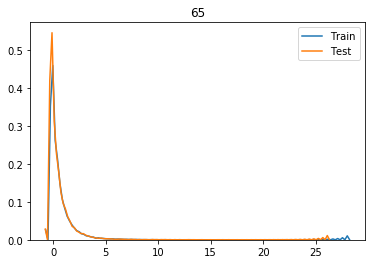

66


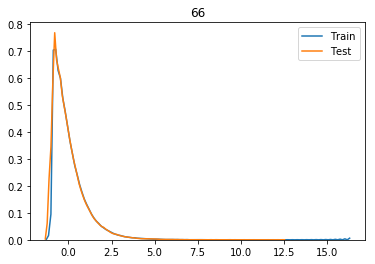

67


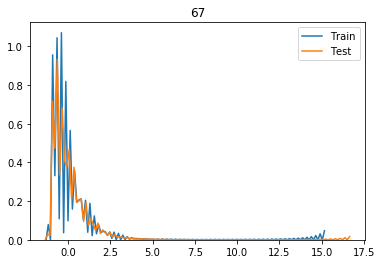

68


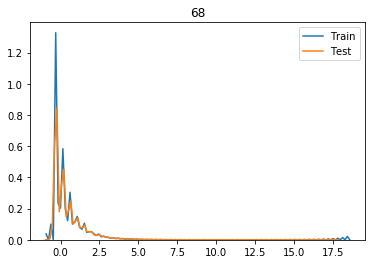

69


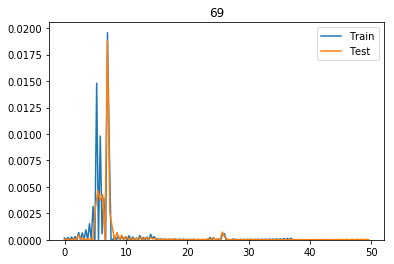

70


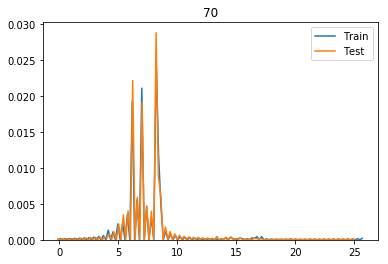

71


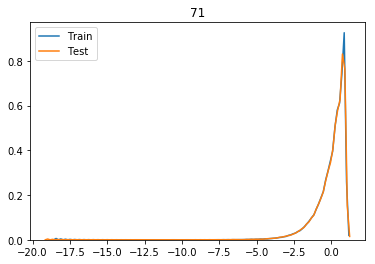

72


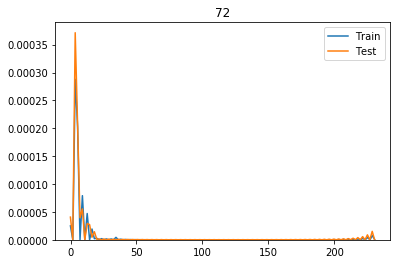

73


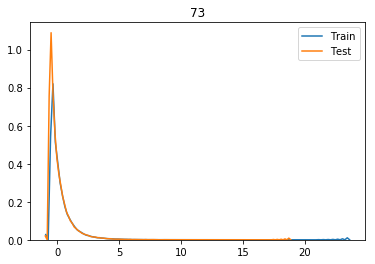

74


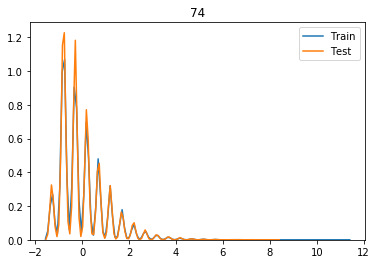

75


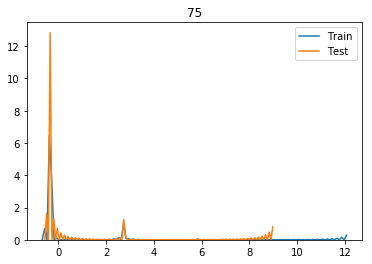

76


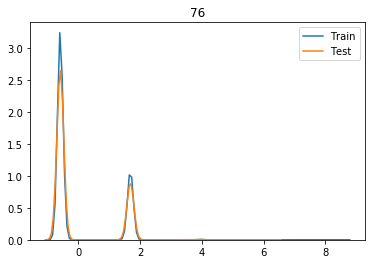

77


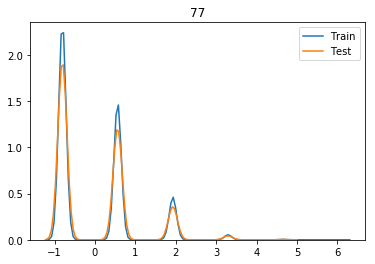

78


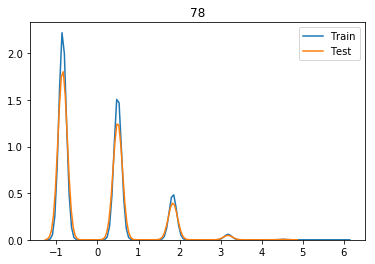

79


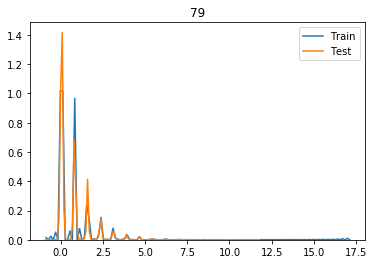

80


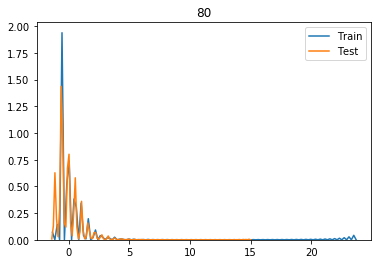

81


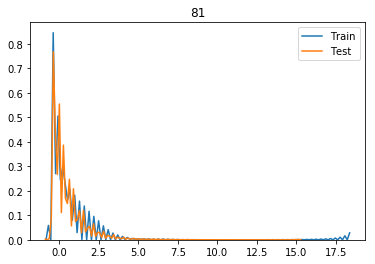

82


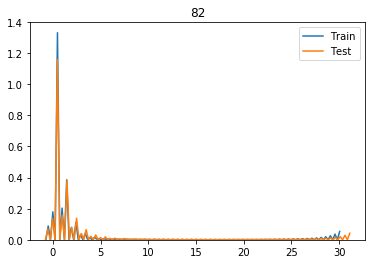

83


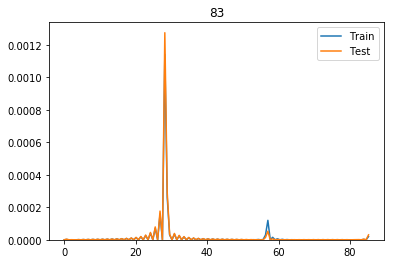

84


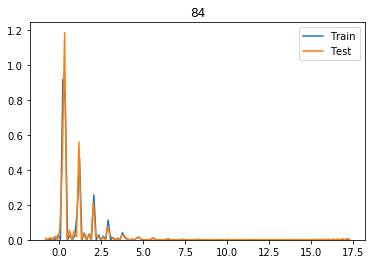

85


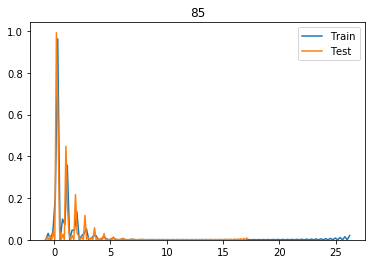

86


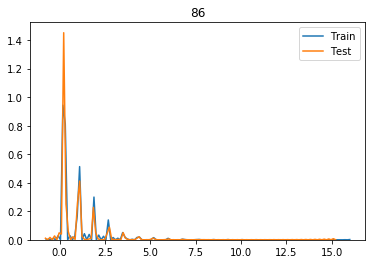

87


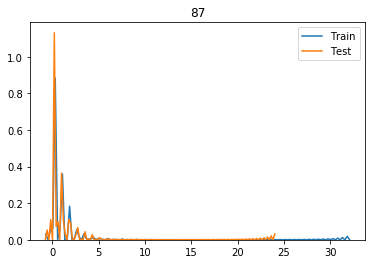

88


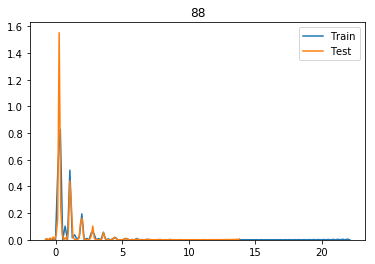

89


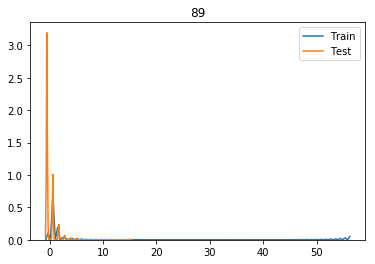

90


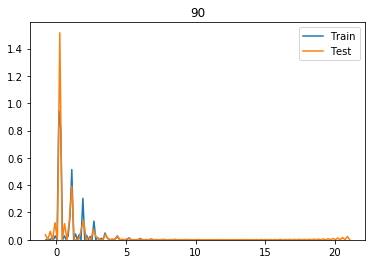

91


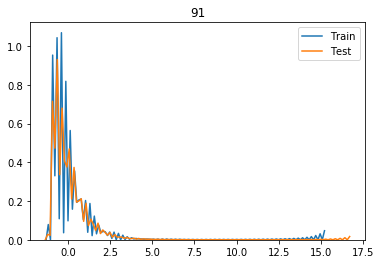

92


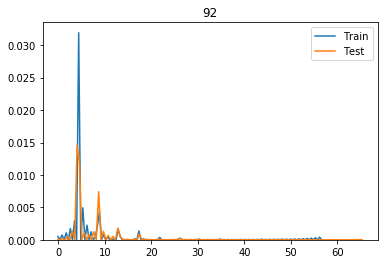

93


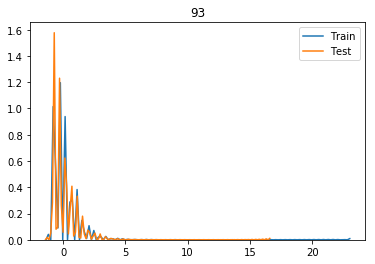

94


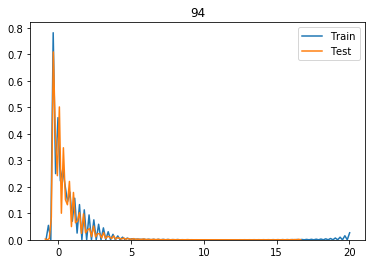

95


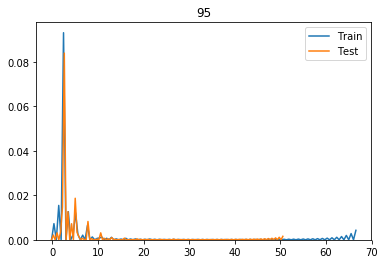

96


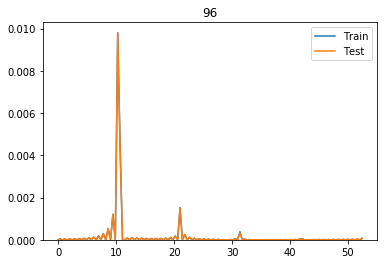

97


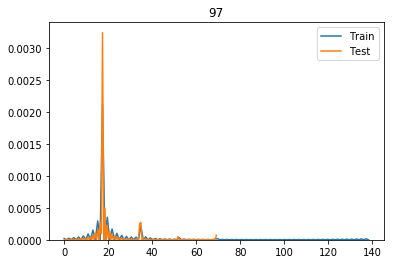

98


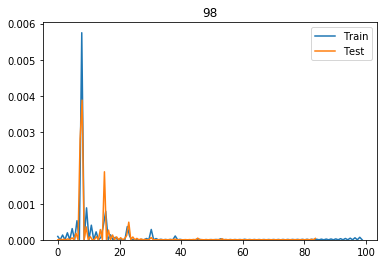

99


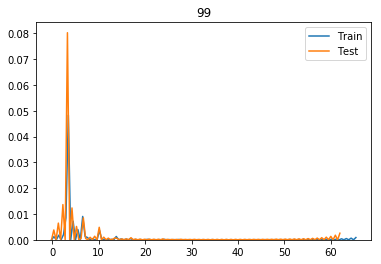

100


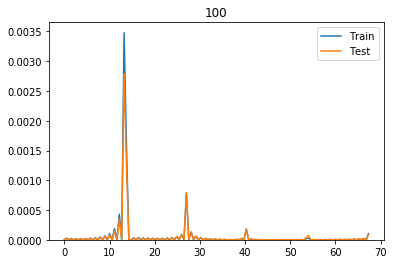

101


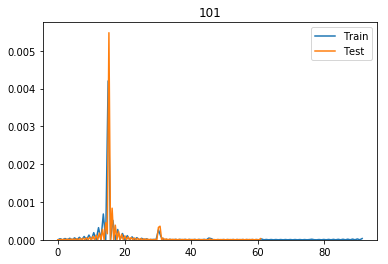

102


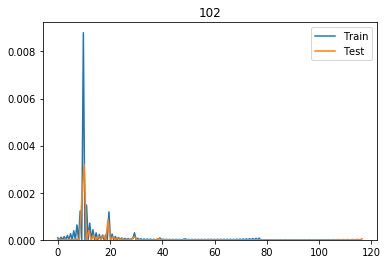

103


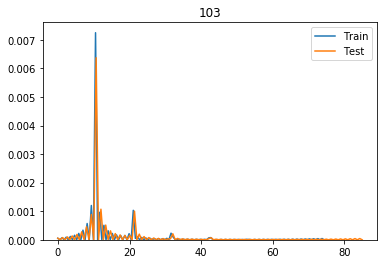

104


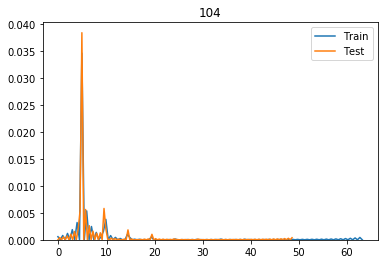

105


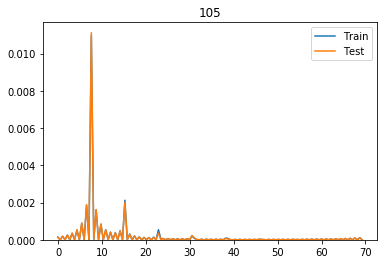

106


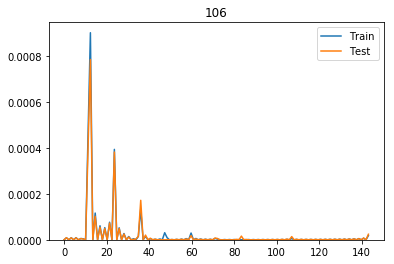

107


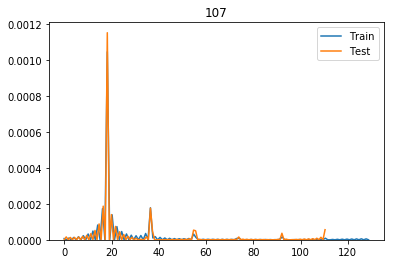

108


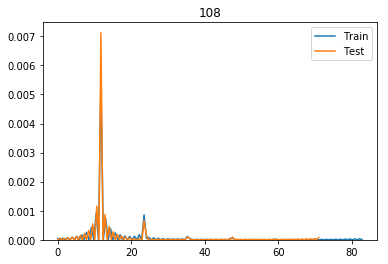

109


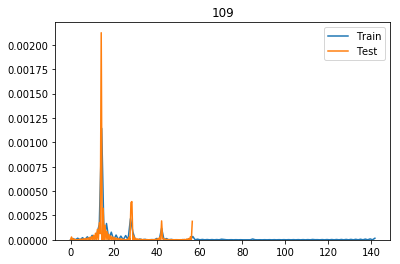

110


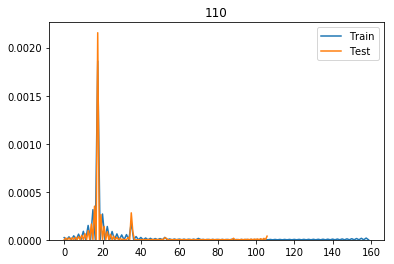

111


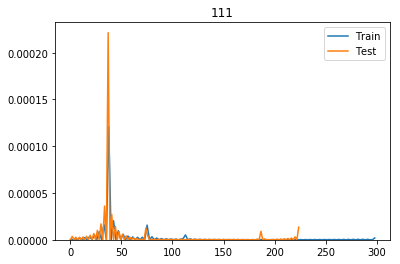

112


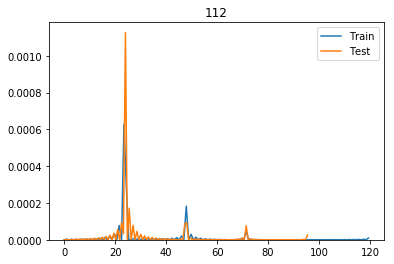

113


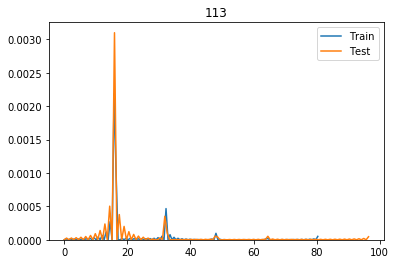

114


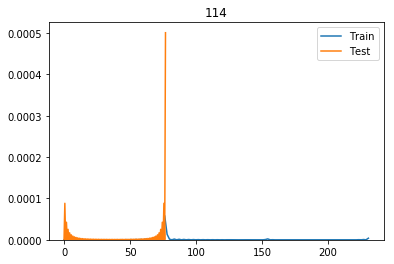

115


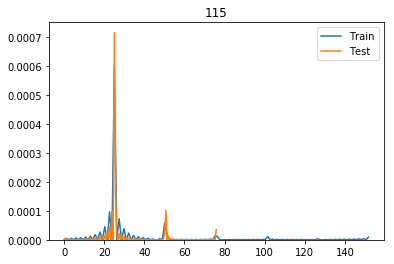

116


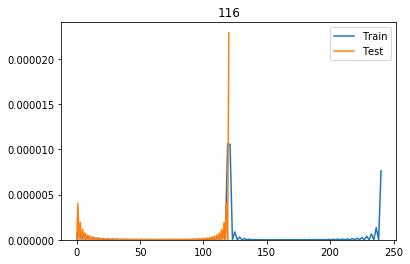

117


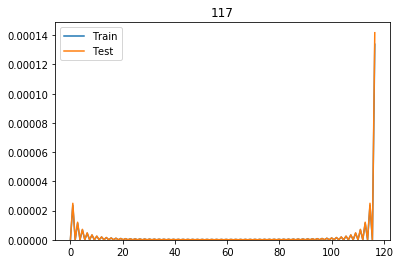

118


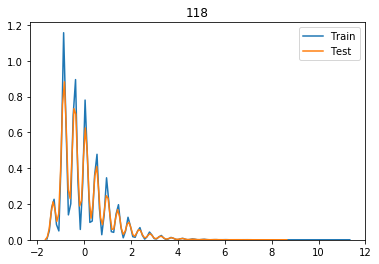

119


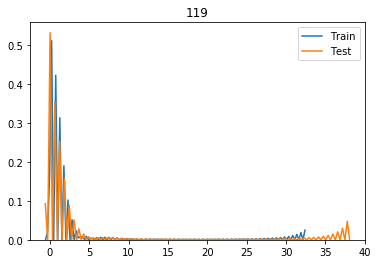

120


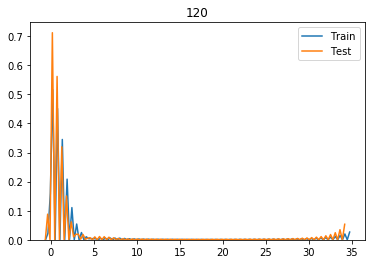

121


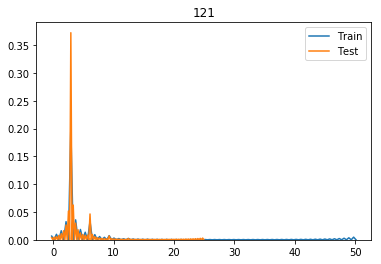

122


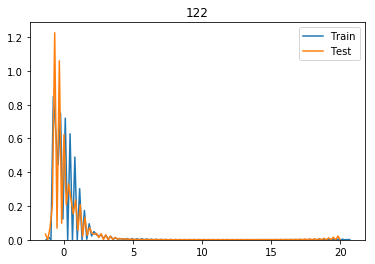

123


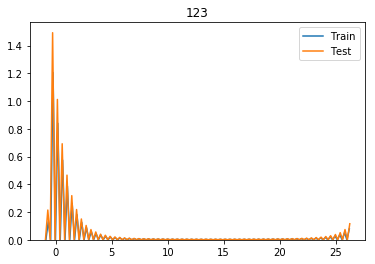

124


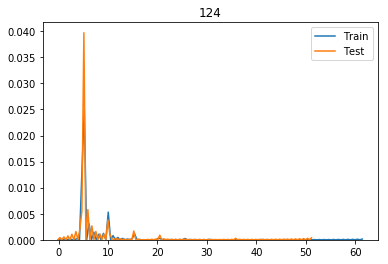

125


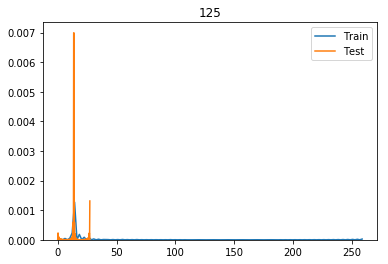

126


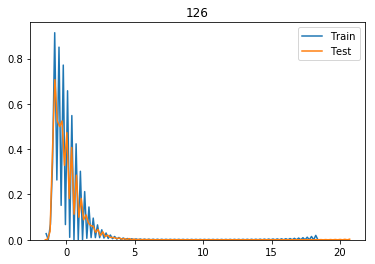

127


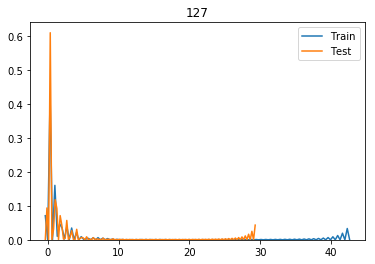

128


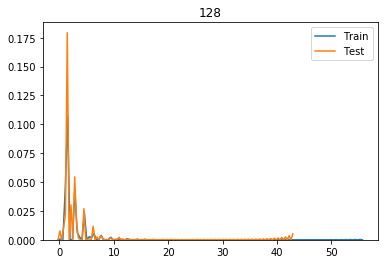

129


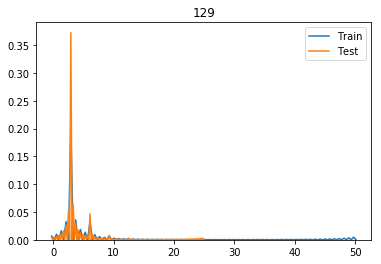

130


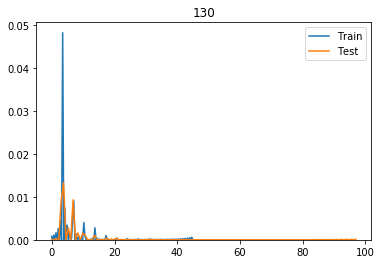

131


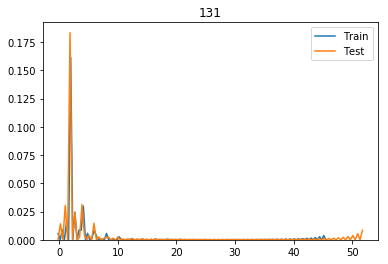

132


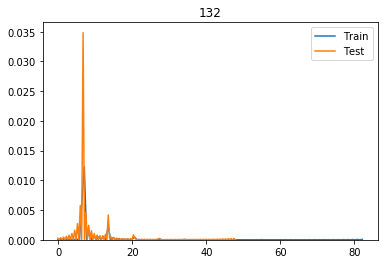

133


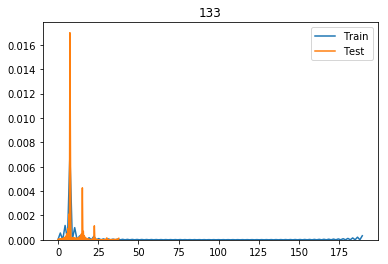

134


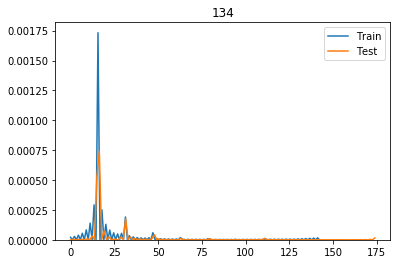

135


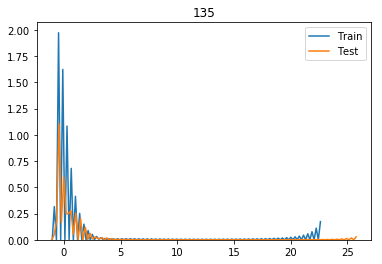

136


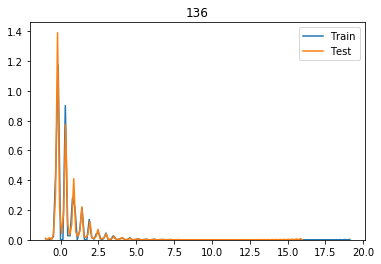

137


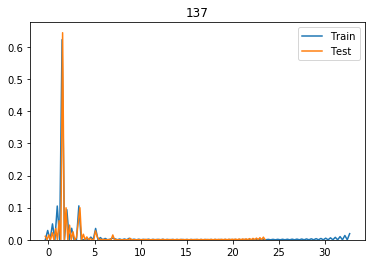

138


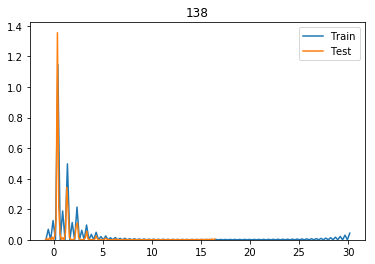

139


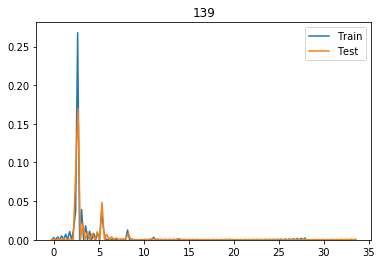

140


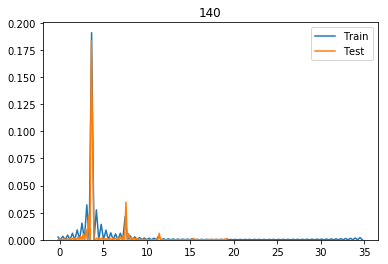

141


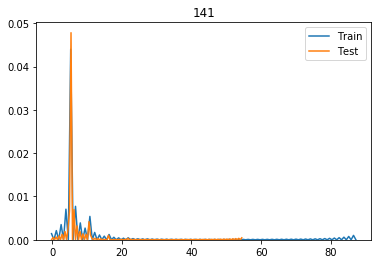

142


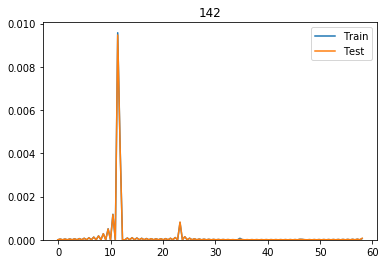

143


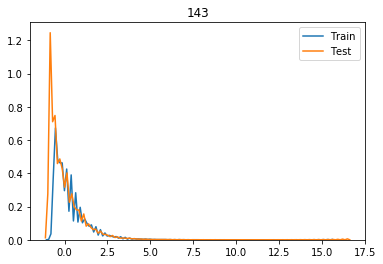

144


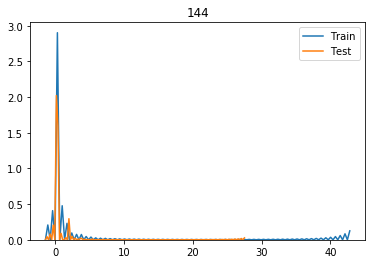

145


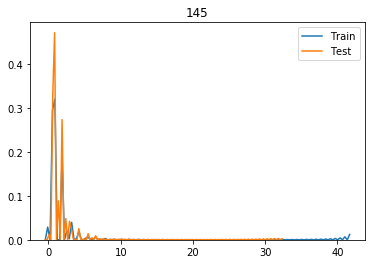

146


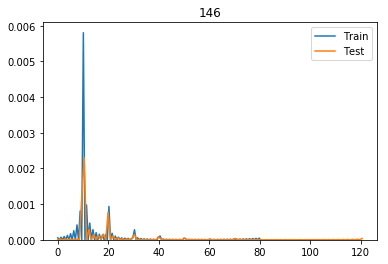

147


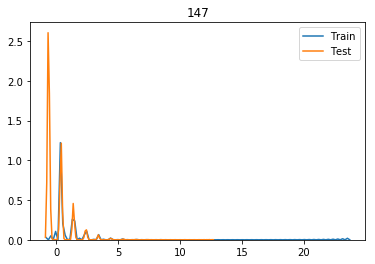

148


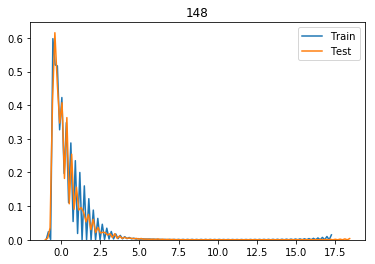

149


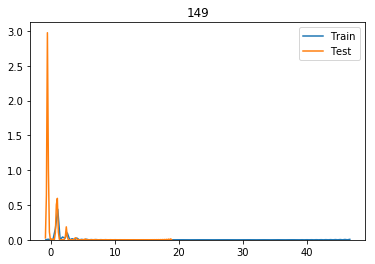

150


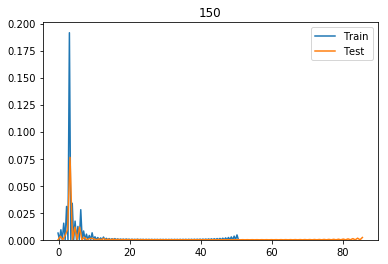

151


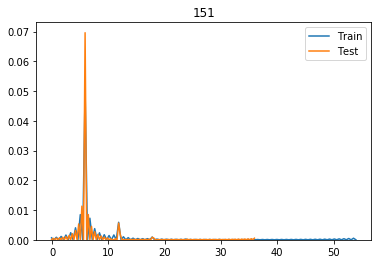

152


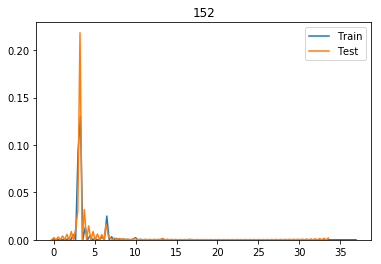

153


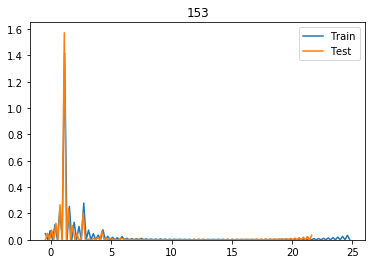

154


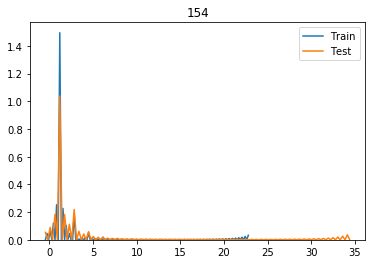

155


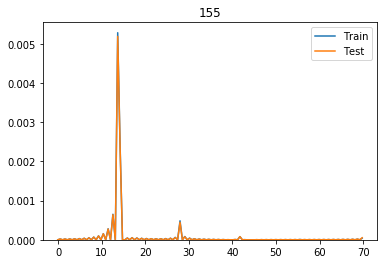

156


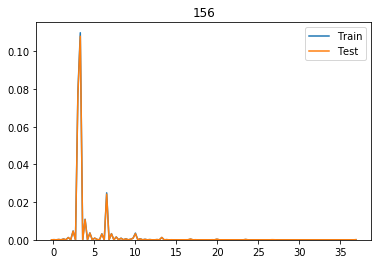

157


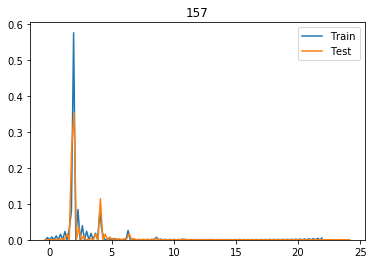

158


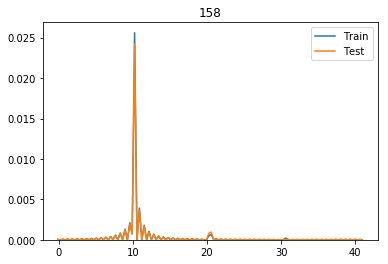

159


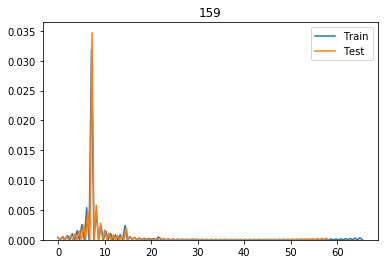

160


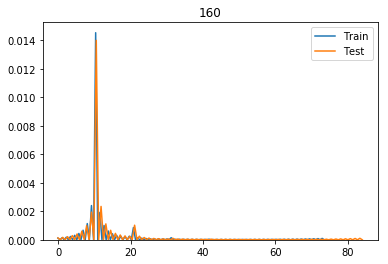

161


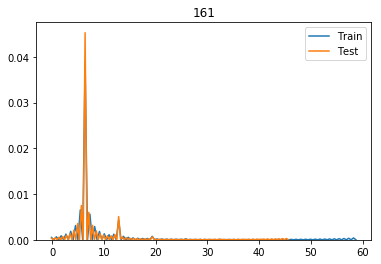

162


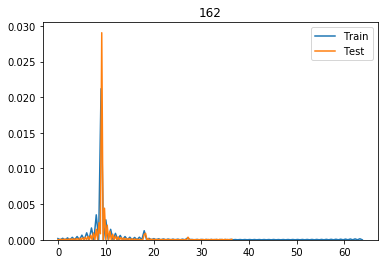

163


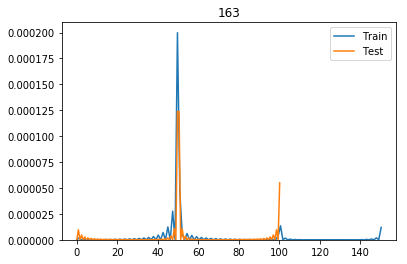

164


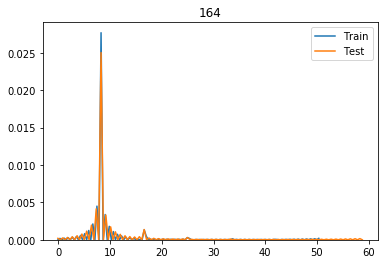

165


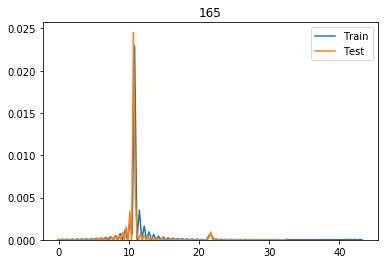

166


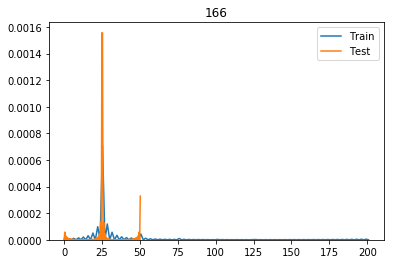

167


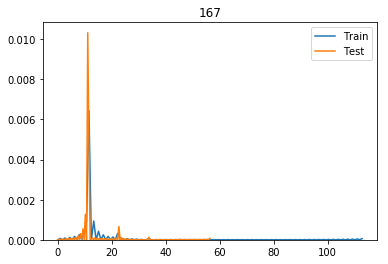

168


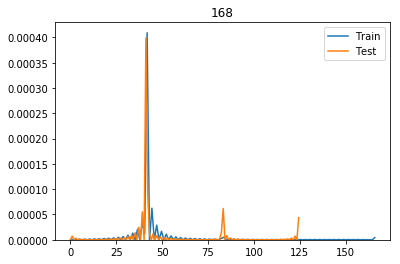

169


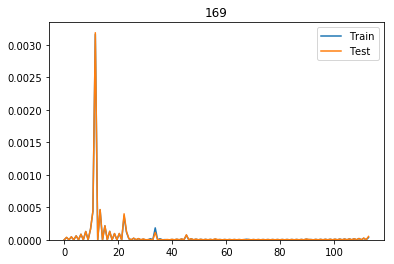

170


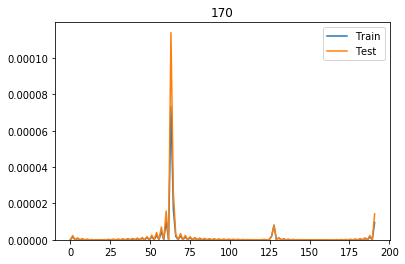

171


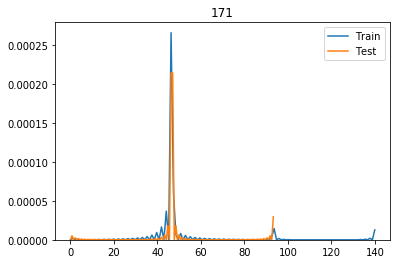

172


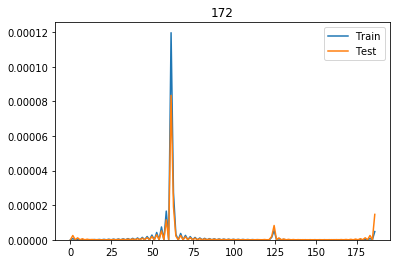

173


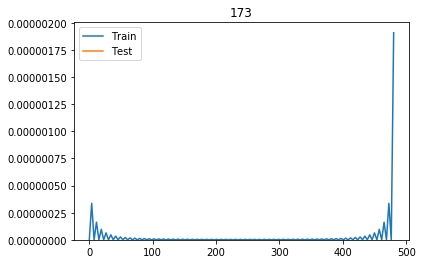

174


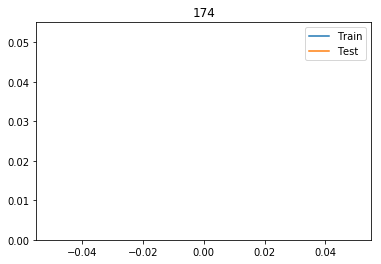

175


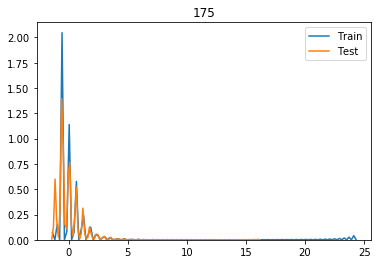

176


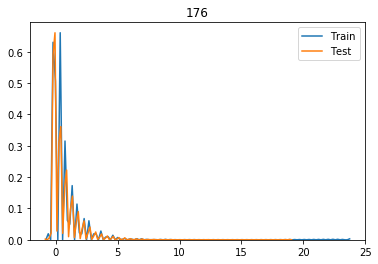

177


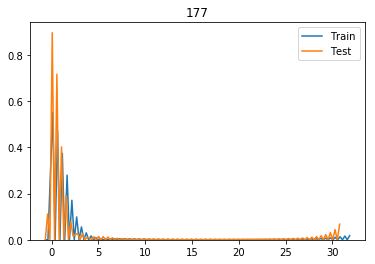

178


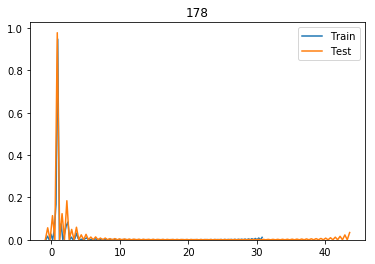

179


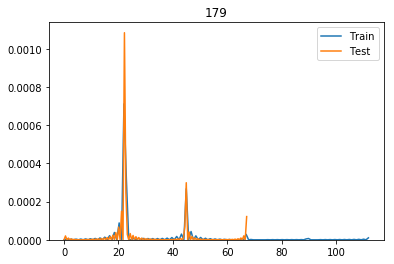

180


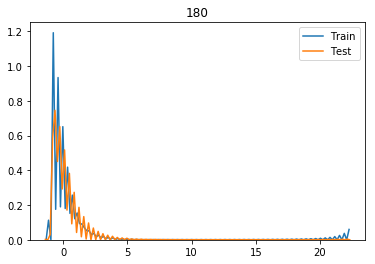

181


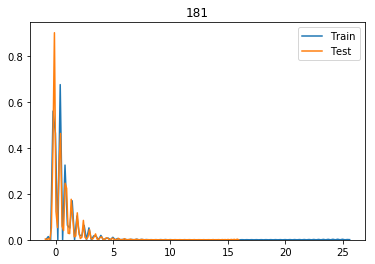

182


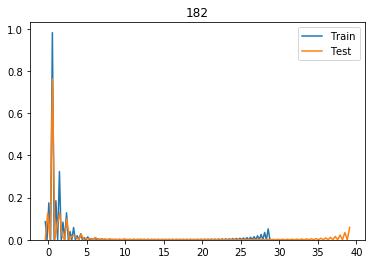

183


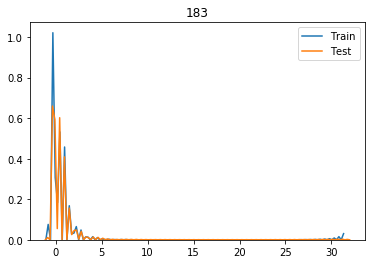

184


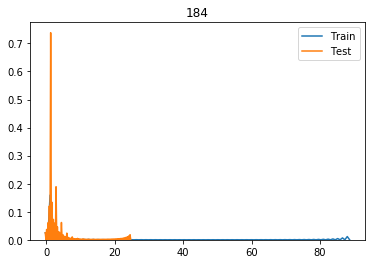

185


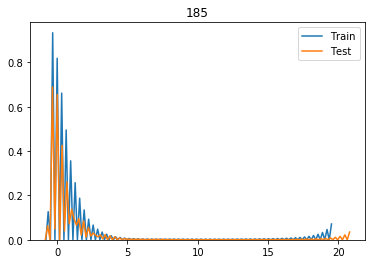

186


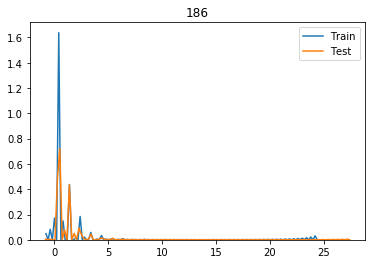

187


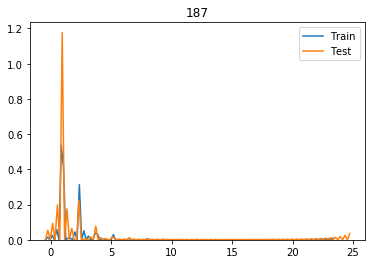

188


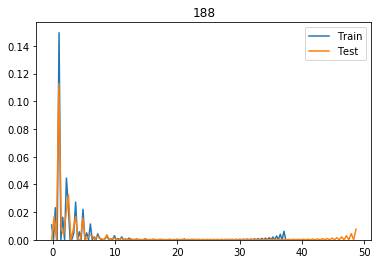

189


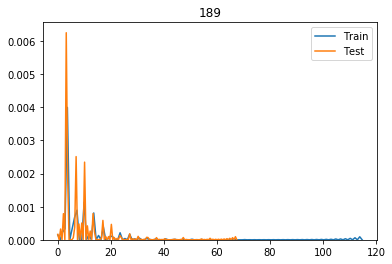

190


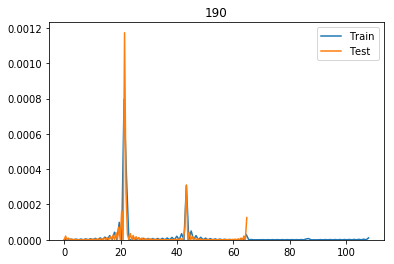

191


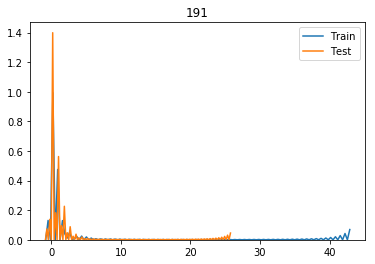

192


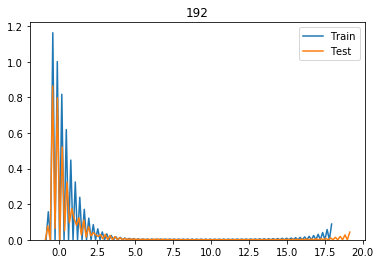

193


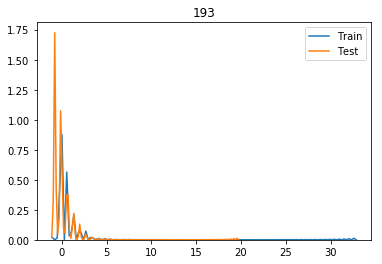

194


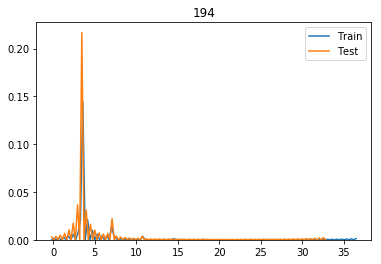

195


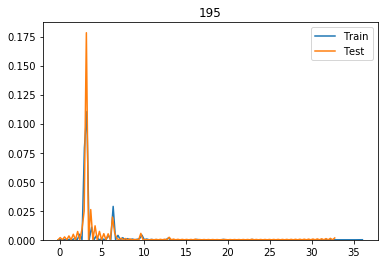

196


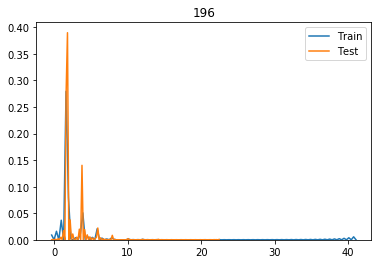

197


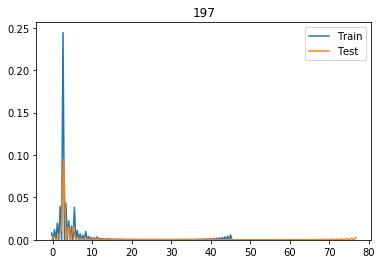

198


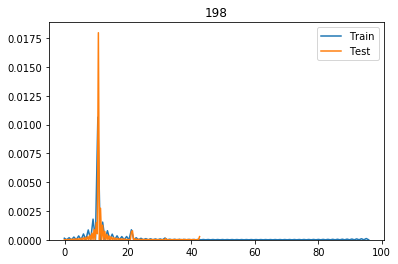

199


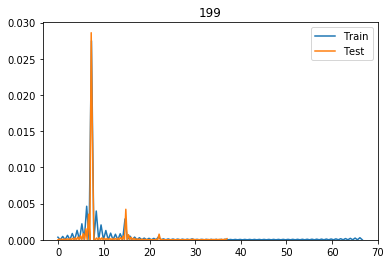

200


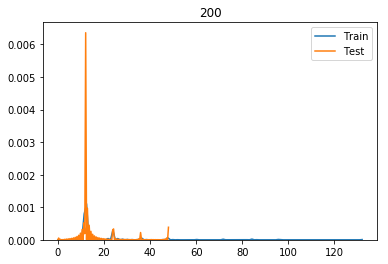

201


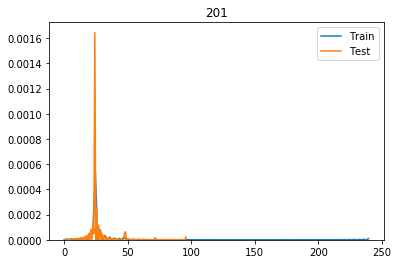

202


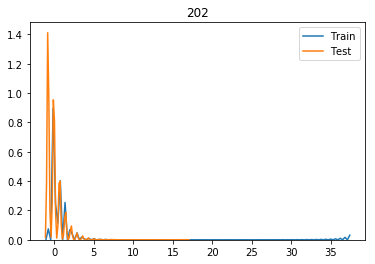

203


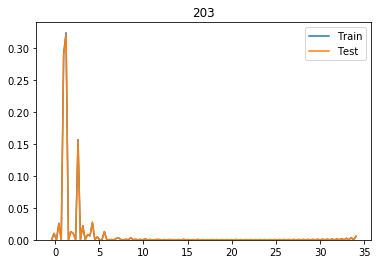

204


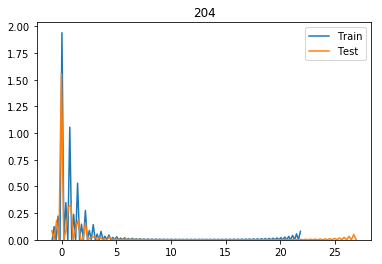

205


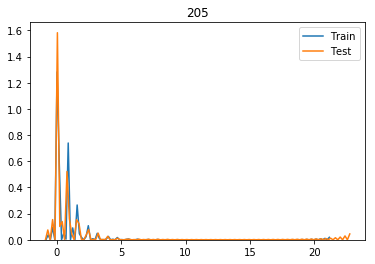

206


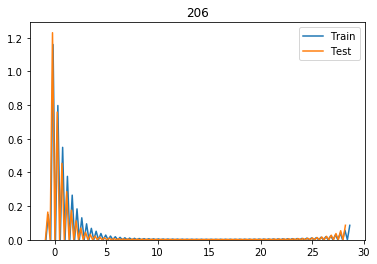

207


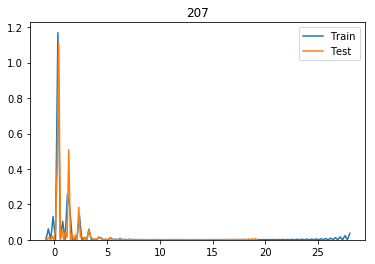

208


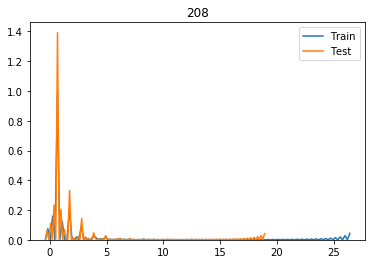

209


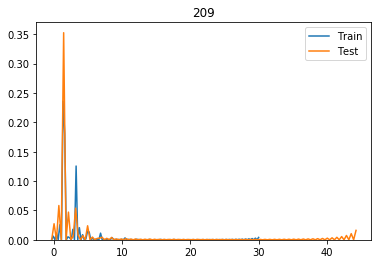

210


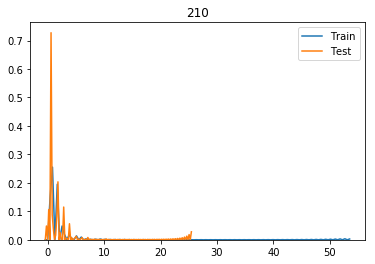

211


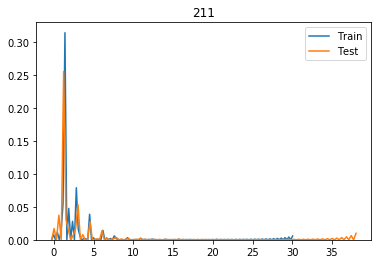

212


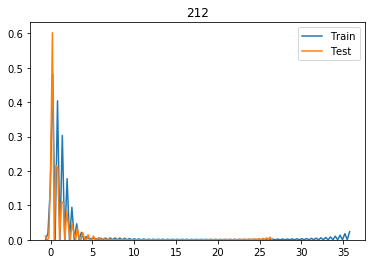

213


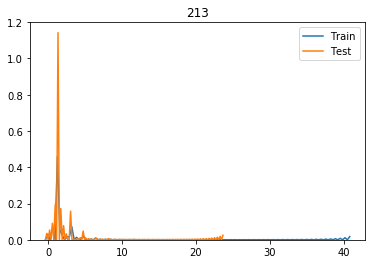

214


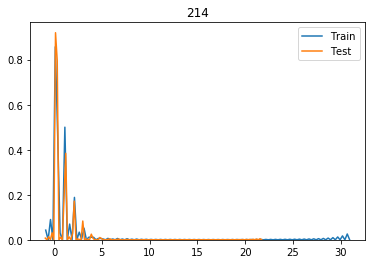

215


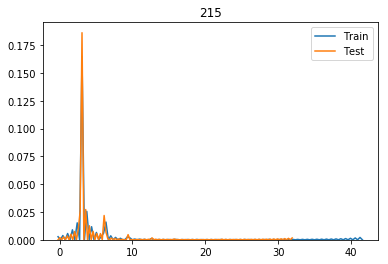

216


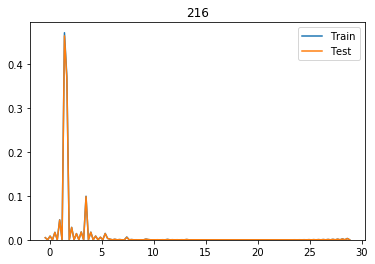

217


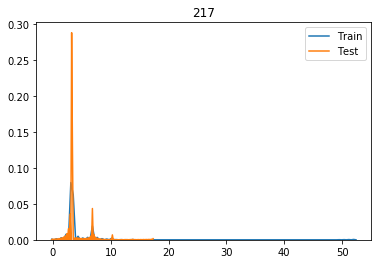

218


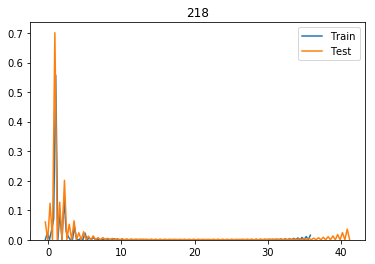

219


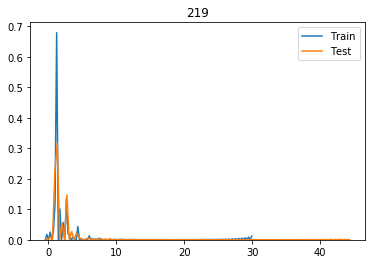

220


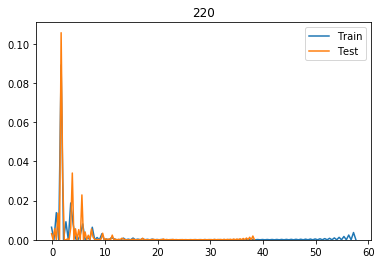

221


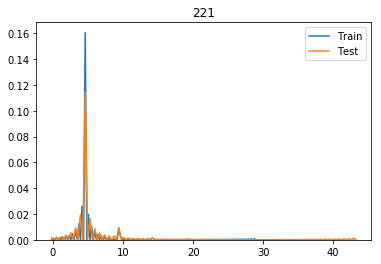

222


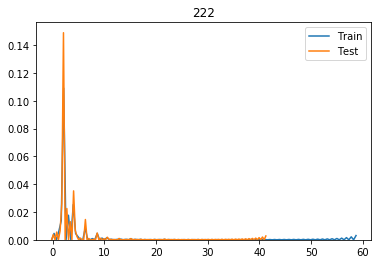

223


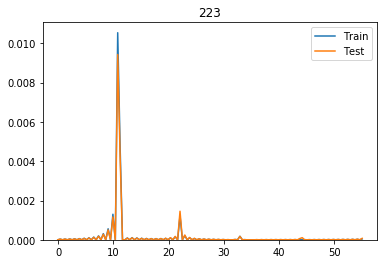

224


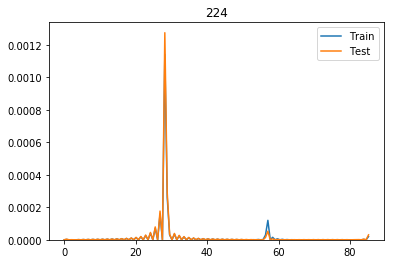

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

i = 5
for i in range(data_train.shape[1]): #range(40): #data_train.shape[1]):
    print(i)
    sns.kdeplot(data_train[:, i], label='Train')
    sns.kdeplot(data_val[:, i], label='Test')
    plt.title(i)
    plt.show()

In [11]:
data_train.mean(axis=0)

array([  1.50467439e-16,   2.66645307e-17,  -7.40013897e-17,
         9.88944467e-18,  -9.27173948e-17,  -3.05956620e-16,
        -2.70665782e-16,   2.54968985e-16,   2.55708382e-17,
         8.31083051e-16,  -7.04522806e-16,  -4.29774932e-17,
        -1.67288737e-17,   1.17841514e-16,   3.35809803e-17,
         1.64361954e-17,   1.67288737e-17,  -1.29394603e-17,
         1.44875743e-17,   4.96628810e-17,   4.57194264e-17,
         1.14144525e-17,   2.23359732e-19,  -7.27074437e-18,
        -2.58789206e-18,  -6.65457959e-17,  -1.18611720e-17,
        -7.27074437e-18,  -3.49981593e-17,   7.86572848e-18,
         3.33499185e-17,   6.94109621e-17,  -2.99147999e-17,
         3.15630407e-17,  -1.57892224e-18,   5.43457333e-17,
         1.23232955e-19,  -7.18756212e-17,  -5.81043385e-17,
        -7.34468414e-17,   8.93438926e-19,   8.06405652e-17,
         8.53388216e-18,   1.64438975e-18,  -6.77781255e-19,
        -9.98186939e-18,  -1.95324234e-17,   1.53425029e-17,
        -4.95704563e-17,